In [1]:
import time
then = time.time()
print(then)

In [2]:
# Total time taken to run this notebook is 25 min in system 16GB RAM, comment cells to run it faster

# Telecom Churn Case Study

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
pd.options.display.max_colwidth = 200
pd.options.display.max_rows = 250
pd.options.display.max_columns = 250

bin

### Data Inspection

In [4]:
# Reading csv file
data = pd.read_csv('telecom_churn_data.csv')
data.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,4,3,

In [5]:
#Checking tail
data.tail()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
99994,7001548952,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,18.471,69.161,57.530,29.950,5.40,3.36,5.91,0.00,15.19,54.46,52.79,27.14,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.00,5.40,3.36,5.91,0.00,12.78,54.46,49.58,24.78,0.00,0.00,0.00,2.25,0.00,0.0,3.21,0.11,18.18,57.83,55.49,27.03,0.00,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.00,0.0,0.0,0.0,2.41,3.01,3.21,0.11,0.00,0.0,0.0,0.0,20.59,60.84,58.71,27.14,27.68,20.78,40.94,22.06,47.96,46.93,76.08,82.89,17.45,5.16,43.79,49.46,93.09,72.88,160.83,154.43,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00

In [6]:
# Checking Shape
data.shape

(99999, 226)

**`This dataset has 99999 rows and 226 columns`**

### Info

In [7]:
# Checking Info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Columns: 226 entries, mobile_number to sep_vbc_3g
dtypes: float64(179), int64(35), object(12)
memory usage: 172.4+ MB


 **`It can be seen there are 179 float columns, 35 int columns and 12 categorical columns`** 

### Statistical Description

In [8]:
# Statistical Description
data.describe().T

,count,mean,std,min,25%,50%,75%,max
mobile_number,99999.0,7.001207e+09,695669.386290,7.000000e+09,7.000606e+09,7.001205e+09,7.001812e+09,7.002411e+09
circle_id,99999.0,1.090000e+02,0.000000,1.090000e+02,1.090000e+02,1.090000e+02,1.090000e+02,1.090000e+02
loc_og_t2o_mou,98981.0,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
std_og_t2o_mou,98981.0,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
loc_ic_t2o_mou,98981.0,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
arpu_6,99999.0,2.829874e+02,328.439770,-2.258709e+03,9.341150e+01,1.977040e+02,3.710600e+02,2.773109e+04
arpu_7,99999.0,2.785366e+02,338.156291,-2.014045e+03,8.698050e+01,1.916400e+02,3.653445e+02,3.514583e+04
arpu_8,99999.0,2.791547e+02,344.474791,-9.458080e+02,8.412600e+01,1.920800e+02,3.693705e+02,3.354362e+04
arpu_9,99999.0,2.616451e+02,341.998630,-1.899505e+03,6.268500e+01,1.768490e+02,3.534665e+02,3.880562e+04
onnet_mou_6,96062.0,1.323959e+02,297.207406,0.000000e+00,7.380000e+00,3.431000e+01,1.187400e+02,7.376710e+03


**`Columns beginning with these name roam_ic_mou, roam_og_mou, loc_og_t2c_mou, std_og_t2f_mou, std_og_t2c_mou, isd_og_mou, 
og_others, std_ic_t2f_mou, std_ic_t2o_mou, spl_ic_mou, isd_ic_mou, isd_ic_mou, ic_others, vol_2g_mb, vol_3g_mb  have to
be further analysed for OUTLIERS `** 

### N Unique

In [9]:
# Checking number of unique values in each column
data.nunique()

mobile_number               99999
circle_id                       1
loc_og_t2o_mou                  1
std_og_t2o_mou                  1
loc_ic_t2o_mou                  1
last_date_of_month_6            1
last_date_of_month_7            1
last_date_of_month_8            1
last_date_of_month_9            1
arpu_6                      85681
arpu_7                      85308
arpu_8                      83615
arpu_9                      79937
onnet_mou_6                 24313
onnet_mou_7                 24336
onnet_mou_8                 24089
onnet_mou_9                 23565
offnet_mou_6                31140
offnet_mou_7                31023
offnet_mou_8                30908
offnet_mou_9                30077
roam_ic_mou_6                6512
roam_ic_mou_7                5230
roam_ic_mou_8                5315
roam_ic_mou_9                4827
roam_og_mou_6                8038
roam_og_mou_7                6639
roam_og_mou_8                6504
roam_og_mou_9                5882
loc_og_t2t_mou

In [10]:
# Column having only one unique value are not useful for analysis and can be dropped
# Selecting those columns and inspecting
unique_column = [name for name in list(data.columns) if data[name].nunique() == 1]
print(unique_column)

['circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou', 'last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8', 'last_date_of_month_9', 'std_og_t2c_mou_6', 'std_og_t2c_mou_7', 'std_og_t2c_mou_8', 'std_og_t2c_mou_9', 'std_ic_t2o_mou_6', 'std_ic_t2o_mou_7', 'std_ic_t2o_mou_8', 'std_ic_t2o_mou_9']


In [11]:
# checking Head of unique columns
data[unique_column].head()

,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9
0,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN
1,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [12]:
# Dropping Unique value columns
data.drop( unique_column, axis = 1, inplace = True)
data.shape

(99999, 210)

**`After dropping unique value columns the remaining columns are 210`**

### Selecting columns having  <= 16 unique values

In [13]:
cat_cols = [name for name in list(data.columns) if data[name].nunique() <= 16]
print(cat_cols)

['night_pck_user_6', 'night_pck_user_7', 'night_pck_user_8', 'night_pck_user_9', 'monthly_2g_6', 'monthly_2g_7', 'monthly_2g_8', 'monthly_2g_9', 'monthly_3g_6', 'monthly_3g_7', 'monthly_3g_8', 'monthly_3g_9', 'fb_user_6', 'fb_user_7', 'fb_user_8', 'fb_user_9']


In [14]:
# Checking value counts of these columns
for i in cat_cols:
    print(data[i].value_counts())

0.0    24522
1.0      631
Name: night_pck_user_6, dtype: int64
0.0    24982
1.0      589
Name: night_pck_user_7, dtype: int64
0.0    25790
1.0      549
Name: night_pck_user_8, dtype: int64
0.0    25508
1.0      414
Name: night_pck_user_9, dtype: int64
0    92674
1     6728
2      562
3       28
4        7
Name: monthly_2g_6, dtype: int64
0    92435
1     6855
2      669
3       33
4        5
5        2
Name: monthly_2g_7, dtype: int64
0    92591
1     6775
2      586
3       37
4        8
5        2
Name: monthly_2g_8, dtype: int64
0    93735
1     5695
2      530
3       33
4        6
Name: monthly_2g_9, dtype: int64
0     94290
1      4472
2       861
3       237
4        76
5        34
6        12
7         9
8         3
11        2
9         2
14        1
Name: monthly_3g_6, dtype: int64
0     94326
1      4263
2      1016
3       227
4        74
5        42
6        26
7        10
8         5
9         4
11        2
16        1
14        1
12        1
10        1
Name: monthly_3g_

In [15]:
# Checking null values of these columns    
data[cat_cols].isnull().mean()*100

night_pck_user_6    74.846748
night_pck_user_7    74.428744
night_pck_user_8    73.660737
night_pck_user_9    74.077741
monthly_2g_6         0.000000
monthly_2g_7         0.000000
monthly_2g_8         0.000000
monthly_2g_9         0.000000
monthly_3g_6         0.000000
monthly_3g_7         0.000000
monthly_3g_8         0.000000
monthly_3g_9         0.000000
fb_user_6           74.846748
fb_user_7           74.428744
fb_user_8           73.660737
fb_user_9           74.077741
dtype: float64

 **`night pack and fb user have high missing values, null values have to be handled`**

**`fb_user, night_pack_user, Monthly 2g,  3g columns can be used for analysis, it has to be converted to categorical and dropped zeros after dummy`**

In [16]:
# Checking categorical columns in data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Columns: 210 entries, mobile_number to sep_vbc_3g
dtypes: float64(168), int64(34), object(8)
memory usage: 160.2+ MB


**`Total 8 columns are categorical`**

### Converting 'fb_user', 'night_pack_user', 'monthly_2g, monthly_3g' to categorical

In [17]:
# Handling null in night pack and fb user, replacing null with -1
data[['fb_user_6', 'fb_user_7', 'fb_user_8', 'fb_user_9', 'night_pck_user_6','night_pck_user_6', 'night_pck_user_7', 
           'night_pck_user_8', 'night_pck_user_9' ]] = data[['fb_user_6', 'fb_user_7', 'fb_user_8', 'fb_user_9', 'night_pck_user_6','night_pck_user_6', 'night_pck_user_7', 
           'night_pck_user_8', 'night_pck_user_9' ]].fillna(-1, axis = 1)
data[cat_cols].isnull().mean()*100

night_pck_user_6    0.0
night_pck_user_7    0.0
night_pck_user_8    0.0
night_pck_user_9    0.0
monthly_2g_6        0.0
monthly_2g_7        0.0
monthly_2g_8        0.0
monthly_2g_9        0.0
monthly_3g_6        0.0
monthly_3g_7        0.0
monthly_3g_8        0.0
monthly_3g_9        0.0
fb_user_6           0.0
fb_user_7           0.0
fb_user_8           0.0
fb_user_9           0.0
dtype: float64

**`Null values of night pack and fb user are handled`**

In [18]:
# Binning values greater than 3 to a common value

data['monthly_2g_6'].replace({3 : 3_5, 4 : 3_5, 5: 3_5}, inplace = True)
data['monthly_2g_7'].replace({3 : 3_5, 4 : 3_5, 5: 3_5}, inplace = True)
data['monthly_2g_8'].replace({3 : 3_5, 4 : 3_5, 5: 3_5}, inplace = True)
data['monthly_2g_9'].replace({3 : 3_5, 4 : 3_5, 5: 3_5}, inplace = True)
data['monthly_3g_6'].replace({3 : 4_20, 4 : 4_20, 5: 4_20, 6 : 4_20, 7 : 4_20, 8: 4_20, 9 : 4_20, 10 : 4_20,
                                              11: 4_20, 12 : 4_20, 13 : 4_20, 14: 4_20, 14: 4_20, 15 : 4_20, 
                                              16 : 4_20, 17: 4_20, 18 : 4_20, 19 : 4_20, 20: 4_20,}, inplace = True)
data['monthly_3g_7'].replace({3 : 4_20, 4 : 4_20, 5: 4_20, 6 : 4_20, 7 : 4_20, 8: 4_20, 9 : 4_20, 10 : 4_20,
                                              11: 4_20, 12 : 4_20, 13 : 4_20, 14: 4_20, 14: 4_20, 15 : 4_20, 
                                              16 : 4_20, 17: 4_20, 18 : 4_20, 19 : 4_20, 20: 4_20,}, inplace = True)
data['monthly_3g_8'].replace({3 : 4_20, 4 : 4_20, 5: 4_20, 6 : 4_20, 7 : 4_20, 8:4_20,  9 : 4_20, 10 : 4_20,
                                              11: 4_20, 12 : 4_20, 13 : 4_20, 14: 4_20, 14: 4_20, 15 : 4_20, 
                                              16 : 4_20, 17: 4_20, 18 : 4_20, 19 : 4_20, 20: 4_20,}, inplace = True)
data['monthly_3g_9'].replace({3 : 4_20, 4 : 4_20, 5: 4_20, 6 : 4_20, 7 : 4_20, 8:4_20,  9 : 4_20, 10 : 4_20,
                                              11: 4_20, 12 : 4_20, 13 : 4_20, 14: 4_20, 14: 4_20, 15 : 4_20, 
                                              16 : 4_20, 17: 4_20, 18 : 4_20, 19 : 4_20, 20: 4_20,}, inplace = True)
data['monthly_3g_8'].value_counts()

0      93933
1       4567
2       1082
420      417
Name: monthly_3g_8, dtype: int64

In [19]:
# Converting to categorical
data[cat_cols] = data[cat_cols].astype('object')
data.shape

(99999, 210)

In [20]:
# Checking categorical columns after conversion
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Columns: 210 entries, mobile_number to sep_vbc_3g
dtypes: float64(160), int64(26), object(24)
memory usage: 160.2+ MB


**`Now there are 24 categorical columns`**

## Churn Prediction 

**`Churn is predicted on the September month, it is Usage based Churn**` 
- total incoming calls minutes of usage = 'total_ic_mou_9'
- total outgoing calls minutes of usage ='total_og_mou_9', 
- Volume og 2G data in Mb = 'vol_2g_mb_9', 
- Volume og 3G data in Mb = 'vol_3g_mb_9'

**`These columns are considered for churn prediction`** 

In [21]:
#Checking column values
expected_churn_cols = data[['total_ic_mou_9', 'total_og_mou_9', 'vol_2g_mb_9', 'vol_3g_mb_9']]
expected_churn_cols.head()

,total_ic_mou_9,total_og_mou_9,vol_2g_mb_9,vol_3g_mb_9
0,0.00,0.00,0.0,0.00
1,188.04,72.11,0.0,0.00
2,517.74,124.94,0.0,8.42
3,305.38,362.54,0.0,0.00
4,205.31,104.59,0.0,0.00


In [22]:
# Checking null values
expected_churn_cols.isnull().sum()

total_ic_mou_9    0
total_og_mou_9    0
vol_2g_mb_9       0
vol_3g_mb_9       0
dtype: int64

In [23]:
# Checking numbers of customers having 0 usage of calls and data 
expected_churn_cols[((expected_churn_cols['total_ic_mou_9'] == 0.0) & (expected_churn_cols['total_og_mou_9'] == 0.0)) &\
                   ((expected_churn_cols['vol_2g_mb_9'] == 0.0) & (expected_churn_cols['vol_3g_mb_9'] == 0.0))].shape

(10191, 4)

### Creating Churn Column

In [24]:
#churned customers (churn = 1, no churn = 0) 
data['churn'] = np.where(data[['total_ic_mou_9','total_og_mou_9','vol_2g_mb_9','vol_3g_mb_9']].sum(axis = 1) == 0, 1, 0)
data.head()

,mobile_number,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,churn
0,7000842753,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,4,3,2,6,362,252,252,0,252,252,252,0,6/21/2014,7/16/2014,8/8/2014,9/28/2014,252,252,252,0,6/21/2014,7/16/2014,8/8/2014,NaN,1.0,1.0,1.0,NaN,252.0,252.0,252.0,NaN,0.0,0.0,0.0,NaN,1.0,1.0,1.0,NaN,252.0,252.0,252.0,NaN,30.13,1.32,5.75,0.0,83.57,150.76,109.61,0.00,212.17,212.17,212.17,NaN,212.17,212.17,212.17,NaN,0,0,0,-1,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,1,1,1,-1,96

In [25]:
# Checking Shape
data.shape

(99999, 211)

**`Total columns = 211`**

### Dropping all  'september' columns

**`Dropping all September month data as these are considered as future predictions`**

In [26]:
### selecting columns having '_9' 
sept_cols = [i for i in list(data.columns) if i.__contains__('_9') == True]
print(sept_cols)

['arpu_9', 'onnet_mou_9', 'offnet_mou_9', 'roam_ic_mou_9', 'roam_og_mou_9', 'loc_og_t2t_mou_9', 'loc_og_t2m_mou_9', 'loc_og_t2f_mou_9', 'loc_og_t2c_mou_9', 'loc_og_mou_9', 'std_og_t2t_mou_9', 'std_og_t2m_mou_9', 'std_og_t2f_mou_9', 'std_og_mou_9', 'isd_og_mou_9', 'spl_og_mou_9', 'og_others_9', 'total_og_mou_9', 'loc_ic_t2t_mou_9', 'loc_ic_t2m_mou_9', 'loc_ic_t2f_mou_9', 'loc_ic_mou_9', 'std_ic_t2t_mou_9', 'std_ic_t2m_mou_9', 'std_ic_t2f_mou_9', 'std_ic_mou_9', 'total_ic_mou_9', 'spl_ic_mou_9', 'isd_ic_mou_9', 'ic_others_9', 'total_rech_num_9', 'total_rech_amt_9', 'max_rech_amt_9', 'date_of_last_rech_9', 'last_day_rch_amt_9', 'date_of_last_rech_data_9', 'total_rech_data_9', 'max_rech_data_9', 'count_rech_2g_9', 'count_rech_3g_9', 'av_rech_amt_data_9', 'vol_2g_mb_9', 'vol_3g_mb_9', 'arpu_3g_9', 'arpu_2g_9', 'night_pck_user_9', 'monthly_2g_9', 'sachet_2g_9', 'monthly_3g_9', 'sachet_3g_9', 'fb_user_9']


In [27]:
len(sept_cols)

51

In [28]:
# Dropping September month columns
data.drop(sept_cols, axis = 1, inplace = True)
data.shape

(99999, 160)

**`Total columns = 160`**

### Churn Ratio

In [29]:
# Checking churn ratio
data['churn'].value_counts(normalize = True)* 100

0    89.808898
1    10.191102
Name: churn, dtype: float64

**`Checking churn ratio it is observed that 10% of people churn`**

### Checking and Handling Null Values

In [30]:
# Checking null values
data.isnull().mean().sort_values(ascending = False)*100

date_of_last_rech_data_6    74.846748
count_rech_3g_6             74.846748
arpu_2g_6                   74.846748
total_rech_data_6           74.846748
arpu_3g_6                   74.846748
max_rech_data_6             74.846748
av_rech_amt_data_6          74.846748
count_rech_2g_6             74.846748
arpu_3g_7                   74.428744
av_rech_amt_data_7          74.428744
count_rech_3g_7             74.428744
count_rech_2g_7             74.428744
max_rech_data_7             74.428744
total_rech_data_7           74.428744
date_of_last_rech_data_7    74.428744
arpu_2g_7                   74.428744
count_rech_2g_8             73.660737
arpu_2g_8                   73.660737
max_rech_data_8             73.660737
count_rech_3g_8             73.660737
total_rech_data_8           73.660737
av_rech_amt_data_8          73.660737
date_of_last_rech_data_8    73.660737
arpu_3g_8                   73.660737
std_ic_t2m_mou_8             5.378054
loc_og_t2m_mou_8             5.378054
std_og_t2m_m

In [31]:
# Separating Columns having > 70% null
missing = pd.DataFrame(data.isnull().mean() * 100)
miss = missing[missing[0] > 70].sort_values(by = 0, ascending = False)
miss

,0
date_of_last_rech_data_6,74.846748
max_rech_data_6,74.846748
arpu_2g_6,74.846748
arpu_3g_6,74.846748
av_rech_amt_data_6,74.846748
count_rech_2g_6,74.846748
count_rech_3g_6,74.846748
total_rech_data_6,74.846748
max_rech_data_7,74.428744
count_rech_3g_7,74.428744


In [32]:
# Columns with very high missing values
high_miss = list(miss.index)
print(high_miss)

['date_of_last_rech_data_6', 'max_rech_data_6', 'arpu_2g_6', 'arpu_3g_6', 'av_rech_amt_data_6', 'count_rech_2g_6', 'count_rech_3g_6', 'total_rech_data_6', 'max_rech_data_7', 'count_rech_3g_7', 'arpu_2g_7', 'arpu_3g_7', 'av_rech_amt_data_7', 'total_rech_data_7', 'date_of_last_rech_data_7', 'count_rech_2g_7', 'count_rech_3g_8', 'max_rech_data_8', 'av_rech_amt_data_8', 'count_rech_2g_8', 'arpu_3g_8', 'date_of_last_rech_data_8', 'total_rech_data_8', 'arpu_2g_8']


In [33]:
len(high_miss)

24

In [34]:
# Checking Stats of high missing columns
data[high_miss].describe().T

,count,mean,std,min,25%,50%,75%,max
max_rech_data_6,25153.0,126.393392,108.477235,1.00,25.0,145.00,177.00,1555.00
arpu_2g_6,25153.0,86.398003,172.767523,-35.83,0.0,10.83,122.07,6433.76
arpu_3g_6,25153.0,89.555057,193.124653,-30.82,0.0,0.48,122.07,6362.28
av_rech_amt_data_6,25153.0,192.600982,192.646318,1.00,82.0,154.00,252.00,7546.00
count_rech_2g_6,25153.0,1.864668,2.570254,0.00,1.0,1.00,2.00,42.00
count_rech_3g_6,25153.0,0.599133,1.274428,0.00,0.0,0.00,1.00,29.00
total_rech_data_6,25153.0,2.463802,2.789128,1.00,1.0,1.00,3.00,61.00
max_rech_data_7,25571.0,126.729459,109.765267,1.00,25.0,145.00,177.00,1555.00
count_rech_3g_7,25571.0,0.621720,1.394524,0.00,0.0,0.00,1.00,35.00
arpu_2g_7,25571.0,85.914450,176.379871,-15.48,0.0,8.81,122.07,4809.36


In [35]:
# Checking value counts and unique values
for i in ['max_rech_data_6','date_of_last_rech_data_6',  'arpu_2g_6', 'arpu_3g_6', 
 'av_rech_amt_data_6', 'count_rech_2g_6', 'count_rech_3g_6', 'total_rech_data_6']:
    print(data[i].value_counts().sort_values())
    print(data[i].unique())

1505.0       1
148.0        1
495.0        1
995.0        1
295.0        3
1255.0       3
61.0         4
9.0          5
15.0         5
48.0         6
1555.0       9
855.0       12
13.0        14
52.0        15
22.0        18
5.0         21
951.0       27
755.0       30
101.0       31
29.0        39
1.0         45
449.0       61
505.0       74
655.0       96
202.0      145
8.0        163
125.0      170
33.0       176
455.0      197
49.0       280
56.0       301
274.0      301
177.0      315
149.0      328
46.0       418
91.0       512
179.0      517
41.0       530
14.0       669
152.0      908
145.0     1062
23.0      1098
17.0      1274
198.0     1380
98.0      1441
252.0     3144
25.0      4402
154.0     4900
Name: max_rech_data_6, dtype: int64
[2.520e+02       nan 5.600e+01 1.540e+02 2.500e+01 2.740e+02 1.980e+02
 2.300e+01 1.400e+01 6.550e+02 9.800e+01 1.250e+02 4.100e+01 1.450e+02
 4.600e+01 1.520e+02 1.700e+01 4.900e+01 9.100e+01 1.790e+02 1.490e+02
 2.900e+01 1.770e+02 4.550e+02 

In [36]:
# Checking columns with high missing values
data[high_miss].head()

,date_of_last_rech_data_6,max_rech_data_6,arpu_2g_6,arpu_3g_6,av_rech_amt_data_6,count_rech_2g_6,count_rech_3g_6,total_rech_data_6,max_rech_data_7,count_rech_3g_7,arpu_2g_7,arpu_3g_7,av_rech_amt_data_7,total_rech_data_7,date_of_last_rech_data_7,count_rech_2g_7,count_rech_3g_8,max_rech_data_8,av_rech_amt_data_8,count_rech_2g_8,arpu_3g_8,date_of_last_rech_data_8,total_rech_data_8,arpu_2g_8
0,6/21/2014,252.0,212.17,212.17,252.0,0.0,1.0,1.0,252.0,1.0,212.17,212.17,252.0,1.0,7/16/2014,0.0,1.0,252.0,252.0,0.0,212.17,8/8/2014,1.0,212.17
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,154.0,0.0,28.61,0.00,154.0,1.0,7/25/2014,1.0,0.0,25.0,50.0,2.0,0.00,8/10/2014,2.0,7.60
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,6/4/2014,56.0,0.00,0.00,56.0,1.0,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


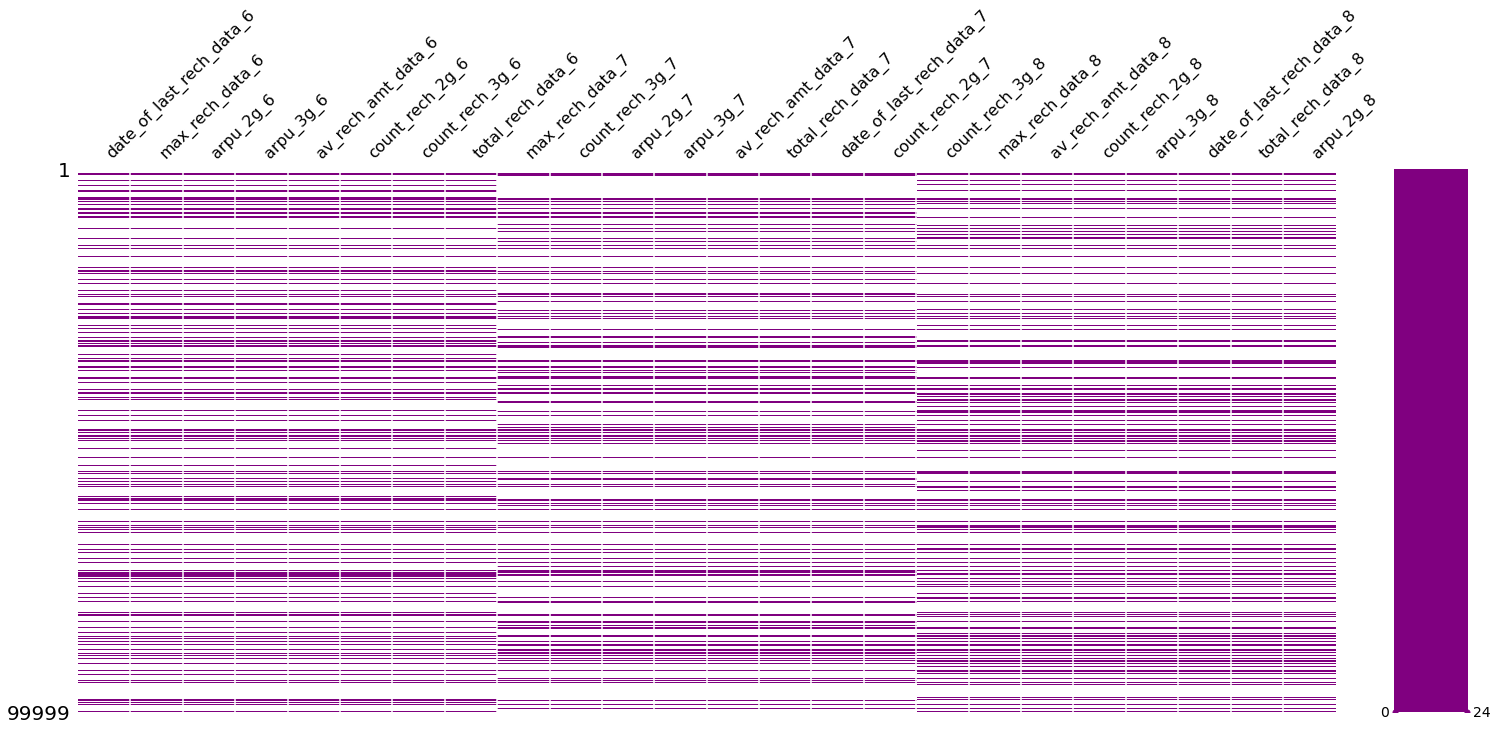

In [37]:
#Viewing Missing Values in Dataframe
import missingno as msno
msno.matrix(data[high_miss], color = (0.5, 0.0, 0.5))

**`It can be seen that the data is not missing completely at random, there is a pattern of missing values`**

In [38]:
# After Checking value counts and describe imputation may cause the couluns to become biased as the %null is 70+

# Dropping these columns having > 70% Null as they cannot be used because of null
data.drop(high_miss, axis = 1, inplace = True)
data.shape

(99999, 136)

**`Total columns = 136 `**

### Dropping 'date' Column

In [39]:
### Selecting  'date' Columns
drop_date = [i for i in list(data.columns) if i.__contains__('date') == True]
print(drop_date)

['date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8']


In [40]:
# Dropping date columns as they have no meaningful use in the analysis
data.drop(drop_date, axis = 1, inplace =True)
data.shape

(99999, 133)

**`Total columns = 133 `**

### Renaming Columns

In [41]:
# dropping 'sep_vbc_3g' because it belongs to september month
data.drop('sep_vbc_3g', axis = 1, inplace = True)

In [42]:
# renaming columns
data.rename(columns = {'jun_vbc_3g':'vbc_3g_6','jul_vbc_3g': 'vbc_3g_7','aug_vbc_3g': 'vbc_3g_8' }, inplace = True)
data.shape

(99999, 132)

In [43]:
# Checking Renamed columns
data.head()

,mobile_number,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,vbc_3g_8,vbc_3g_7,vbc_3g_6,churn
0,7000842753,197.385,214.816,213.803,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.0,NaN,NaN,0.00,NaN,NaN,0.0,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,4.13,NaN,NaN,1.15,NaN,NaN,5.44,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,0.00,0.00,5.44,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,4,3,2,362,252,252,252,252,252,252,252,252,30.13,1.32,5.75,83.57,150.76,109.61,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,1,1,1,968,30.4,0.0,101.20,1
1,7001865778,34.047,355.074,268.321,24.11,78.68,7.68,15.74,99.84,304.76,0.0,0.00,0.00,0.0,0.00,0.00,23.88,74.56,7.68,11.51,75.94,291.86,0.00,0.00,0.00,0.0,2.91,0.00,35.39,150.51,299.54,0.23,4.11,0.00,0.00,0.46,0.13,0.00,0.00,0.00,0.23,4.58,0.13,0.0,0.0,0.0,4.68,23.43,12.76,0.00,0.0,0.0,40.31,178.53,312.44,1.61,29.91,29.23,17.48,65.38,375.58,0.00,8.93,3.61,19.09,104.23,408.43,0.00,0.00,2.35,5.90,0.00,12.49,0.00,0.00,0.00,5.90,0.00,14.84,26.83,104.23,423.28,0.00,0.0,0.0,1.83,0.00,0.0,0.00,0.00,0.0,4,9,11,74,384,283,44,154,65,44,23,30,0.00,108.07,365.47,0.00,0.00,0.00,-1,0,0,0,1,0,0,0,2,0,0,0,0,0,0,-1,1,1,1006,0.0,0.0,0.00,0
2,7001625959,167.690,189.058,210.226,11.54,55.24,37.26,143.33,220.59,208.36,0.0,0.00,0.00,0.0,0.00,0.00,7.19,28.74,13.58,29.34,16.86,38.46,24.11,21.79,15.61,0.0,135.54,45.76,60.66,67.41,67.66,4.34,26.49,22.58,41.81,67.41,75.53,1.48,14.76,22.83,47.64,108.68,120.94,0.0,0.0,0.0,46.56,236.84,96.84,0.45,0.0,0.0,155.33,412.94,285.46,115.69,71.11,67.46,14.38,15.44,38.89,99.48,122.29,49.63,229.56,208.86,155.99,72.41,71.29,28.69,45.18,177.01,167.09,21.73,58.34,43.23,139.33,306.66,239.03,370.04,519.53,395.03,0.21,0.0,0.0,0.00,0.85,0.0,0.93,3.14,0.0,5,4,2,168,315,116,86,200,86,0,200,86,0.00,0.00,0.00,0.00,0.00,0.00,-1,-1,-1,0,0,0,0,0,0,0,0,0,0,0,0,-1,-1,-1,1103,0.0,0.0,4.17,0
3,7001204172,221.338,251.102,508.054,99.91,54.39,310.98,123.31,109.01,71.68,0.0,54.86,44.38,0.0,28.09,39.04,73.68,34.81,10.61,107.43,83.21,22.46,1.91,0.65,4.91,0.0,0.00,0.00,183.03,118.68,37.99,26.23,14.89,289.58,2.99,1.73,6.53,0.00,0.00,0.00,29.23,16.63,296.11,0.0,0.0,0

### Checking 'total' columns

In [44]:
total_cols = [i for i in list(data.columns) if i.__contains__('total') == True]
print(total_cols)

['total_og_mou_6', 'total_og_mou_7', 'total_og_mou_8', 'total_ic_mou_6', 'total_ic_mou_7', 'total_ic_mou_8', 'total_rech_num_6', 'total_rech_num_7', 'total_rech_num_8', 'total_rech_amt_6', 'total_rech_amt_7', 'total_rech_amt_8']


In [45]:
# Checking Head of total columns
data[total_cols].head()

,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8
0,0.00,0.00,0.00,0.00,0.00,5.44,4,3,2,362,252,252
1,40.31,178.53,312.44,26.83,104.23,423.28,4,9,11,74,384,283
2,155.33,412.94,285.46,370.04,519.53,395.03,5,4,2,168,315,116
3,223.23,135.31,352.21,280.08,216.61,53.13,10,11,18,230,310,601
4,127.28,241.33,208.16,216.44,198.29,338.81,5,6,3,196,350,287


In [46]:
# Checking null values
data[total_cols].isnull().sum()

total_og_mou_6      0
total_og_mou_7      0
total_og_mou_8      0
total_ic_mou_6      0
total_ic_mou_7      0
total_ic_mou_8      0
total_rech_num_6    0
total_rech_num_7    0
total_rech_num_8    0
total_rech_amt_6    0
total_rech_amt_7    0
total_rech_amt_8    0
dtype: int64

### Checking columns based on Minutes of usage 'mou'

In [47]:
mou_cols = [i for i in list(data.columns) if i.__contains__('mou') == True]
print(mou_cols)

['onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8', 'offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8', 'roam_ic_mou_6', 'roam_ic_mou_7', 'roam_ic_mou_8', 'roam_og_mou_6', 'roam_og_mou_7', 'roam_og_mou_8', 'loc_og_t2t_mou_6', 'loc_og_t2t_mou_7', 'loc_og_t2t_mou_8', 'loc_og_t2m_mou_6', 'loc_og_t2m_mou_7', 'loc_og_t2m_mou_8', 'loc_og_t2f_mou_6', 'loc_og_t2f_mou_7', 'loc_og_t2f_mou_8', 'loc_og_t2c_mou_6', 'loc_og_t2c_mou_7', 'loc_og_t2c_mou_8', 'loc_og_mou_6', 'loc_og_mou_7', 'loc_og_mou_8', 'std_og_t2t_mou_6', 'std_og_t2t_mou_7', 'std_og_t2t_mou_8', 'std_og_t2m_mou_6', 'std_og_t2m_mou_7', 'std_og_t2m_mou_8', 'std_og_t2f_mou_6', 'std_og_t2f_mou_7', 'std_og_t2f_mou_8', 'std_og_mou_6', 'std_og_mou_7', 'std_og_mou_8', 'isd_og_mou_6', 'isd_og_mou_7', 'isd_og_mou_8', 'spl_og_mou_6', 'spl_og_mou_7', 'spl_og_mou_8', 'total_og_mou_6', 'total_og_mou_7', 'total_og_mou_8', 'loc_ic_t2t_mou_6', 'loc_ic_t2t_mou_7', 'loc_ic_t2t_mou_8', 'loc_ic_t2m_mou_6', 'loc_ic_t2m_mou_7', 'loc_ic_t2m_mou_8', 'loc_ic_t2f_mou_6'

In [48]:
# Checking length
len(mou_cols)

81

In [49]:
# Checking Stats of minutes of usage columns
data[mou_cols].describe([0.25, 0.75, 0.80, 0.85,0.9, 0.95, 0.97, 0.98, 0.99, 1]).T

,count,mean,std,min,25%,50%,75%,80%,85%,90%,95%,97%,98%,99%,100%,max
onnet_mou_6,96062.0,132.395875,297.207406,0.0,7.380,34.310,118.7400,158.906,223.7055,344.102,612.4075,847.7944,1055.4832,1431.7605,7376.71,7376.71
onnet_mou_7,96140.0,133.670805,308.794148,0.0,6.660,32.330,115.5950,158.182,224.2815,348.035,624.8355,872.8920,1079.5150,1478.5333,8157.78,8157.78
onnet_mou_8,94621.0,133.018098,308.951589,0.0,6.460,32.360,115.8600,156.840,223.9900,345.030,620.6900,859.5380,1075.2200,1480.3340,10752.56,10752.56
offnet_mou_6,96062.0,197.935577,316.851613,0.0,34.730,96.310,231.8600,283.806,357.2570,477.325,727.8790,945.9905,1144.5426,1539.5358,8362.36,8362.36
offnet_mou_7,96140.0,197.045133,325.862803,0.0,32.190,91.735,226.8150,279.780,357.6960,480.431,744.2250,958.3430,1155.0098,1549.3795,9667.13,9667.13
offnet_mou_8,94621.0,196.574803,327.170662,0.0,31.630,92.140,228.2600,281.440,361.1900,486.310,734.8600,947.2420,1146.0280,1530.3980,14007.34,14007.34
roam_ic_mou_6,96062.0,9.950013,72.825411,0.0,0.000,0.000,0.0000,0.060,3.3300,11.810,40.6400,79.3985,123.9490,219.8470,13724.38,13724.38
roam_ic_mou_7,96140.0,7.149898,73.447948,0.0,0.000,0.000,0.0000,0.000,0.2800,5.060,23.1400,49.2883,78.8644,154.4832,15371.04,15371.04
roam_ic_mou_8,94621.0,7.292981,68.402466,0.0,0.000,0.000,0.0000,0.000,0.2300,5.340,24.4600,51.7300,83.7280,162.9400,13095.36,13095.36
roam_og_mou_6,96062.0,13.911337,71.443196,0.0,0.000,0.000,0.0000,0.160,6.1400,22.480,69.1100,122.3351,175.2224,285.9958,3775.11,3775.11


**`It can be seen that all the above columns have MINIMUM 'mou' is 0, so  all Null Values can be replaced with 0`**

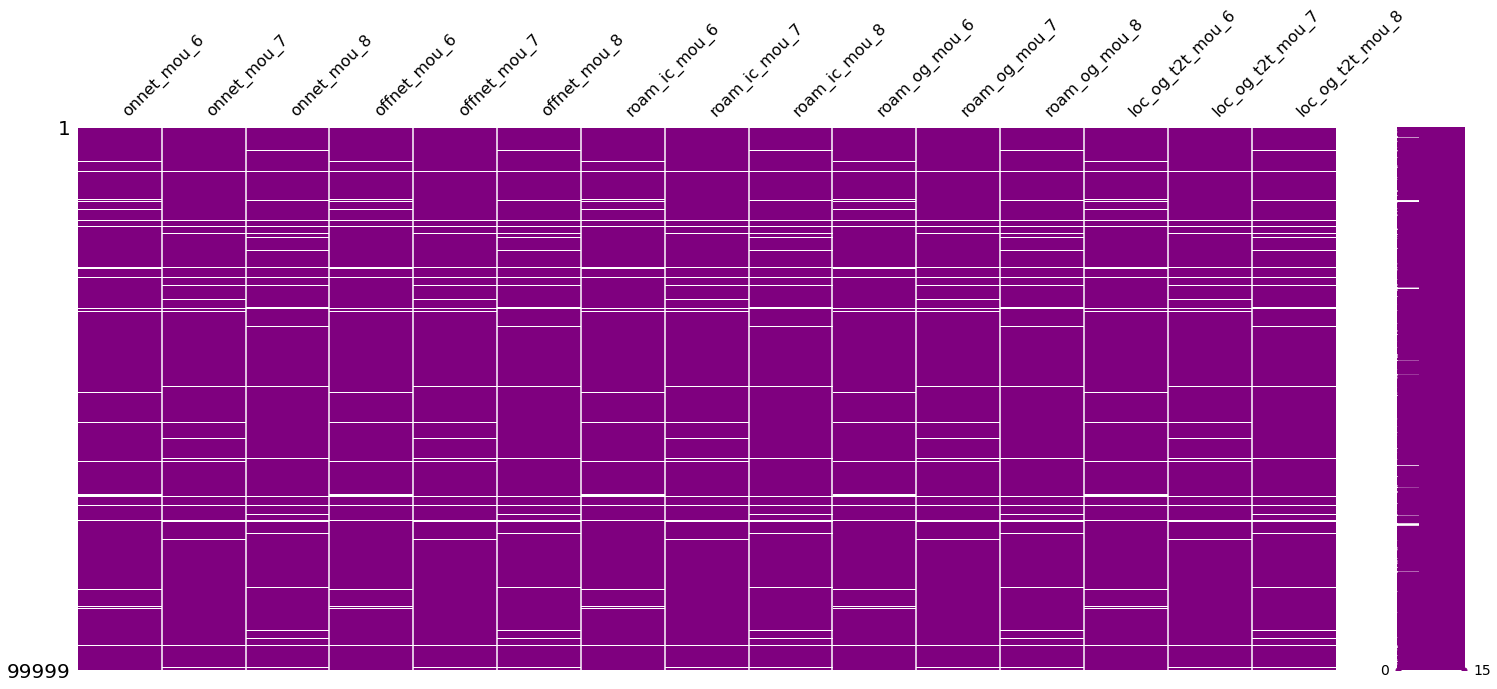

In [50]:
#Viewing Missing Values in Dataframe
msno.matrix(data[mou_cols[:15]], color = (0.5, 0.0, 0.5))

**`There is a pattern observed in missing values, if data is missing in 6th month then all values of that month are missing, similar pattern is observed for 7th and 8th month.`**

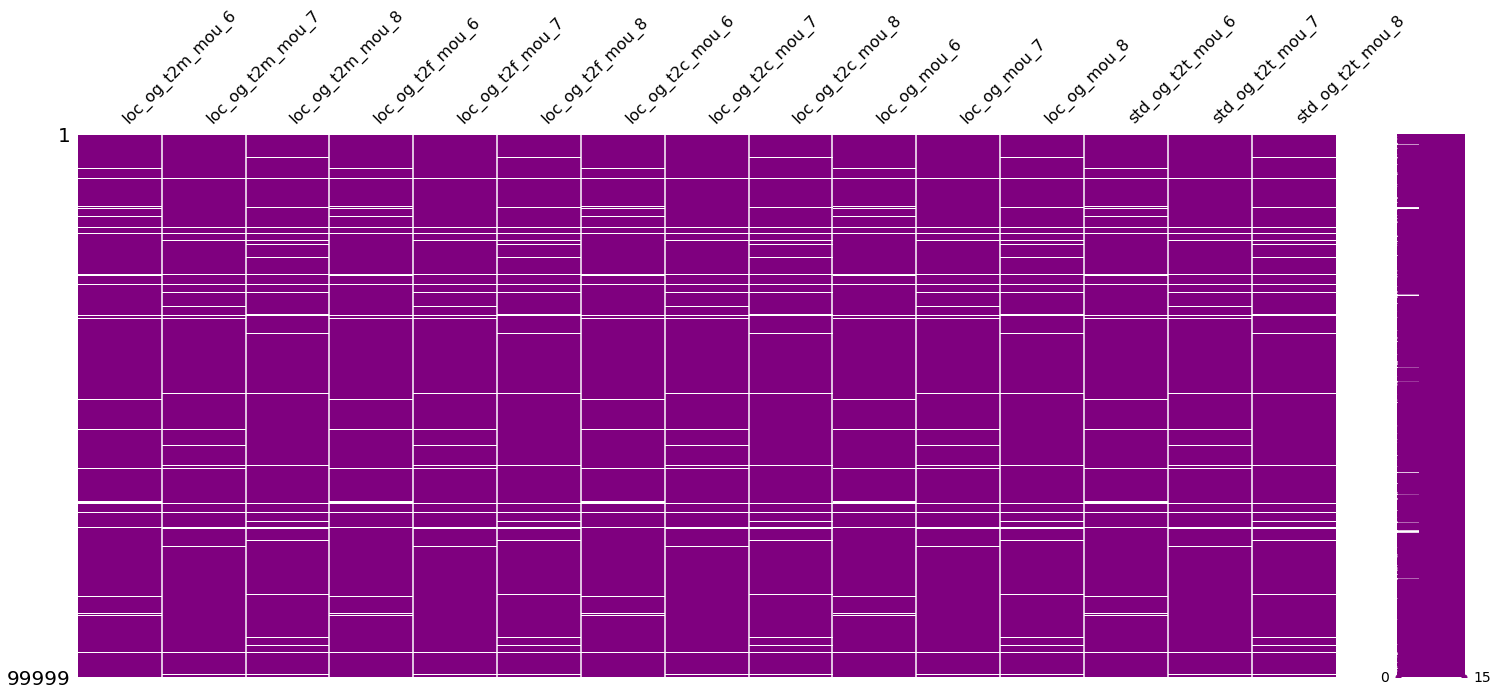

In [51]:
#Viewing Missing Values in Dataframe
msno.matrix(data[mou_cols[15:30]], color = (0.5, 0.0, 0.5))

In [52]:
# Checking For null values for 6th month 
data[mou_cols[::3]].isnull().sum()

onnet_mou_6         3937
offnet_mou_6        3937
roam_ic_mou_6       3937
roam_og_mou_6       3937
loc_og_t2t_mou_6    3937
loc_og_t2m_mou_6    3937
loc_og_t2f_mou_6    3937
loc_og_t2c_mou_6    3937
loc_og_mou_6        3937
std_og_t2t_mou_6    3937
std_og_t2m_mou_6    3937
std_og_t2f_mou_6    3937
std_og_mou_6        3937
isd_og_mou_6        3937
spl_og_mou_6        3937
total_og_mou_6         0
loc_ic_t2t_mou_6    3937
loc_ic_t2m_mou_6    3937
loc_ic_t2f_mou_6    3937
loc_ic_mou_6        3937
std_ic_t2t_mou_6    3937
std_ic_t2m_mou_6    3937
std_ic_t2f_mou_6    3937
std_ic_mou_6        3937
total_ic_mou_6         0
spl_ic_mou_6        3937
isd_ic_mou_6        3937
dtype: int64

In [53]:
# Replacing null values with 0 as it is the minimum value if the person has not used any service
data[mou_cols] = data[mou_cols].fillna(0.0)
data[mou_cols].head()

,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8
0,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.16,0.00,0.00,4.13,0.00,0.00,1.15,0.00,0.00,5.44,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,5.44,0.00,0.0,0.0,0.00,0.00,0.0
1,24.11,78.68,7.68,15.74,99.84,304.76,0.0,0.00,0.00,0.0,0.00,0.00,23.88,74.56,7.68,11.51,75.94,291.86,0.00,0.00,0.00,0.0,2.91,0.00,35.39,150.51,299.54,0.23,4.11,0.00,0.00,0.46,0.13,0.00,0.00,0.00,0.23,4.58,0.13,0.0,0.0,0.0,4.68,23.43,12.76,40.31,178.53,312.44,1.61,29.91,29.23,17.48,65.38,375.58,0.00,8.93,3.61,19.09,104.23,408.43,0.00,0.00,2.35,5.90,0.00,12.49,0.00,0.00,0.00,5.90,0.00,14.84,26.83,104.23,423.28,0.00,0.0,0.0,1.83,0.00,0.0
2,11.54,55.24,37.26,143.33,220.59,208.36,0.0,0.00,0.00,0.0,0.00,0.00,7.19,28.74,13.58,29.34,16.86,38.46,24.11,21.79,15.61,0.0,135.54,45.76,60.66,67.41,67.66,4.34,26.49,22.58,41.81,67.41,75.53,1.48,14.76,22.83,47.64,108.68,120.94,0.0,0.0,0.0,46.56,236.84,96.84,155.33,412.94,285.46,115.69,71.11,67.46,14.38,15.44,38.89,99.48,122.29,49.63,229.56,208.86,155.99,72.41,71.29,28.69,45.18,177.01,167.09,21.73,58.34,43.23,139.33,306.66,239.03,370.04,519.53,395.03,0.21,0.0,0.0,0.00,0.85,0.0
3,99.91,54.39,310.98,123.31,109.01,71.68,0.0,54.86,44.38,0.0,28.09,39.04,73.68,34.81,10.61,107.43,83.21,22.46,1.91,0.65,4.91,0.0,0.00,0.00,183.03,118.68,37.99,26.23,14.89,289.58,2.99,1.73,6.53,0.00,0.00,0.00,29.23,16.63,296.11,0.0,0.0,0.0,10.96,0.00,18.09,223.23,135.31,352.21,62.08,19.98,8.04,113.96,64.51,20.28,57.43,27.09,19.84,233.48,111.59,48.18,43.48,66.44,0.00,1.33,38.56,4.94,1.18,0.00,0.00,45.99,105.01,4.94,280.08,216.61,53.13,0.59,0.0,0.0,0.00,0.00,0.0
4,50.31,149.44,83.89,76.96,91.88,124.26,0.0,0.00,0.00,0.0,0.00,0.00,50.31,149.44,83.89,67.64,91.88,124.26,0.00,0.00,0.00,0.0,0.00,0.00,117.96,241.33,208.16,0.00,0.00,0.00,9.31,0.00,0.00,0.00,0.00,0.00,9.31,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,127.28,241.33,208.16,105.68,88.49,233.81,106.84,109.54,104.13,1.50,0.00,0.00,214.03,198.04,337.94,0.00,0.00,0.86,1.93,0.25,0.00,0.00,0.00,0.00,1.93,0.25,0.86,216.44,198.29,338.81,0.00,0.0,0.0,0.00,0.00,0.0


In [54]:
# Rechecking null values for whole dataframe
data.isnull().sum()

mobile_number            0
arpu_6                   0
arpu_7                   0
arpu_8                   0
onnet_mou_6              0
onnet_mou_7              0
onnet_mou_8              0
offnet_mou_6             0
offnet_mou_7             0
offnet_mou_8             0
roam_ic_mou_6            0
roam_ic_mou_7            0
roam_ic_mou_8            0
roam_og_mou_6            0
roam_og_mou_7            0
roam_og_mou_8            0
loc_og_t2t_mou_6         0
loc_og_t2t_mou_7         0
loc_og_t2t_mou_8         0
loc_og_t2m_mou_6         0
loc_og_t2m_mou_7         0
loc_og_t2m_mou_8         0
loc_og_t2f_mou_6         0
loc_og_t2f_mou_7         0
loc_og_t2f_mou_8         0
loc_og_t2c_mou_6         0
loc_og_t2c_mou_7         0
loc_og_t2c_mou_8         0
loc_og_mou_6             0
loc_og_mou_7             0
loc_og_mou_8             0
std_og_t2t_mou_6         0
std_og_t2t_mou_7         0
std_og_t2t_mou_8         0
std_og_t2m_mou_6         0
std_og_t2m_mou_7         0
std_og_t2m_mou_8         0
s

### Checking 'others' Column

In [55]:
others_cols = [i for i in list(data.columns) if i.__contains__('others') == True]
print(others_cols)

['og_others_6', 'og_others_7', 'og_others_8', 'ic_others_6', 'ic_others_7', 'ic_others_8']


In [56]:
data[others_cols].head()

,og_others_6,og_others_7,og_others_8,ic_others_6,ic_others_7,ic_others_8
0,NaN,NaN,0.0,NaN,NaN,0.0
1,0.00,0.0,0.0,0.00,0.00,0.0
2,0.45,0.0,0.0,0.93,3.14,0.0
3,0.00,0.0,0.0,0.00,0.00,0.0
4,0.00,0.0,0.0,0.48,0.00,0.0


In [57]:
data[others_cols].describe().T

,count,mean,std,min,25%,50%,75%,max
og_others_6,96062.0,0.454157,4.125911,0.0,0.0,0.0,0.0,800.89
og_others_7,96140.0,0.030235,2.161717,0.0,0.0,0.0,0.0,370.13
og_others_8,94621.0,0.033372,2.323464,0.0,0.0,0.0,0.0,394.93
ic_others_6,96062.0,0.854656,11.955164,0.0,0.0,0.0,0.0,1362.94
ic_others_7,96140.0,1.012960,12.673099,0.0,0.0,0.0,0.0,1495.94
ic_others_8,94621.0,0.970800,13.284348,0.0,0.0,0.0,0.0,2327.51


In [58]:
# Replacing Null with Zero
data[others_cols] = data[others_cols].fillna(0.0)
data[others_cols].head()

,og_others_6,og_others_7,og_others_8,ic_others_6,ic_others_7,ic_others_8
0,0.00,0.0,0.0,0.00,0.00,0.0
1,0.00,0.0,0.0,0.00,0.00,0.0
2,0.45,0.0,0.0,0.93,3.14,0.0
3,0.00,0.0,0.0,0.00,0.00,0.0
4,0.00,0.0,0.0,0.48,0.00,0.0


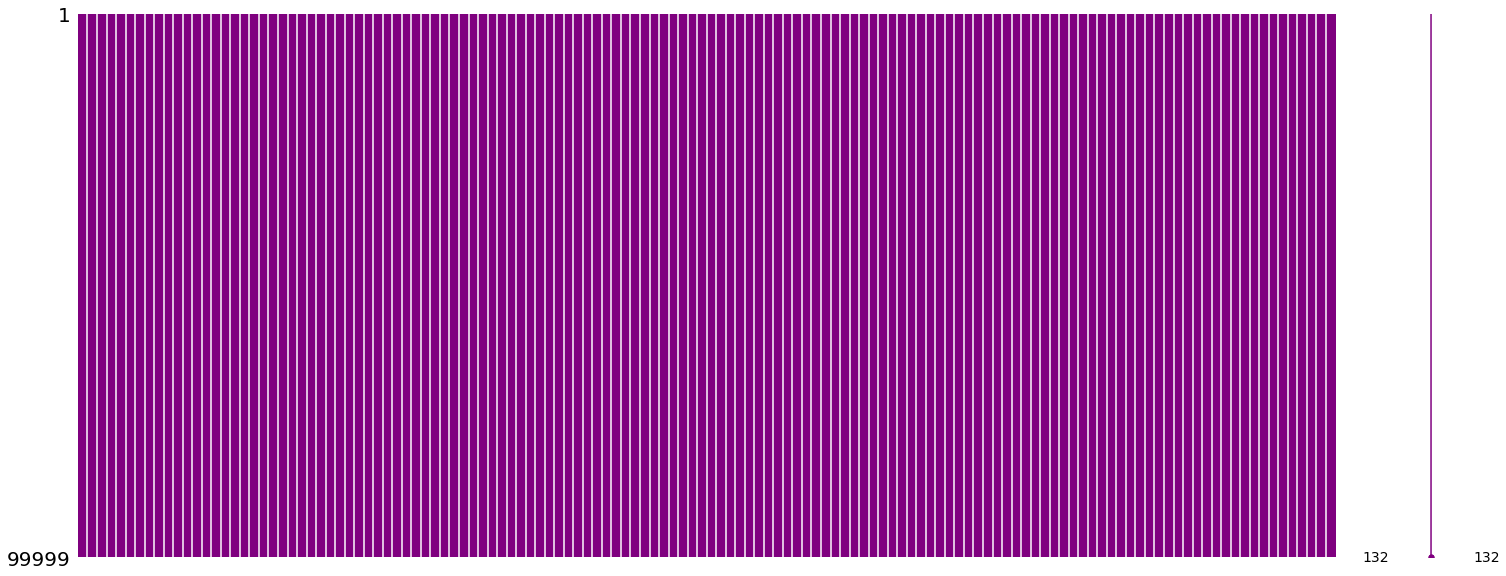

In [59]:
#Rechecking / Viewing Missing Values in Dataframe
msno.matrix(data, color = (0.5, 0.0, 0.5))

### **`There are no missing values in data frame all missing values have been imputed`**

In [60]:
data.head()

,mobile_number,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,vbc_3g_8,vbc_3g_7,vbc_3g_6,churn
0,7000842753,197.385,214.816,213.803,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.16,0.00,0.00,4.13,0.00,0.00,1.15,0.00,0.00,5.44,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,5.44,0.00,0.0,0.0,0.00,0.00,0.0,0.00,0.00,0.0,4,3,2,362,252,252,252,252,252,252,252,252,30.13,1.32,5.75,83.57,150.76,109.61,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,1,1,1,968,30.4,0.0,101.20,1
1,7001865778,34.047,355.074,268.321,24.11,78.68,7.68,15.74,99.84,304.76,0.0,0.00,0.00,0.0,0.00,0.00,23.88,74.56,7.68,11.51,75.94,291.86,0.00,0.00,0.00,0.0,2.91,0.00,35.39,150.51,299.54,0.23,4.11,0.00,0.00,0.46,0.13,0.00,0.00,0.00,0.23,4.58,0.13,0.0,0.0,0.0,4.68,23.43,12.76,0.00,0.0,0.0,40.31,178.53,312.44,1.61,29.91,29.23,17.48,65.38,375.58,0.00,8.93,3.61,19.09,104.23,408.43,0.00,0.00,2.35,5.90,0.00,12.49,0.00,0.00,0.00,5.90,0.00,14.84,26.83,104.23,423.28,0.00,0.0,0.0,1.83,0.00,0.0,0.00,0.00,0.0,4,9,11,74,384,283,44,154,65,44,23,30,0.00,108.07,365.47,0.00,0.00,0.00,-1,0,0,0,1,0,0,0,2,0,0,0,0,0,0,-1,1,1,1006,0.0,0.0,0.00,0
2,7001625959,167.690,189.058,210.226,11.54,55.24,37.26,143.33,220.59,208.36,0.0,0.00,0.00,0.0,0.00,0.00,7.19,28.74,13.58,29.34,16.86,38.46,24.11,21.79,15.61,0.0,135.54,45.76,60.66,67.41,67.66,4.34,26.49,22.58,41.81,67.41,75.53,1.48,14.76,22.83,47.64,108.68,120.94,0.0,0.0,0.0,46.56,236.84,96.84,0.45,0.0,0.0,155.33,412.94,285.46,115.69,71.11,67.46,14.38,15.44,38.89,99.48,122.29,49.63,229.56,208.86,155.99,72.41,71.29,28.69,45.18,177.01,167.09,21.73,58.34,43.23,139.33,306.66,239.03,370.04,519.53,395.03,0.21,0.0,0.0,0.00,0.85,0.0,0.93,3.14,0.0,5,4,2,168,315,116,86,200,86,0,200,86,0.00,0.00,0.00,0.00,0.00,0.00,-1,-1,-1,0,0,0,0,0,0,0,0,0,0,0,0,-1,-1,-1,1103,0.0,0.0,4.17,0
3,7001204172,221.338,251.102,508.054,99.91,54.39,310.98,123.31,109.01,71.68,0.0,54.86,44.38,0.0,28.09,39.04,73.68,34.81,10.61,107.43,83.21,22.46,1.91,0.65,4.91,0.0,0.00,0.00,183.03,118.68,37.99,26.23,14.89,289.58,2.99,1.73,6

In [61]:
data.shape

(99999, 132)

**`Total columns = 132`**

### Volume based Analysis

In [62]:
vol_columns = [name for name in list(data.columns) if name.__contains__('vol')]
print(vol_columns)

['vol_2g_mb_6', 'vol_2g_mb_7', 'vol_2g_mb_8', 'vol_3g_mb_6', 'vol_3g_mb_7', 'vol_3g_mb_8']


In [63]:
data[vol_columns].head()

,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8
0,30.13,1.32,5.75,83.57,150.76,109.61
1,0.00,108.07,365.47,0.00,0.00,0.00
2,0.00,0.00,0.00,0.00,0.00,0.00
3,0.00,0.00,0.00,0.00,0.00,0.00
4,0.00,0.00,0.00,0.00,0.00,0.00


In [64]:
data[vol_columns].describe([0.25, 0.75, 0.80, 0.85,0.9, 0.95, 0.97, 0.98, 0.99]).T

,count,mean,std,min,25%,50%,75%,80%,85%,90%,95%,97%,98%,99%,max
vol_2g_mb_6,99999.0,51.904956,213.356445,0.0,0.0,0.0,0.0,2.570,27.030,101.574,326.821,531.4424,700.1216,1005.4910,10285.90
vol_2g_mb_7,99999.0,51.229937,212.302217,0.0,0.0,0.0,0.0,3.160,26.670,97.866,319.194,511.0700,680.6304,993.1720,7873.55
vol_2g_mb_8,99999.0,50.170154,212.347892,0.0,0.0,0.0,0.0,3.724,25.950,93.114,305.514,508.1418,677.2440,983.5122,11117.61
vol_3g_mb_6,99999.0,121.396219,544.247227,0.0,0.0,0.0,0.0,0.000,0.000,298.614,827.795,1157.3932,1488.8948,2176.4542,45735.40
vol_3g_mb_7,99999.0,128.995847,541.494013,0.0,0.0,0.0,0.0,0.000,4.696,339.934,869.562,1237.8756,1580.4700,2254.5828,28144.12
vol_3g_mb_8,99999.0,135.410689,558.775335,0.0,0.0,0.0,0.0,0.000,22.713,375.724,901.063,1266.3612,1612.3284,2354.2312,30036.06


In [65]:
# checking high usage customers based on churn above 0.90 quantile
data['churn'][data['vol_2g_mb_6'] >= data['vol_2g_mb_6'].quantile(0.90)].value_counts()

0    9190
1     810
Name: churn, dtype: int64

In [66]:
# checking high usage customers based on churn above 0.90 quantile
data['churn'][data['vol_3g_mb_6'] >= data['vol_2g_mb_6'].quantile(0.90)].value_counts()

0    11537
1      946
Name: churn, dtype: int64

**`Very high usage churn customers are very low in number when compared to whole data, capping is required to handle outliers and for modelling`**

### Amount based Analysis

In [67]:
amt_columns = [name for name in list(data.columns) if name.__contains__('amt')]
print(amt_columns)

['total_rech_amt_6', 'total_rech_amt_7', 'total_rech_amt_8', 'max_rech_amt_6', 'max_rech_amt_7', 'max_rech_amt_8', 'last_day_rch_amt_6', 'last_day_rch_amt_7', 'last_day_rch_amt_8']


In [68]:
data[amt_columns].head()

,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8
0,362,252,252,252,252,252,252,252,252
1,74,384,283,44,154,65,44,23,30
2,168,315,116,86,200,86,0,200,86
3,230,310,601,60,50,50,30,50,50
4,196,350,287,56,110,110,50,110,110


In [69]:
data['avg_recharge_67'] = (data['total_rech_amt_6']+ data['total_rech_amt_7'])/2 
data['avg_recharge_67'].head()

0    307.0
1    229.0
2    241.5
3    270.0
4    273.0
Name: avg_recharge_67, dtype: float64

In [70]:
data['avg_recharge_67'].describe()

count    99999.000000
mean       325.238792
std        370.833466
min          0.000000
25%        115.000000
50%        229.000000
75%        419.000000
max      37762.500000
Name: avg_recharge_67, dtype: float64

In [71]:
# Avg 0.7 quantile
data['avg_recharge_67'].quantile(0.7)

368.5

### High Valued Customers

In [72]:
data[data['avg_recharge_67'] >= 368.5].shape

(30011, 133)

In [73]:
highvalued_customers = data[data['avg_recharge_67'] >= 368.5].copy()
highvalued_customers.head()

,mobile_number,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,vbc_3g_8,vbc_3g_7,vbc_3g_6,churn,avg_recharge_67
7,7000701601,1069.180,1349.850,3171.480,57.84,54.68,52.29,453.43,567.16,325.91,16.23,33.49,31.64,23.74,12.59,38.06,51.39,31.38,40.28,308.63,447.38,162.28,62.13,55.14,53.23,0.0,0.0,0.00,422.16,533.91,255.79,4.30,23.29,12.01,49.89,31.76,49.14,6.66,20.08,16.68,60.86,75.14,77.84,0.0,0.18,10.01,4.50,0.00,6.50,0.00,0.0,0.0,487.53,609.24,350.16,58.14,32.26,27.31,217.56,221.49,121.19,152.16,101.46,39.53,427.88,355.23,188.04,36.89,11.83,30.39,91.44,126.99,141.33,52.19,34.24,22.21,180.54,173.08,193.94,626.46,558.04,428.74,0.21,0.0,0.0,2.06,14.53,31.59,15.74,15.19,15.14,5,5,7,1580,790,3638,1580,790,1580,0,0,779,0.0,0.0,0.00,0.0,0.00,0.00,-1,-1,-1,0,0,0,0,0,0,0,0,0,0,0,0,-1,-1,-1,802,57.74,19.38,18.74,1,1185.0
8,7001524846,378.721,492.223,137.362,413.69,351.03,35.08,94.66,80.63,136.48,0.00,0.00,0.00,0.00,0.00,0.00,297.13,217.59,12.49,80.96,70.58,50.54,0.00,0.00,0.00,0.0,0.0,7.15,378.09,288.18,63.04,116.56,133.43,22.58,13.69,10.04,75.69,0.00,0.00,0.00,130.26,143.48,98.28,0.0,0.00,0.00,0.00,0.00,10.23,0.00,0.0,0.0,508.36,431.66,171.56,23.84,9.84,0.31,57.58,13.98,15.48,0.00,0.00,0.00,81.43,23.83,15.79,0.00,0.58,0.10,22.43,4.08,0.65,0.00,0.00,0.00,22.43,4.66,0.75,103.86,28.49,16.54,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,19,21,14,437,601,120,90,154,30,50,0,10,0.0,356.0,0.03,0.0,750.95,11.94,-1,0,0,0,1,0,0,1,3,0,0,0,0,0,0,-1,1,1,315,21.03,910.65,122.16,0,519.0
13,7002191713,492.846,205.671,593.260,501.76,108.39,534.24,413.31,119.28,482.46,23.53,144.24,72.11,7.98,35.26,1.44,49.63,6.19,36.01,151.13,47.28,294.46,4.54,0.00,23.51,0.0,0.0,0.49,205.31,53.48,353.99,446.41,85.98,498.23,255.36,52.94,156.94,0.00,0.00,0.00,701.78,138.93,655.18,0.0,0.00,1.29,0.00,0.00,4.78,0.00,0.0,0.0,907.09,192.41,1015.26,67.88,7.58,52.58,142.88,18.53,195.18,4.81,0.00,7.49,215.58,26.11,255.26,115.68,38.29,154.58,308.13,29.79,317.91,0.00,0.00,1.91,423.81,68.09,474.41,968.61,172.58,1144.53,0.45,0.0,0.0,245.28,62.11,393.39,83.48,16.24,21.44,6,4,11,507,253,717,110,110,130,110,50,0,0.0,0.0,0.02,0.0,0.00,0.00,-1,-1,0,0,0,0,0,0,3,0,0,0,0,0,0,-1,-1,1,2607,0.00,0.00,0.00,0,380.0
16,7000875565,430.975,299.869,187.894,50.51

In [74]:
# Dropping Avg Recharge_67 column
highvalued_customers.drop('avg_recharge_67', axis = 1, inplace = True)
highvalued_customers.shape

(30011, 132)

In [75]:
highvalued_customers.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30011 entries, 7 to 99997
Columns: 132 entries, mobile_number to churn
dtypes: float64(99), int32(1), int64(20), object(12)
memory usage: 30.3+ MB


**`Total rows = 30011, total columns = 132`**

### Churn Ratio of High valued Customers

In [76]:
highvalued_customers['churn'].value_counts(normalize = True)*100

0    91.359835
1     8.640165
Name: churn, dtype: float64

**`8.64% of people churned out of all high valued customers`**

## Selecting columns Based on Data Types and Analysing

### Checking Object Columns

In [77]:
object_cols = highvalued_customers.select_dtypes(include=['object'])
object_cols.head()

,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,fb_user_6,fb_user_7,fb_user_8
7,-1,-1,-1,0,0,0,0,0,0,-1,-1,-1
8,-1,0,0,0,1,0,0,0,0,-1,1,1
13,-1,-1,0,0,0,0,0,0,0,-1,-1,1
16,-1,-1,-1,0,0,0,0,0,0,-1,-1,-1
17,-1,-1,-1,0,0,0,0,0,0,-1,-1,-1


In [78]:
highvalued_customers['monthly_2g_8'].value_counts()

0     26938
1      2761
2       283
35       29
Name: monthly_2g_8, dtype: int64

In [79]:
# Dummies for season monthly_2g and monthly_3g
highvalued_customers = pd.get_dummies(highvalued_customers, prefix = ['2G_mon_6'], columns = ['monthly_2g_6'],  drop_first= True)
highvalued_customers = pd.get_dummies(highvalued_customers, prefix = ['2G_mon_7'], columns = ['monthly_2g_7'],  drop_first= True)
highvalued_customers = pd.get_dummies(highvalued_customers, prefix = ['2G_mon_8'], columns = ['monthly_2g_8'],  drop_first= True)
highvalued_customers = pd.get_dummies(highvalued_customers, prefix = ['3G_mon_6'], columns = ['monthly_3g_6'],  drop_first= True)
highvalued_customers = pd.get_dummies(highvalued_customers, prefix = ['3G_mon_7'], columns = ['monthly_3g_7'],  drop_first= True)
highvalued_customers = pd.get_dummies(highvalued_customers, prefix = ['3G_mon_8'], columns = ['monthly_3g_8'],  drop_first= True)
highvalued_customers.head()

,mobile_number,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,vbc_3g_8,vbc_3g_7,vbc_3g_6,churn,2G_mon_6_1,2G_mon_6_2,2G_mon_6_35,2G_mon_7_1,2G_mon_7_2,2G_mon_7_35,2G_mon_8_1,2G_mon_8_2,2G_mon_8_35,3G_mon_6_1,3G_mon_6_2,3G_mon_6_420,3G_mon_7_1,3G_mon_7_2,3G_mon_7_420,3G_mon_8_1,3G_mon_8_2,3G_mon_8_420
7,7000701601,1069.180,1349.850,3171.480,57.84,54.68,52.29,453.43,567.16,325.91,16.23,33.49,31.64,23.74,12.59,38.06,51.39,31.38,40.28,308.63,447.38,162.28,62.13,55.14,53.23,0.0,0.0,0.00,422.16,533.91,255.79,4.30,23.29,12.01,49.89,31.76,49.14,6.66,20.08,16.68,60.86,75.14,77.84,0.0,0.18,10.01,4.50,0.00,6.50,0.00,0.0,0.0,487.53,609.24,350.16,58.14,32.26,27.31,217.56,221.49,121.19,152.16,101.46,39.53,427.88,355.23,188.04,36.89,11.83,30.39,91.44,126.99,141.33,52.19,34.24,22.21,180.54,173.08,193.94,626.46,558.04,428.74,0.21,0.0,0.0,2.06,14.53,31.59,15.74,15.19,15.14,5,5,7,1580,790,3638,1580,790,1580,0,0,779,0.0,0.0,0.00,0.0,0.00,0.00,-1,-1,-1,0,0,0,0,0,0,-1,-1,-1,802,57.74,19.38,18.74,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,7001524846,378.721,492.223,137.362,413.69,351.03,35.08,94.66,80.63,136.48,0.00,0.00,0.00,0.00,0.00,0.00,297.13,217.59,12.49,80.96,70.58,50.54,0.00,0.00,0.00,0.0,0.0,7.15,378.09,288.18,63.04,116.56,133.43,22.58,13.69,10.04,75.69,0.00,0.00,0.00,130.26,143.48,98.28,0.0,0.00,0.00,0.00,0.00,10.23,0.00,0.0,0.0,508.36,431.66,171.56,23.84,9.84,0.31,57.58,13.98,15.48,0.00,0.00,0.00,81.43,23.83,15.79,0.00,0.58,0.10,22.43,4.08,0.65,0.00,0.00,0.00,22.43,4.66,0.75,103.86,28.49,16.54,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,19,21,14,437,601,120,90,154,30,50,0,10,0.0,356.0,0.03,0.0,750.95,11.94,-1,0,0,0,1,3,0,0,0,-1,1,1,315,21.03,910.65,122.16,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
13,7002191713,492.846,205.671,593.260,501.76,108.39,534.24,413.31,119.28,482.46,23.53,144.24,72.11,7.98,35.26,1.44,49.63,6.19,36.01,151.13,47.28,294.46,4.54,0.00,23.51,0.0,0.0,0.49,205.31,53.48,353.99,446.41,85.98,498.23,255.36,52.94,156.94,0.00,0.00,0.00,701.78,138.93,655.18,0.0,0.00,1.29,0.00,0.00,4.78,0.00,0.0,0.0,907.09,192.41,1015.26,67.88,7.58,52.58,142.88,18.53,195.18,4.81,0.00,7.49,215.58,26.11,255.26,115.68,38.29,154.58,308.13,29.79,317.91,0.00,0.00,1.91,423.81,68.09,474.41,968.61,172.58,1144.53,0.45,0.0,0.0,245.28,62.11,393.39,83.48,16.24,21.44,6,4,11,507,253,717,110,110,130

In [80]:
# Dummies for night pack and fb_user
highvalued_customers = pd.get_dummies(highvalued_customers, prefix = ['night_pck_6'], columns = ['night_pck_user_6'],  drop_first= True)
highvalued_customers = pd.get_dummies(highvalued_customers, prefix = ['night_pck_7'], columns = ['night_pck_user_7'],  drop_first= True)
highvalued_customers = pd.get_dummies(highvalued_customers, prefix = ['night_pck_8'], columns = ['night_pck_user_8'],  drop_first= True)
highvalued_customers = pd.get_dummies(highvalued_customers, prefix = ['fb_user_6'], columns = ['fb_user_6'],  drop_first= True)
highvalued_customers = pd.get_dummies(highvalued_customers, prefix = ['fb_user_7'], columns = ['fb_user_7'],  drop_first= True)
highvalued_customers = pd.get_dummies(highvalued_customers, prefix = ['fb_user_8'], columns = ['fb_user_8'],  drop_first= True)

highvalued_customers.head()

,mobile_number,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,vbc_3g_8,vbc_3g_7,vbc_3g_6,churn,2G_mon_6_1,2G_mon_6_2,2G_mon_6_35,2G_mon_7_1,2G_mon_7_2,2G_mon_7_35,2G_mon_8_1,2G_mon_8_2,2G_mon_8_35,3G_mon_6_1,3G_mon_6_2,3G_mon_6_420,3G_mon_7_1,3G_mon_7_2,3G_mon_7_420,3G_mon_8_1,3G_mon_8_2,3G_mon_8_420,night_pck_6_0.0,night_pck_6_1.0,night_pck_7_0.0,night_pck_7_1.0,night_pck_8_0.0,night_pck_8_1.0,fb_user_6_0.0,fb_user_6_1.0,fb_user_7_0.0,fb_user_7_1.0,fb_user_8_0.0,fb_user_8_1.0
7,7000701601,1069.180,1349.850,3171.480,57.84,54.68,52.29,453.43,567.16,325.91,16.23,33.49,31.64,23.74,12.59,38.06,51.39,31.38,40.28,308.63,447.38,162.28,62.13,55.14,53.23,0.0,0.0,0.00,422.16,533.91,255.79,4.30,23.29,12.01,49.89,31.76,49.14,6.66,20.08,16.68,60.86,75.14,77.84,0.0,0.18,10.01,4.50,0.00,6.50,0.00,0.0,0.0,487.53,609.24,350.16,58.14,32.26,27.31,217.56,221.49,121.19,152.16,101.46,39.53,427.88,355.23,188.04,36.89,11.83,30.39,91.44,126.99,141.33,52.19,34.24,22.21,180.54,173.08,193.94,626.46,558.04,428.74,0.21,0.0,0.0,2.06,14.53,31.59,15.74,15.19,15.14,5,5,7,1580,790,3638,1580,790,1580,0,0,779,0.0,0.0,0.00,0.0,0.00,0.00,0,0,0,0,0,0,802,57.74,19.38,18.74,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,7001524846,378.721,492.223,137.362,413.69,351.03,35.08,94.66,80.63,136.48,0.00,0.00,0.00,0.00,0.00,0.00,297.13,217.59,12.49,80.96,70.58,50.54,0.00,0.00,0.00,0.0,0.0,7.15,378.09,288.18,63.04,116.56,133.43,22.58,13.69,10.04,75.69,0.00,0.00,0.00,130.26,143.48,98.28,0.0,0.00,0.00,0.00,0.00,10.23,0.00,0.0,0.0,508.36,431.66,171.56,23.84,9.84,0.31,57.58,13.98,15.48,0.00,0.00,0.00,81.43,23.83,15.79,0.00,0.58,0.10,22.43,4.08,0.65,0.00,0.00,0.00,22.43,4.66,0.75,103.86,28.49,16.54,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,19,21,14,437,601,120,90,154,30,50,0,10,0.0,356.0,0.03,0.0,750.95,11.94,0,1,3,0,0,0,315,21.03,910.65,122.16,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,1
13,7002191713,492.846,205.671,593.260,501.76,108.39,534.24,413.31,119.28,482.46,23.53,144.24,72.11,7.98,35.26,1.44,49.63,6.19,36.01,151.13,47.28,294.46,4.54,0.00,23.51,0.0,0.0,0.49,205.31,53.48,353.99,446.41,85.98,498.23,255.36,52.94,156.94,0.00,0.00,0.00,701.78,138.93,655.18,0.0,0.00,1.29,0.00,0.00,4.78,0.00,0.0,0.0,907.09,192.41,1015.26,67.88,7.58,52.58,142.88,18.53,195.18,4.81,0.00,7.49,215.58,26.11,255.26,115.68,38.29,154.58,308.13,29.79,317.91,0.00,0.00,1.91,423.81,6

In [81]:
highvalued_customers.shape

(30011, 150)

In [82]:
highvalued_customers.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30011 entries, 7 to 99997
Columns: 150 entries, mobile_number to fb_user_8_1.0
dtypes: float64(99), int32(1), int64(20), uint8(30)
memory usage: 28.4 MB


**`Total rows = 30011, total columns = 150`**

### Integer Columns

In [83]:
int_cols = highvalued_customers.select_dtypes(include=['int64'])
int_cols.head()

,mobile_number,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon
7,7000701601,5,5,7,1580,790,3638,1580,790,1580,0,0,779,0,0,0,0,0,0,802
8,7001524846,19,21,14,437,601,120,90,154,30,50,0,10,0,1,3,0,0,0,315
13,7002191713,6,4,11,507,253,717,110,110,130,110,50,0,0,0,3,0,0,0,2607
16,7000875565,10,6,2,570,348,160,110,110,130,100,100,130,0,0,0,0,0,0,511
17,7000187447,19,2,4,816,0,30,110,0,30,30,0,0,0,0,0,0,0,0,667


In [84]:
int_cols.describe().T

,count,mean,std,min,25%,50%,75%,max
mobile_number,30011.0,7.001223e+09,684640.490765,7.000000e+09,7.000641e+09,7.001232e+09,7.001814e+09,7.002411e+09
total_rech_num_6,30011.0,1.212132e+01,9.543550,0.000000e+00,6.000000e+00,9.000000e+00,1.500000e+01,3.070000e+02
total_rech_num_7,30011.0,1.191347e+01,9.605532,0.000000e+00,6.000000e+00,9.000000e+00,1.500000e+01,1.380000e+02
total_rech_num_8,30011.0,1.022532e+01,9.478572,0.000000e+00,4.000000e+00,8.000000e+00,1.300000e+01,1.960000e+02
total_rech_amt_6,30011.0,6.973658e+02,539.325984,0.000000e+00,4.320000e+02,5.840000e+02,8.370000e+02,3.519000e+04
total_rech_amt_7,30011.0,6.959629e+02,562.143146,0.000000e+00,4.265000e+02,5.810000e+02,8.350000e+02,4.033500e+04
total_rech_amt_8,30011.0,6.136388e+02,601.821630,0.000000e+00,3.090000e+02,5.200000e+02,7.900000e+02,4.532000e+04
max_rech_amt_6,30011.0,1.714140e+02,174.703215,0.000000e+00,1.100000e+02,1.200000e+02,2.000000e+02,4.010000e+03
max_rech_amt_7,30011.0,1.756611e+02,181.545389,0.000000e+00,1.100000e+02,1.280000e+02,2.000000e+02,4.010000e+03
max_rech_amt_8,30011.0,1.628693e+02,172.605809,0.000000e+00,6.700000e+01,1.300000e+02,1.980000e+02,4.449000e+03


### Checking Correlation of these int columns

In [85]:
#Find Highly correlated data and drop Highly Correlated Columns
corr = int_cols.corr()
corr.loc[:, :] = np.tril(corr, k = -1)
corr = corr.stack()
corr[(corr >= 0.70) | (corr <= -0.70)].sort_values()

sachet_3g_7       sachet_3g_6         0.705966
sachet_2g_7       sachet_2g_6         0.716563
total_rech_num_8  total_rech_num_7    0.754122
dtype: float64

#### **`Correlation is not above 0.8`**

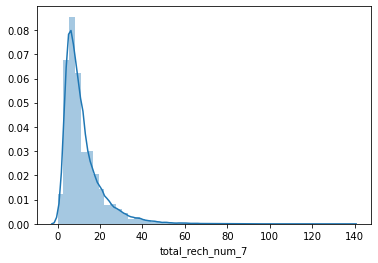

In [86]:
# Checking distplot
sns.distplot((int_cols['total_rech_num_7']))
plt.show()

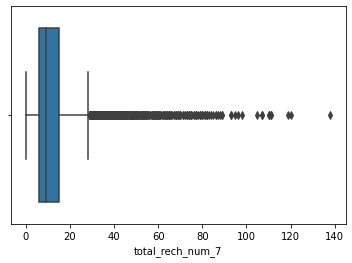

In [87]:
#Checking Boxplot
sns.boxplot(int_cols['total_rech_num_7'])
plt.show()

In [88]:
# checking Stats
int_cols['total_rech_num_7'].describe([0.25, 0.5, 0.7, 0.95, 0.99, 1])

count    30011.000000
mean        11.913465
std          9.605532
min          0.000000
25%          6.000000
50%          9.000000
70%         13.000000
95%         30.000000
99%         48.000000
100%       138.000000
max        138.000000
Name: total_rech_num_7, dtype: float64

In [89]:
# Number of rows above 99 quantile
int_cols[int_cols['total_rech_num_7'] >= int_cols['total_rech_num_7'].quantile(0.99)].shape

(314, 20)

In [90]:
# Number of rows above 99 quantile
int_cols[int_cols['max_rech_amt_7'] >= int_cols['max_rech_amt_7'].quantile(0.99)].shape

(404, 20)

**`There are very few outliers in the range 250 - 450 rows approx these can be capped to 99th quantile`**

### Checking Float columns

In [91]:
float_cols = highvalued_customers.select_dtypes(include=['float64'])
float_cols.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vbc_3g_8,vbc_3g_7,vbc_3g_6
7,1069.180,1349.850,3171.480,57.84,54.68,52.29,453.43,567.16,325.91,16.23,33.49,31.64,23.74,12.59,38.06,51.39,31.38,40.28,308.63,447.38,162.28,62.13,55.14,53.23,0.0,0.0,0.00,422.16,533.91,255.79,4.30,23.29,12.01,49.89,31.76,49.14,6.66,20.08,16.68,60.86,75.14,77.84,0.0,0.18,10.01,4.50,0.00,6.50,0.00,0.0,0.0,487.53,609.24,350.16,58.14,32.26,27.31,217.56,221.49,121.19,152.16,101.46,39.53,427.88,355.23,188.04,36.89,11.83,30.39,91.44,126.99,141.33,52.19,34.24,22.21,180.54,173.08,193.94,626.46,558.04,428.74,0.21,0.0,0.0,2.06,14.53,31.59,15.74,15.19,15.14,0.0,0.0,0.00,0.0,0.00,0.00,57.74,19.38,18.74
8,378.721,492.223,137.362,413.69,351.03,35.08,94.66,80.63,136.48,0.00,0.00,0.00,0.00,0.00,0.00,297.13,217.59,12.49,80.96,70.58,50.54,0.00,0.00,0.00,0.0,0.0,7.15,378.09,288.18,63.04,116.56,133.43,22.58,13.69,10.04,75.69,0.00,0.00,0.00,130.26,143.48,98.28,0.0,0.00,0.00,0.00,0.00,10.23,0.00,0.0,0.0,508.36,431.66,171.56,23.84,9.84,0.31,57.58,13.98,15.48,0.00,0.00,0.00,81.43,23.83,15.79,0.00,0.58,0.10,22.43,4.08,0.65,0.00,0.00,0.00,22.43,4.66,0.75,103.86,28.49,16.54,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.0,356.0,0.03,0.0,750.95,11.94,21.03,910.65,122.16
13,492.846,205.671,593.260,501.76,108.39,534.24,413.31,119.28,482.46,23.53,144.24,72.11,7.98,35.26,1.44,49.63,6.19,36.01,151.13,47.28,294.46,4.54,0.00,23.51,0.0,0.0,0.49,205.31,53.48,353.99,446.41,85.98,498.23,255.36,52.94,156.94,0.00,0.00,0.00,701.78,138.93,655.18,0.0,0.00,1.29,0.00,0.00,4.78,0.00,0.0,0.0,907.09,192.41,1015.26,67.88,7.58,52.58,142.88,18.53,195.18,4.81,0.00,7.49,215.58,26.11,255.26,115.68,38.29,154.58,308.13,29.79,317.91,0.00,0.00,1.91,423.81,68.09,474.41,968.61,172.58,1144.53,0.45,0.0,0.0,245.28,62.11,393.39,83.48,16.24,21.44,0.0,0.0,0.02,0.0,0.00,0.00,0.00,0.00,0.00
16,430.975,299.869,187.894,50.51,74.01,70.61,296.29,229.74,162.76,0.00,2.83,0.00,0.00,17.74,0.00,42.61,65.16,67.38,273.29,145.99,128.28,0.00,4.48,10.26,0.0,0.0,0.00,315.91,215.64,205.93,7.89,2.58,3.23,22.99,64.51,18.29,0.00,0.00,0.00,30.89,67.09,21.53,0.0,0.00,0.00,0.00,3.26,5.91,0.00,0.0,0.0,346.81,286.01,233.38,41.33,71.44,28.89,226.81,149.69,150.16,8.71,8.68,32.71,276.86,229.83,211.78,68.79,78.64,6.33,18.68,73.08,73.93,0.51,0.00,2.18,87.99,151.73,82.44,364.86,381.56,294.46,0.00,0.0,0.0,0.00,0.00,0.23,0.00,0.00,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.00,2.45,21.89
17,690.008,18.980,25.499,1185.91,9.28,7.79,61.64,0.00,5.54,0.00,4.76,4.81,0.00,8.46,13.34,38.99,0.00,0.00,58.54,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,97.54,0.00,0.00,1146.91,0.81,0.00,1.55,0.00,0.00,0.00,0.00,0.00,1148.46,0.81,0.00,0.0,0.00,0.00,2.58,0.00,0.00,0.

In [92]:
float_cols.describe().T

,count,mean,std,min,25%,50%,75%,max
arpu_6,30011.0,587.284404,442.722413,-2258.709,364.1610,495.682,703.922,27731.088
arpu_7,30011.0,589.135427,462.897814,-2014.045,365.0045,493.561,700.788,35145.834
arpu_8,30011.0,534.857433,492.259586,-945.808,289.6095,452.091,671.150,33543.624
onnet_mou_6,30011.0,296.034461,460.775592,0.000,41.1100,125.830,353.310,7376.710
onnet_mou_7,30011.0,304.343206,481.780488,0.000,40.9500,125.460,359.925,8157.780
onnet_mou_8,30011.0,267.600412,466.560947,0.000,27.0100,99.440,297.735,10752.560
offnet_mou_6,30011.0,417.933372,470.588583,0.000,137.3350,282.190,523.125,8362.360
offnet_mou_7,30011.0,423.924375,486.525332,0.000,135.6800,281.940,532.695,9667.130
offnet_mou_8,30011.0,375.021691,477.489377,0.000,95.6950,240.940,482.610,14007.340
roam_ic_mou_6,30011.0,17.412764,79.152657,0.000,0.0000,0.000,0.000,2613.310


### Checking Correlation of these float columns

In [93]:
#Find Highly correlated data and drop Highly Correlated Columns
corr = float_cols.corr()
corr.loc[:, :] = np.tril(corr, k = -1)
corr = corr.stack()
corr[(corr >= 0.80) | (corr <= -0.80)].sort_values()

loc_og_t2f_mou_7  loc_og_t2f_mou_6    0.805723
loc_ic_mou_7      loc_ic_mou_6        0.809426
loc_ic_t2m_mou_8  loc_ic_t2m_mou_7    0.812090
total_ic_mou_8    total_ic_mou_7      0.812222
std_ic_mou_7      std_ic_t2m_mou_7    0.812812
loc_og_t2m_mou_8  loc_og_t2m_mou_7    0.812824
std_ic_mou_6      std_ic_t2m_mou_6    0.814865
total_og_mou_6    std_og_mou_6        0.819875
std_og_t2m_mou_6  offnet_mou_6        0.825233
loc_og_t2t_mou_8  loc_og_t2t_mou_7    0.828119
loc_og_mou_8      loc_og_mou_7        0.831013
loc_ic_mou_8      loc_ic_mou_7        0.833639
loc_ic_mou_7      loc_ic_t2m_mou_7    0.834541
total_og_mou_7    std_og_mou_7        0.837854
total_og_mou_8    std_og_mou_8        0.843398
std_ic_mou_8      std_ic_t2m_mou_8    0.846061
std_og_t2m_mou_8  offnet_mou_8        0.848670
std_og_t2t_mou_6  onnet_mou_6         0.851039
std_og_t2m_mou_7  offnet_mou_7        0.851104
loc_ic_mou_6      loc_ic_t2m_mou_6    0.851870
std_og_t2t_mou_7  onnet_mou_7         0.853116
loc_ic_mou_8 

**`From the correlation it can be seen that the values of month 6 and 7 are highly correlated, the good phase also represents the same. In these two months the customer was following a similar pattern of purchasing. So it is good if the average of these two months is taken and considered as one single column.`**

In [94]:
highvalued_customers.head()

,mobile_number,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,vbc_3g_8,vbc_3g_7,vbc_3g_6,churn,2G_mon_6_1,2G_mon_6_2,2G_mon_6_35,2G_mon_7_1,2G_mon_7_2,2G_mon_7_35,2G_mon_8_1,2G_mon_8_2,2G_mon_8_35,3G_mon_6_1,3G_mon_6_2,3G_mon_6_420,3G_mon_7_1,3G_mon_7_2,3G_mon_7_420,3G_mon_8_1,3G_mon_8_2,3G_mon_8_420,night_pck_6_0.0,night_pck_6_1.0,night_pck_7_0.0,night_pck_7_1.0,night_pck_8_0.0,night_pck_8_1.0,fb_user_6_0.0,fb_user_6_1.0,fb_user_7_0.0,fb_user_7_1.0,fb_user_8_0.0,fb_user_8_1.0
7,7000701601,1069.180,1349.850,3171.480,57.84,54.68,52.29,453.43,567.16,325.91,16.23,33.49,31.64,23.74,12.59,38.06,51.39,31.38,40.28,308.63,447.38,162.28,62.13,55.14,53.23,0.0,0.0,0.00,422.16,533.91,255.79,4.30,23.29,12.01,49.89,31.76,49.14,6.66,20.08,16.68,60.86,75.14,77.84,0.0,0.18,10.01,4.50,0.00,6.50,0.00,0.0,0.0,487.53,609.24,350.16,58.14,32.26,27.31,217.56,221.49,121.19,152.16,101.46,39.53,427.88,355.23,188.04,36.89,11.83,30.39,91.44,126.99,141.33,52.19,34.24,22.21,180.54,173.08,193.94,626.46,558.04,428.74,0.21,0.0,0.0,2.06,14.53,31.59,15.74,15.19,15.14,5,5,7,1580,790,3638,1580,790,1580,0,0,779,0.0,0.0,0.00,0.0,0.00,0.00,0,0,0,0,0,0,802,57.74,19.38,18.74,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,7001524846,378.721,492.223,137.362,413.69,351.03,35.08,94.66,80.63,136.48,0.00,0.00,0.00,0.00,0.00,0.00,297.13,217.59,12.49,80.96,70.58,50.54,0.00,0.00,0.00,0.0,0.0,7.15,378.09,288.18,63.04,116.56,133.43,22.58,13.69,10.04,75.69,0.00,0.00,0.00,130.26,143.48,98.28,0.0,0.00,0.00,0.00,0.00,10.23,0.00,0.0,0.0,508.36,431.66,171.56,23.84,9.84,0.31,57.58,13.98,15.48,0.00,0.00,0.00,81.43,23.83,15.79,0.00,0.58,0.10,22.43,4.08,0.65,0.00,0.00,0.00,22.43,4.66,0.75,103.86,28.49,16.54,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,19,21,14,437,601,120,90,154,30,50,0,10,0.0,356.0,0.03,0.0,750.95,11.94,0,1,3,0,0,0,315,21.03,910.65,122.16,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,1
13,7002191713,492.846,205.671,593.260,501.76,108.39,534.24,413.31,119.28,482.46,23.53,144.24,72.11,7.98,35.26,1.44,49.63,6.19,36.01,151.13,47.28,294.46,4.54,0.00,23.51,0.0,0.0,0.49,205.31,53.48,353.99,446.41,85.98,498.23,255.36,52.94,156.94,0.00,0.00,0.00,701.78,138.93,655.18,0.0,0.00,1.29,0.00,0.00,4.78,0.00,0.0,0.0,907.09,192.41,1015.26,67.88,7.58,52.58,142.88,18.53,195.18,4.81,0.00,7.49,215.58,26.11,255.26,115.68,38.29,154.58,308.13,29.79,317.91,0.00,0.00,1.91,423.81,6

### Deriving Columns

In [95]:
# Columns of 6 th month
june_list = [name for name in list(highvalued_customers.columns) if name.__contains__('_6')]
print( june_list)
print(len(june_list))

['arpu_6', 'onnet_mou_6', 'offnet_mou_6', 'roam_ic_mou_6', 'roam_og_mou_6', 'loc_og_t2t_mou_6', 'loc_og_t2m_mou_6', 'loc_og_t2f_mou_6', 'loc_og_t2c_mou_6', 'loc_og_mou_6', 'std_og_t2t_mou_6', 'std_og_t2m_mou_6', 'std_og_t2f_mou_6', 'std_og_mou_6', 'isd_og_mou_6', 'spl_og_mou_6', 'og_others_6', 'total_og_mou_6', 'loc_ic_t2t_mou_6', 'loc_ic_t2m_mou_6', 'loc_ic_t2f_mou_6', 'loc_ic_mou_6', 'std_ic_t2t_mou_6', 'std_ic_t2m_mou_6', 'std_ic_t2f_mou_6', 'std_ic_mou_6', 'total_ic_mou_6', 'spl_ic_mou_6', 'isd_ic_mou_6', 'ic_others_6', 'total_rech_num_6', 'total_rech_amt_6', 'max_rech_amt_6', 'last_day_rch_amt_6', 'vol_2g_mb_6', 'vol_3g_mb_6', 'sachet_2g_6', 'sachet_3g_6', 'vbc_3g_6', '2G_mon_6_1', '2G_mon_6_2', '2G_mon_6_35', '3G_mon_6_1', '3G_mon_6_2', '3G_mon_6_420', 'night_pck_6_0.0', 'night_pck_6_1.0', 'fb_user_6_0.0', 'fb_user_6_1.0']
49


In [96]:
june_list = ['arpu_6', 'onnet_mou_6', 'offnet_mou_6', 'roam_ic_mou_6', 'roam_og_mou_6', 'loc_og_t2t_mou_6', 
             'loc_og_t2m_mou_6', 'loc_og_t2f_mou_6', 'loc_og_t2c_mou_6', 'loc_og_mou_6', 'std_og_t2t_mou_6', 
             'std_og_t2m_mou_6', 'std_og_t2f_mou_6', 'std_og_mou_6', 'isd_og_mou_6', 'spl_og_mou_6', 'og_others_6', 
             'total_og_mou_6', 'loc_ic_t2t_mou_6', 'loc_ic_t2m_mou_6', 'loc_ic_t2f_mou_6', 'loc_ic_mou_6', 
             'std_ic_t2t_mou_6', 'std_ic_t2m_mou_6', 'std_ic_t2f_mou_6', 'std_ic_mou_6', 'total_ic_mou_6', 
             'spl_ic_mou_6', 'isd_ic_mou_6', 'ic_others_6', 'total_rech_num_6', 'total_rech_amt_6', 
             'max_rech_amt_6', 'last_day_rch_amt_6', 'vol_2g_mb_6', 'vol_3g_mb_6', 'sachet_2g_6', 'sachet_3g_6',
             'vbc_3g_6', ]
len(june_list)

39

In [97]:
# Columns of 7 th month
july_list = [name for name in list(highvalued_customers.columns) if name.__contains__('_7')]
print( july_list)
print(len(july_list))

['arpu_7', 'onnet_mou_7', 'offnet_mou_7', 'roam_ic_mou_7', 'roam_og_mou_7', 'loc_og_t2t_mou_7', 'loc_og_t2m_mou_7', 'loc_og_t2f_mou_7', 'loc_og_t2c_mou_7', 'loc_og_mou_7', 'std_og_t2t_mou_7', 'std_og_t2m_mou_7', 'std_og_t2f_mou_7', 'std_og_mou_7', 'isd_og_mou_7', 'spl_og_mou_7', 'og_others_7', 'total_og_mou_7', 'loc_ic_t2t_mou_7', 'loc_ic_t2m_mou_7', 'loc_ic_t2f_mou_7', 'loc_ic_mou_7', 'std_ic_t2t_mou_7', 'std_ic_t2m_mou_7', 'std_ic_t2f_mou_7', 'std_ic_mou_7', 'total_ic_mou_7', 'spl_ic_mou_7', 'isd_ic_mou_7', 'ic_others_7', 'total_rech_num_7', 'total_rech_amt_7', 'max_rech_amt_7', 'last_day_rch_amt_7', 'vol_2g_mb_7', 'vol_3g_mb_7', 'sachet_2g_7', 'sachet_3g_7', 'vbc_3g_7', '2G_mon_7_1', '2G_mon_7_2', '2G_mon_7_35', '3G_mon_7_1', '3G_mon_7_2', '3G_mon_7_420', 'night_pck_7_0.0', 'night_pck_7_1.0', 'fb_user_7_0.0', 'fb_user_7_1.0']
49


In [98]:
july_list = ['arpu_7', 'onnet_mou_7', 'offnet_mou_7', 'roam_ic_mou_7', 'roam_og_mou_7', 'loc_og_t2t_mou_7', 
             'loc_og_t2m_mou_7', 'loc_og_t2f_mou_7', 'loc_og_t2c_mou_7', 'loc_og_mou_7', 'std_og_t2t_mou_7', 
             'std_og_t2m_mou_7', 'std_og_t2f_mou_7', 'std_og_mou_7', 'isd_og_mou_7', 'spl_og_mou_7', 'og_others_7', 
             'total_og_mou_7', 'loc_ic_t2t_mou_7', 'loc_ic_t2m_mou_7', 'loc_ic_t2f_mou_7', 'loc_ic_mou_7', 
             'std_ic_t2t_mou_7', 'std_ic_t2m_mou_7', 'std_ic_t2f_mou_7', 'std_ic_mou_7', 'total_ic_mou_7', 
             'spl_ic_mou_7', 'isd_ic_mou_7', 'ic_others_7', 'total_rech_num_7', 'total_rech_amt_7', 'max_rech_amt_7', 
             'last_day_rch_amt_7', 'vol_2g_mb_7', 'vol_3g_mb_7', 'sachet_2g_7', 'sachet_3g_7', 'vbc_3g_7', ]
len(july_list)

39

### Taking average of _6 and _7 month columns as they are highly correlated 

In [99]:
# Taking Average and making new columns
for i in june_list:
    june_col = i[:-2] + '_6'
    july_col = i[:-2] + '_7'
    highvalued_customers['avg_' + i[:-2]+ '_67'] = (highvalued_customers[june_col] + highvalued_customers[july_col])/2
highvalued_customers.head()

,mobile_number,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,vbc_3g_8,vbc_3g_7,vbc_3g_6,churn,2G_mon_6_1,2G_mon_6_2,2G_mon_6_35,2G_mon_7_1,2G_mon_7_2,2G_mon_7_35,2G_mon_8_1,2G_mon_8_2,2G_mon_8_35,3G_mon_6_1,3G_mon_6_2,3G_mon_6_420,3G_mon_7_1,3G_mon_7_2,3G_mon_7_420,3G_mon_8_1,3G_mon_8_2,3G_mon_8_420,night_pck_6_0.0,night_pck_6_1.0,night_pck_7_0.0,night_pck_7_1.0,night_pck_8_0.0,night_pck_8_1.0,fb_user_6_0.0,fb_user_6_1.0,fb_user_7_0.0,fb_user_7_1.0,fb_user_8_0.0,fb_user_8_1.0,avg_arpu_67,avg_onnet_mou_67,avg_offnet_mou_67,avg_roam_ic_mou_67,avg_roam_og_mou_67,avg_loc_og_t2t_mou_67,avg_loc_og_t2m_mou_67,avg_loc_og_t2f_mou_67,avg_loc_og_t2c_mou_67,avg_loc_og_mou_67,avg_std_og_t2t_mou_67,avg_std_og_t2m_mou_67,avg_std_og_t2f_mou_67,avg_std_og_mou_67,avg_isd_og_mou_67,avg_spl_og_mou_67,avg_og_others_67,avg_total_og_mou_67,avg_loc_ic_t2t_mou_67,avg_loc_ic_t2m_mou_67,avg_loc_ic_t2f_mou_67,avg_loc_ic_mou_67,avg_std_ic_t2t_mou_67,avg_std_ic_t2m_mou_67,avg_std_ic_t2f_mou_67,avg_std_ic_mou_67,avg_total_ic_mou_67,avg_spl_ic_mou_67,avg_isd_ic_mou_67,avg_ic_others_67,avg_total_rech_num_67,avg_total_rech_amt_67,avg_max_rech_amt_67,avg_last_day_rch_amt_67,avg_vol_2g_mb_67,avg_vol_3g_mb_67,avg_sachet_2g_67,avg_sachet_3g_67,avg_vbc_3g_67
7,7000701601,1069.180,1349.850,3171.480,57.84,54.68,52.29,453.43,567.16,325.91,16.23,33.49,31.64,23.74,12.59,38.06,51.39,31.38,40.28,308.63,447.38,162.28,62.13,55.14,53.23,0.0,0.0,0.00,422.16,533.91,255.79,4.30,23.29,12.01,49.89,31.76,49.14,6.66,20.08,16.68,60.86,75.14,77.84,0.0,0.18,10.01,4.50,0.00,6.50,0.00,0.0,0.0,487.53,609.24,350.16,58.14,32.26,27.31,217.56,221.49,121.19,152.16,101.46,39.53,427.88,355.23,188.04,36.89,11.83,30.39,91.44,126.99,141.33,52.19,34.24,22.21,180.54,173.08,193.94,626.46,558.04,428.74,0.21,0.0,0.0,2.06,14.53,31.59,15.74,15.19,15.14,5,5,7,1580,790,3638,1580,790,1580,0,0,779,0.0,0.0,0.00,0.0,0.00,0.00,0,0,0,0,0,0,802,57.74,19.38,18.74,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1209.5150,56.260,510.295,24.860,18.165,41.385,378.005,58.635,0.0,478.035,13.795,40.825,13.37,68.000,0.09,2.25,0.000,548.385,45.200,219.525,126.810,391.555,24.360,109.215,43.215,176.810,592.250,0.105,8.295,15.465,5.0,1185.0,1185.0,0.0,0.0,0.000,0.0,0.0,19.060
8,7001524846,378.721,492.223,137.362,413.69,351.03,35.08,94.66,80.63,136.48,0.00,0.00,0.00,0.00,0.00,0.00,297.13,217.59,12.49,80.96,70.58,50.54,0.0

In [100]:
highvalued_customers.shape

(30011, 189)

In [101]:
# Dropping June and July columns
highvalued_customers.drop(june_list, axis = 1, inplace = True)
highvalued_customers.drop(july_list, axis = 1, inplace = True)
highvalued_customers.shape

(30011, 111)

In [102]:
highvalued_customers.head()

,mobile_number,arpu_8,onnet_mou_8,offnet_mou_8,roam_ic_mou_8,roam_og_mou_8,loc_og_t2t_mou_8,loc_og_t2m_mou_8,loc_og_t2f_mou_8,loc_og_t2c_mou_8,loc_og_mou_8,std_og_t2t_mou_8,std_og_t2m_mou_8,std_og_t2f_mou_8,std_og_mou_8,isd_og_mou_8,spl_og_mou_8,og_others_8,total_og_mou_8,loc_ic_t2t_mou_8,loc_ic_t2m_mou_8,loc_ic_t2f_mou_8,loc_ic_mou_8,std_ic_t2t_mou_8,std_ic_t2m_mou_8,std_ic_t2f_mou_8,std_ic_mou_8,total_ic_mou_8,spl_ic_mou_8,isd_ic_mou_8,ic_others_8,total_rech_num_8,total_rech_amt_8,max_rech_amt_8,last_day_rch_amt_8,vol_2g_mb_8,vol_3g_mb_8,sachet_2g_8,sachet_3g_8,aon,vbc_3g_8,churn,2G_mon_6_1,2G_mon_6_2,2G_mon_6_35,2G_mon_7_1,2G_mon_7_2,2G_mon_7_35,2G_mon_8_1,2G_mon_8_2,2G_mon_8_35,3G_mon_6_1,3G_mon_6_2,3G_mon_6_420,3G_mon_7_1,3G_mon_7_2,3G_mon_7_420,3G_mon_8_1,3G_mon_8_2,3G_mon_8_420,night_pck_6_0.0,night_pck_6_1.0,night_pck_7_0.0,night_pck_7_1.0,night_pck_8_0.0,night_pck_8_1.0,fb_user_6_0.0,fb_user_6_1.0,fb_user_7_0.0,fb_user_7_1.0,fb_user_8_0.0,fb_user_8_1.0,avg_arpu_67,avg_onnet_mou_67,avg_offnet_mou_67,avg_roam_ic_mou_67,avg_roam_og_mou_67,avg_loc_og_t2t_mou_67,avg_loc_og_t2m_mou_67,avg_loc_og_t2f_mou_67,avg_loc_og_t2c_mou_67,avg_loc_og_mou_67,avg_std_og_t2t_mou_67,avg_std_og_t2m_mou_67,avg_std_og_t2f_mou_67,avg_std_og_mou_67,avg_isd_og_mou_67,avg_spl_og_mou_67,avg_og_others_67,avg_total_og_mou_67,avg_loc_ic_t2t_mou_67,avg_loc_ic_t2m_mou_67,avg_loc_ic_t2f_mou_67,avg_loc_ic_mou_67,avg_std_ic_t2t_mou_67,avg_std_ic_t2m_mou_67,avg_std_ic_t2f_mou_67,avg_std_ic_mou_67,avg_total_ic_mou_67,avg_spl_ic_mou_67,avg_isd_ic_mou_67,avg_ic_others_67,avg_total_rech_num_67,avg_total_rech_amt_67,avg_max_rech_amt_67,avg_last_day_rch_amt_67,avg_vol_2g_mb_67,avg_vol_3g_mb_67,avg_sachet_2g_67,avg_sachet_3g_67,avg_vbc_3g_67
7,7000701601,3171.480,52.29,325.91,31.64,38.06,40.28,162.28,53.23,0.00,255.79,12.01,49.14,16.68,77.84,10.01,6.50,0.0,350.16,27.31,121.19,39.53,188.04,30.39,141.33,22.21,193.94,428.74,0.0,31.59,15.14,7,3638,1580,779,0.00,0.00,0,0,802,57.74,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1209.5150,56.260,510.295,24.860,18.165,41.385,378.005,58.635,0.0,478.035,13.795,40.825,13.37,68.000,0.09,2.25,0.000,548.385,45.200,219.525,126.810,391.555,24.360,109.215,43.215,176.810,592.250,0.105,8.295,15.465,5.0,1185.0,1185.0,0.0,0.0,0.000,0.0,0.0,19.060
8,7001524846,137.362,35.08,136.48,0.00,0.00,12.49,50.54,0.00,7.15,63.04,22.58,75.69,0.00,98.28,0.00,10.23,0.0,171.56,0.31,15.48,0.00,15.79,0.10,0.65,0.00,0.75,16.54,0.0,0.00,0.00,14,120,30,10,0.03,11.94,3,0,315,21.03,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,1,435.4720,382.360,87.645,0.000,0.000,257.360,75.770,0.000,0.0,333.135,124.995,11.865,0.00,136.870,0.00,0.00,0.000,470.010,16.840,35.780,0.000,52.630,0.290,13.255,0.000,13.545,66.175,0.000,0.000,0.000,20.0,519.0,122.0,25.0,178.0,375.475,0.5,0.0,516.405
13,7002191713,593.260,534.24,482.46,72.11,1.44,36.01,294.46,23.51,0.49,353.99,498.23,156.94,0.00,655.18,1.29,4.78,0.0,1015.26,52.58,195.18,7.49,255.26,154.58,317.91,1.91,474.41,1144.53,0.0,393.39,21.44,11,717,130,0,0.02,0.00,3,0,2607,0.00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,349.2585,305.075,266.295,83.885,21.620,27.910,99.205,2.270,0.0,129.395,266.195,154.150,0.00,420.355,0.00,0.00,0.000,549.750,37.730,80.705,2.405,120.845,76.985,168.960,0.000,245.950,570.595,0.225,153.695,49.860,5.0,380.0,110.0,80.0,0.0,0.000,0.0,0.0,0.000
16,7000875565,187.894,70.61,162.76,0.00,0.00,67.38,128.28,10.26,0.00,205.93,3.23,18.29,0.00,21.53,0.00,5.91,0.0,233.38,28.89,150.16,32.71,211.78,6.33,73.93,2.18,82.44,294.46,0.0,0.23,0.00,2,160,130,130,0.00,0.00,0,0,511,0.00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,365.4220,62.260,263.015,1.415,8.870,53.885,209.640,2.240,0.0,265.775,5.235,43.750,0.00,48.990,0.00,1.63,0.000,316.410,56.385,188.250,8.695,253.345,73.715,45.880,0.255,119.860,373.210,0.000,0.000,0.000,8.0,459.0,110.0,100.0,0.0,0.000,0.0,0.0,12.170
17,7000187447,25.499,7.79,5.54,4.81,13.34,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.

**`Total rows = 30011, total columns = 111`**

### Checking correlation

In [103]:
#Find Highly correlated data and drop Highly Correlated Columns
corr = highvalued_customers.corr()
corr.loc[:, :] = np.tril(corr, k = -1)
corr = corr.stack()
corr[(corr >= 0.79) | (corr <= -0.79)].sort_values()

avg_loc_ic_t2m_mou_67  loc_ic_t2m_mou_8         0.798153
avg_total_ic_mou_67    total_ic_mou_8           0.800191
avg_loc_og_t2t_mou_67  loc_og_t2t_mou_8         0.808916
avg_loc_og_mou_67      loc_og_mou_8             0.813843
avg_std_ic_mou_67      avg_std_ic_t2m_mou_67    0.814226
avg_total_og_mou_67    avg_std_og_mou_67        0.816200
avg_loc_ic_mou_67      loc_ic_mou_8             0.820175
avg_std_og_t2m_mou_67  avg_offnet_mou_67        0.832278
total_og_mou_8         std_og_mou_8             0.843398
std_ic_mou_8           std_ic_t2m_mou_8         0.846061
avg_loc_ic_mou_67      avg_loc_ic_t2m_mou_67    0.846615
avg_std_og_t2t_mou_67  avg_onnet_mou_67         0.846904
std_og_t2m_mou_8       offnet_mou_8             0.848670
fb_user_8_1.0          night_pck_8_0.0          0.849275
loc_ic_mou_8           loc_ic_t2m_mou_8         0.853509
std_og_t2t_mou_8       onnet_mou_8              0.857390
total_ic_mou_8         loc_ic_mou_8             0.889933
fb_user_7_1.0          night_pc

**`Dropping both the same name columns if they are correlated for _67 and 8 th month`**

In [104]:
#Dropping June July Avg and Aug Colunmn
highvalued_customers.drop(['avg_loc_ic_t2m_mou_67' , 'loc_ic_t2m_mou_8' ,'avg_total_ic_mou_67', 'total_ic_mou_8', 'avg_loc_og_t2t_mou_67' , 'loc_og_t2t_mou_8', 
                           'avg_loc_og_mou_67','loc_og_mou_8', 'avg_loc_ic_mou_67',   'loc_ic_mou_8', 'avg_isd_og_mou_67',
                           'isd_og_mou_8', ], axis = 1, inplace = True)
highvalued_customers.shape

(30011, 99)

In [105]:
#Rechecking  Highly correlated data
corr = highvalued_customers.corr()
corr.loc[:, :] = np.tril(corr, k = -1)
corr = corr.stack()
corr[(corr >= 0.79) | (corr <= -0.79)].sort_values()

avg_std_ic_mou_67      avg_std_ic_t2m_mou_67    0.814226
avg_total_og_mou_67    avg_std_og_mou_67        0.816200
avg_std_og_t2m_mou_67  avg_offnet_mou_67        0.832278
total_og_mou_8         std_og_mou_8             0.843398
std_ic_mou_8           std_ic_t2m_mou_8         0.846061
avg_std_og_t2t_mou_67  avg_onnet_mou_67         0.846904
std_og_t2m_mou_8       offnet_mou_8             0.848670
fb_user_8_1.0          night_pck_8_0.0          0.849275
std_og_t2t_mou_8       onnet_mou_8              0.857390
fb_user_7_1.0          night_pck_7_0.0          0.891120
fb_user_6_1.0          night_pck_6_0.0          0.896490
total_rech_amt_8       arpu_8                   0.953725
avg_total_rech_amt_67  avg_arpu_67              0.974452
dtype: float64

**`Dropping one columns if they are correlated for same month`**

In [106]:
highvalued_customers.drop([ 'avg_std_ic_t2m_mou_67', 'avg_std_og_mou_67', 'avg_offnet_mou_67','std_og_mou_8',  
                           'std_ic_t2m_mou_8','avg_onnet_mou_67', 'offnet_mou_8', 'night_pck_8_0.0',
                          'onnet_mou_8', 'night_pck_7_0.0', 'night_pck_6_0.0','arpu_8', 'avg_arpu_67'], axis = 1, inplace = True)
highvalued_customers.shape


(30011, 86)

### Plotting Heatmap

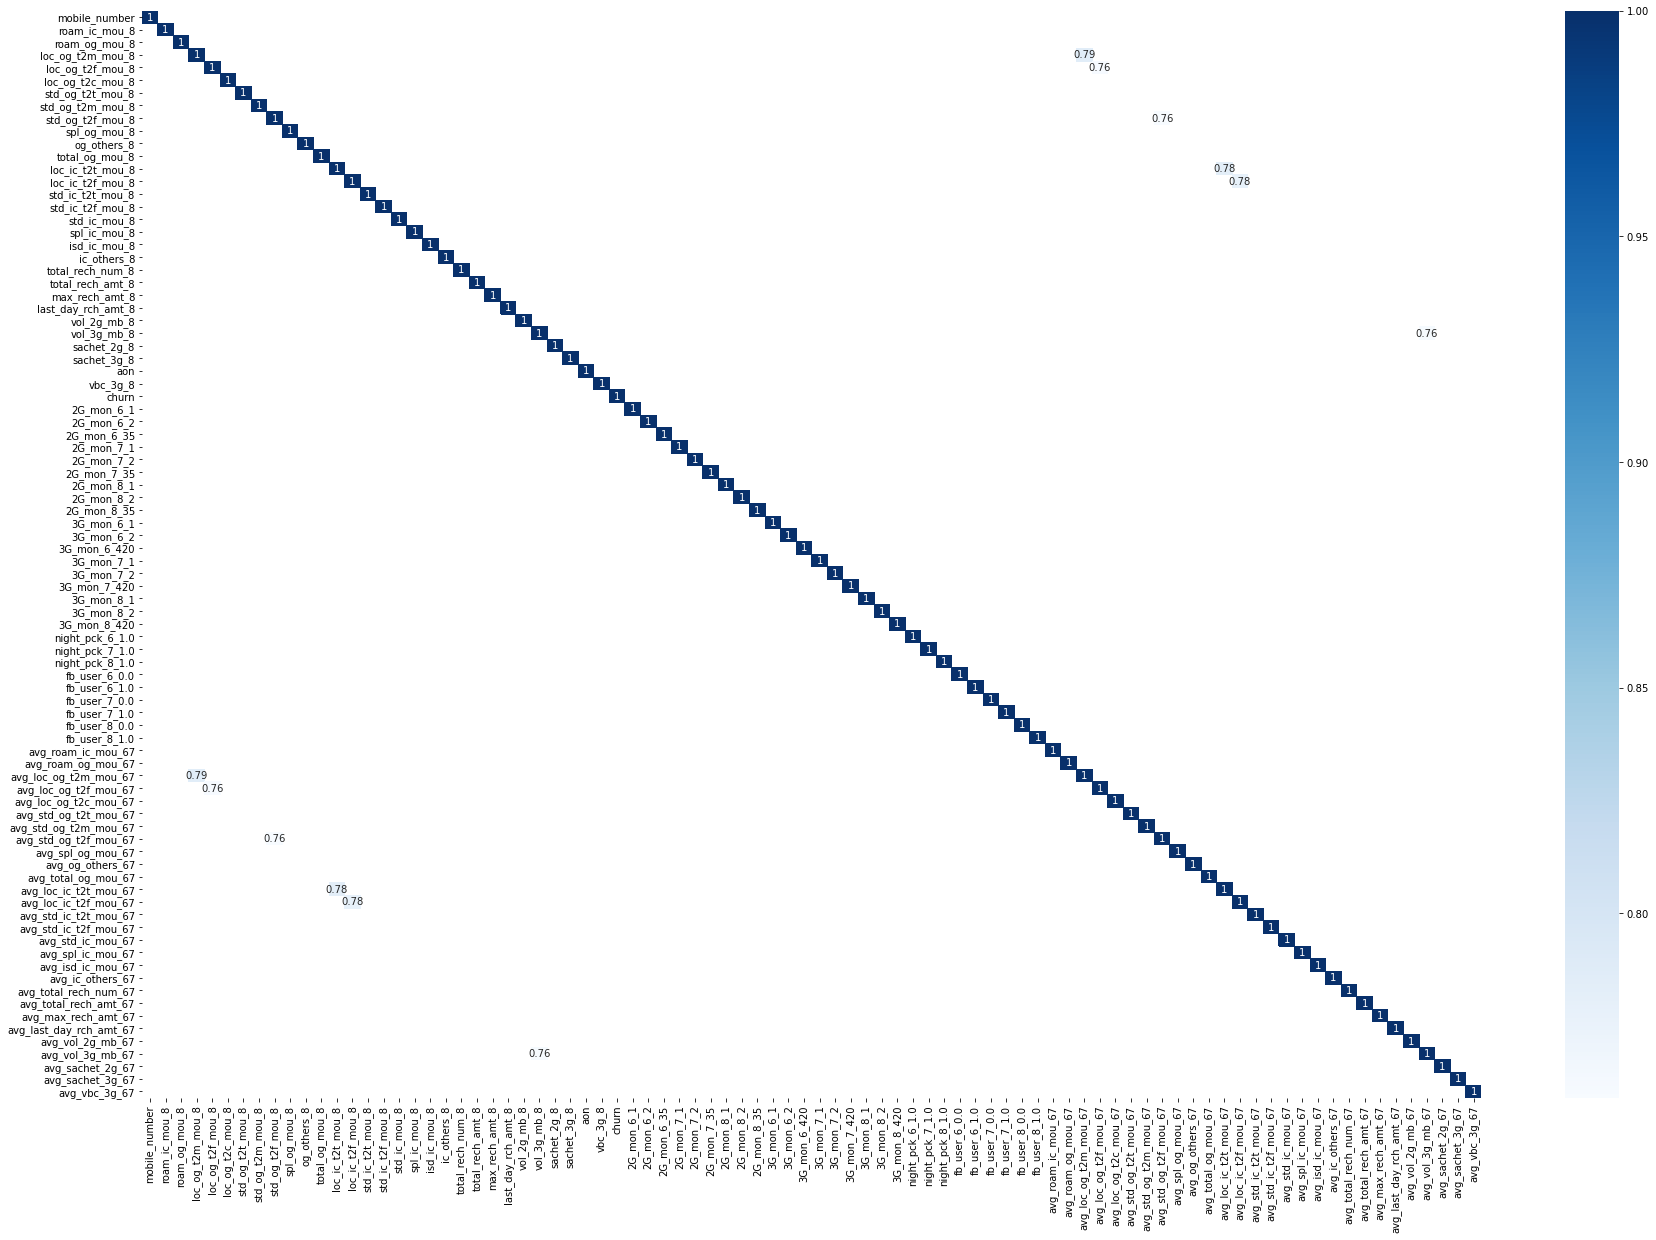

In [107]:
# Heatmap of highly correlated columns
plt.figure(figsize = (30, 20))
sns.heatmap(highvalued_customers.corr()[(highvalued_customers.corr() >= 0.75) | (highvalued_customers.corr() <= -0.75)], annot = True, cmap = 'Blues')
plt.show()

**`All highly correlated features above 0.8 have been removed, data is ready for splitting and scaling`**

In [108]:
highvalued_customers.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30011 entries, 7 to 99997
Data columns (total 86 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mobile_number            30011 non-null  int64  
 1   roam_ic_mou_8            30011 non-null  float64
 2   roam_og_mou_8            30011 non-null  float64
 3   loc_og_t2m_mou_8         30011 non-null  float64
 4   loc_og_t2f_mou_8         30011 non-null  float64
 5   loc_og_t2c_mou_8         30011 non-null  float64
 6   std_og_t2t_mou_8         30011 non-null  float64
 7   std_og_t2m_mou_8         30011 non-null  float64
 8   std_og_t2f_mou_8         30011 non-null  float64
 9   spl_og_mou_8             30011 non-null  float64
 10  og_others_8              30011 non-null  float64
 11  total_og_mou_8           30011 non-null  float64
 12  loc_ic_t2t_mou_8         30011 non-null  float64
 13  loc_ic_t2f_mou_8         30011 non-null  float64
 14  std_ic_t2t_mou_8      

## EDA

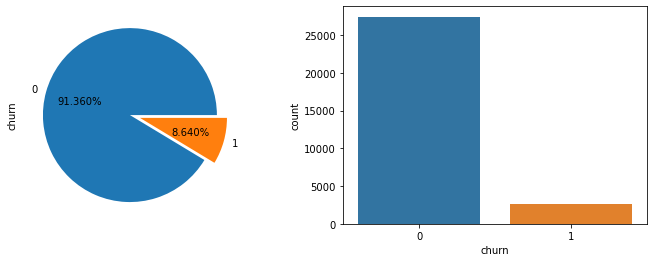

In [109]:
#Plotting Churn
f, ax = plt.subplots(1, 2, figsize = (12,4))
highvalued_customers.churn.value_counts().plot.pie(explode = [0,0.12], autopct = '%1.3f%%', ax = ax[0])
sns.countplot('churn',data = highvalued_customers )
plt.show()

**`It can be seen that the data is imbalanced with only 8.64% for churn customers. Data balancing is required`**

### Handling 'aon' age on network column

In [110]:
# Converting days to year
highvalued_customers['aon'] = highvalued_customers['aon']//365
highvalued_customers['aon']

7        2
8        0
13       7
16       1
17       1
        ..
99970    2
99974    8
99986    7
99988    0
99997    1
Name: aon, Length: 30011, dtype: int64

In [111]:
highvalued_customers['aon'].value_counts()

1     7628
0     4860
2     4663
3     3045
6     2072
4     1980
7     1828
8     1525
5     1253
9      572
10     557
11      28
Name: aon, dtype: int64

**`It can be seen that there are more customers who are new in the network and as the years increase, the count of customers decreases.`**

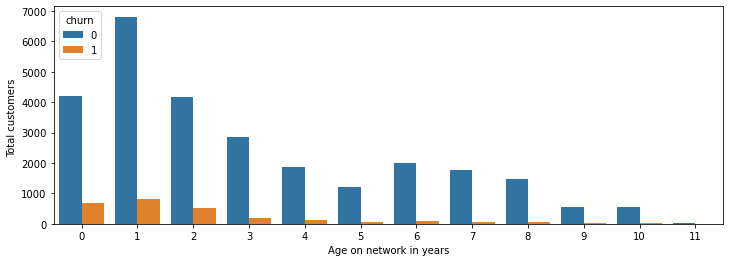

In [112]:
# Plotting Distribution
plt.figure(figsize = (12, 4))
sns.countplot( data = highvalued_customers, x = 'aon', hue = 'churn')
plt.xlabel("Age on network in years")
plt.ylabel("Total customers ")
plt.show()

**`From the above plot it can be inferred that customer are churning more in initial 3 years and as they age ie by 8-11 years the churn % is less`**

In [113]:
pd.crosstab(highvalued_customers['churn'], highvalued_customers['aon'])

aon,0,1,2,3,4,5,6,7,8,9,10,11
churn,,,,,,,,,,,,
0,4186,6809,4159,2848,1870,1202,1993,1755,1472,553,543,28
1,674,819,504,197,110,51,79,73,53,19,14,0


In [114]:
highvalued_customers.pivot_table(index='churn', columns='aon', aggfunc={'total_og_mou_8': 'mean'}, fill_value=0).round(2)

total_og_mou_8                                                          \
aon               0       1       2       3       4       5       6       7    
churn                                                                          
0             684.30  726.04  705.70  651.30  649.85  585.85  598.80  586.08   
1             190.37  246.49  233.64  236.66  220.89  169.56  241.27  305.67   

                                      
aon        8      9       10      11  
churn                                 
0      537.91  545.8  540.86  349.58  
1      149.09  204.8  211.91    0.00

In [115]:
highvalued_customers.groupby(['aon', 'churn'])[ 'avg_total_og_mou_67','total_og_mou_8', 'avg_total_rech_amt_67', 'total_rech_amt_8', 'vol_2g_mb_8', 'vol_3g_mb_8', 'avg_vol_2g_mb_67', 'avg_vol_3g_mb_67'].mean().round(2) 

avg_total_og_mou_67  total_og_mou_8  avg_total_rech_amt_67  \
aon churn                                                               
0   0                   726.26          684.30                 699.85   
    1                   756.87          190.37                 699.94   
1   0                   754.89          726.04                 694.87   
    1                   857.28          246.49                 739.00   
2   0                   745.36          705.70                 695.07   
    1                   775.92          233.64                 715.10   
3   0                   672.56          651.30                 693.40   
    1                   802.14          236.66                 739.36   
4   0                   675.87          649.85                 705.33   
    1                   809.13          220.89                 761.82   
5   0                   607.18          585.85                 693.61   
    1                   473.66          169.56                 669.83   
6   0                   617.66          598.80                 686.61   
    1                   570.13          241.27                 668.04   
7   0                   615.37          586.08                 681.12   
    1                   676.91          305.67                 738.47   
8   0                   559.26          537.91                 689.69   
    1                   369.93          149.09                 730.75   
9   0                   542.98          545.80                 675.50   
    1                   431.61          204.80                 740.71   
10  0                   564.34          540.86                 705.57   
    1                   529.70          211.91                1052.21   
11  0                   382.44          349.58                 620.96   

           total_rech_amt_8  vol_2g_mb_8  vol_3g_mb_8  avg_vol_2g_mb_67  \
aon churn                                                                 
0   0                644.17        85.98       320.69             90.49   
    1                209.34        11.11        58.13             62.40   
1   0                646.72        83.49       281.04             88.76   
    1                251.38        15.36        75.10             56.59   
2   0                649.44        70.99       282.09             80.96   
    1                261.55        17.53        31.98             59.06   
3   0                640.94        71.55       271.58             79.30   
    1                269.24        18.71        33.83             43.71   
4   0                675.56        73.75       303.06             78.53   
    1                285.61        23.54        38.05             30.37   
5   0                644.31        61.01       359.91             74.13   
    1                355.65         9.19        40.73             24.71   
6   0                653.25        75.28       275.22             75.83   
    1                369.35         4.25        56.10             56.23   
7   0                629.71        65.54       299.84             73.63   
    1                393.68        17.03        58.59             48.50   
8   0                637.35        51.73       268.13             59.92   
    1                303.08        11.84        41.66             41.73   
9   0                651.52        51.08       253.62             60.32   
    1                485.00        82.96       270.66             28.51   
10  0                662.10        51.82       244.22             51.87   
    1                471.29        14.34       102.09             19.92   
11  0                553.39        40.24       262.67             76.10   

           avg_vol_3g_mb_67  
aon churn                    
0   0                310.69  
    1                176.65  
1   0                272.70  
    1                189.59  
2   0                265.53  
    1                131.28  
3   0                272.42  
    1                155.51  
4   0    

In [116]:
col_8 = ['avg_roam_ic_mou_67','roam_ic_mou_8', 
        'avg_roam_og_mou_67','roam_og_mou_8',
        'avg_loc_og_t2m_mou_67',  'loc_og_t2m_mou_8',
        'avg_loc_og_t2f_mou_67', 'loc_og_t2f_mou_8',
        'avg_loc_og_t2c_mou_67', 'loc_og_t2c_mou_8', 
        'avg_std_og_t2t_mou_67', 'std_og_t2t_mou_8', 
        'avg_std_og_t2m_mou_67', 'std_og_t2m_mou_8', 
        'avg_std_og_t2f_mou_67',  'std_og_t2f_mou_8',
        'avg_spl_og_mou_67',  'spl_og_mou_8', 
        'avg_og_others_67', 'og_others_8', 
        'avg_total_og_mou_67', 'total_og_mou_8',
        'avg_loc_ic_t2t_mou_67',  'loc_ic_t2t_mou_8', 
        'avg_loc_ic_t2f_mou_67',  'loc_ic_t2f_mou_8', 
        'avg_std_ic_t2t_mou_67',  'std_ic_t2t_mou_8', 
        'avg_std_ic_t2f_mou_67', 'std_ic_t2f_mou_8', 
        'avg_std_ic_mou_67','std_ic_mou_8', 
        'avg_spl_ic_mou_67', 'spl_ic_mou_8', 
        'avg_isd_ic_mou_67', 'isd_ic_mou_8', 
        'avg_ic_others_67',  'ic_others_8', 
        'avg_total_rech_num_67','total_rech_num_8',
        'avg_total_rech_amt_67', 'total_rech_amt_8', 
        'avg_max_rech_amt_67',  'max_rech_amt_8', 
        'avg_last_day_rch_amt_67', 'last_day_rch_amt_8',
        'avg_vol_2g_mb_67',  'vol_2g_mb_8',
        'avg_vol_3g_mb_67','vol_3g_mb_8', 
         'avg_sachet_2g_67',  'sachet_2g_8', 
        'avg_sachet_3g_67', 'sachet_3g_8', 
        'avg_vbc_3g_67'  'vbc_3g_8',
 ]

In [117]:
def barplot(col_names):
    plt.figure(figsize=(15,65))
    for i in enumerate(col_names): 
        ax = plt.subplot(15, 2, i[0]+1)
        sns.barplot(data = highvalued_customers, x = 'aon', y = i[1], hue = 'churn',)
        
        plt.xticks(rotation = 20)
    return plt.show()

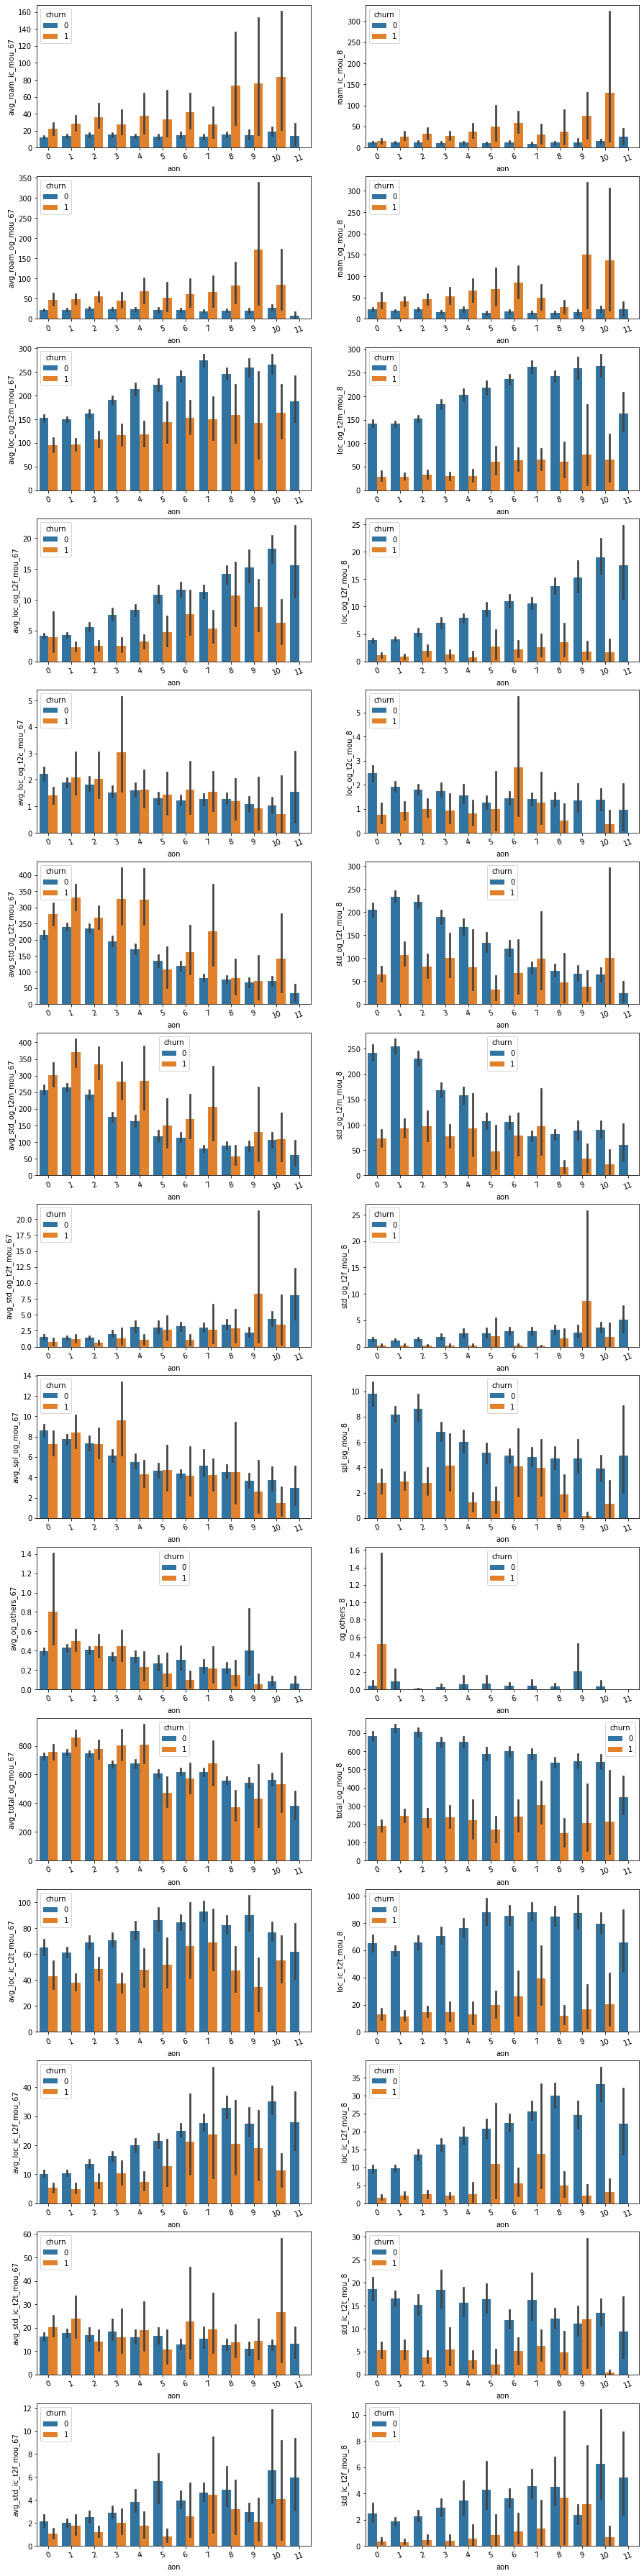

In [118]:
barplot(col_8[:30])

### Inferences from above plots

- roam_in, and roam_og more churn is seen in years 8, 9 & 10 year customers
- avg_loc_og_t2c customers of 3rd and 6th year are churning more
- avg_loc_og_t2t and avg_loc_og_t2m - higher churn is seen in initial year customers
- special_og offers are good they have considerably reduced churn and must continue


### Pie Chart

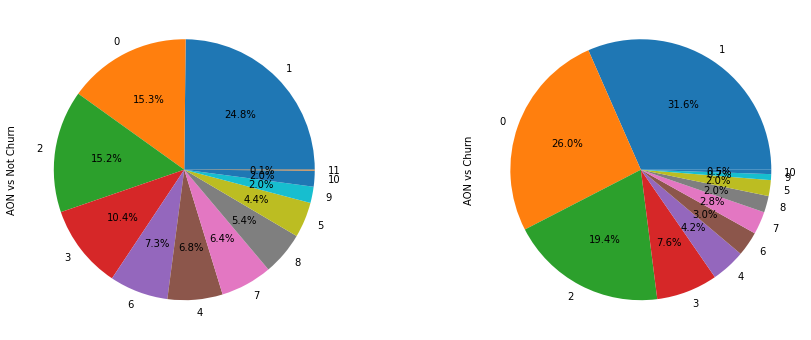

In [119]:
fig, axs = plt.subplots(1,2,figsize = (15,6))
highvalued_customers['aon'][highvalued_customers['churn'] == 0].value_counts().plot.pie(autopct='%1.1f%%' , ax = axs[0], label = 'AON vs Not Churn')
highvalued_customers['aon'][highvalued_customers['churn'] == 1].value_counts().plot.pie(autopct='%1.1f%%' , ax = axs[1], label = 'AON vs Churn')
plt.xticks(rotation = 45)
plt.show()

**`From the above pie chart it can be seen that higher number of customers who churn are in 1st to 3rd years`**

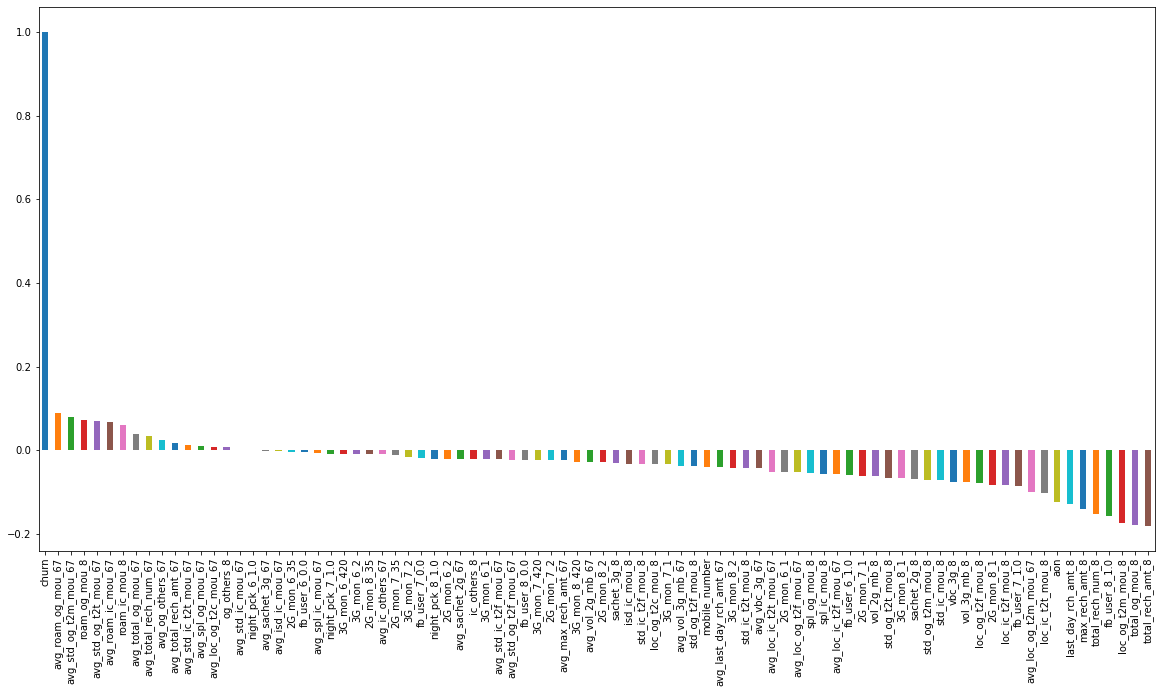

In [120]:
#Get Correlation of "Churn" with other variables:
plt.figure(figsize=(20,10))
highvalued_customers.corr()['churn'].sort_values(ascending = False).plot(kind='bar', color=['C0','C1', 'C2','C3','C4', 'C5','C6','C7', 'C8', 'C9'])
plt.show()

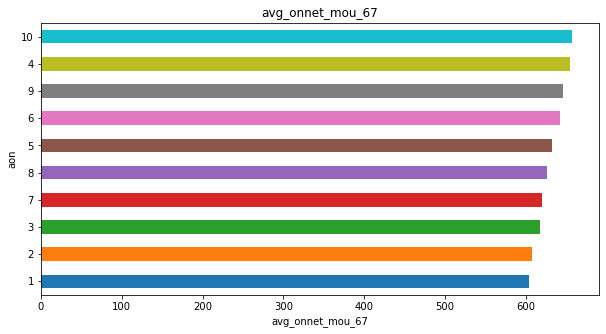

In [121]:
highvalued_customers.groupby('aon')['total_rech_amt_8'].mean().sort_values(ascending = True)[-10:].plot.barh(color=['C0','C1', 'C2','C3','C4', 'C5','C6','C7', 'C8', 'C9'], figsize = (10, 5))
plt.xlabel("avg_onnet_mou_67")
plt.title("avg_onnet_mou_67")
plt.show()

**`It can be inferred that during the initial years people are reluctant to go for higher recharges, older customers of network are on top of average recharge list, company should give offers to lure the new customers so that they buy higher value plans`**

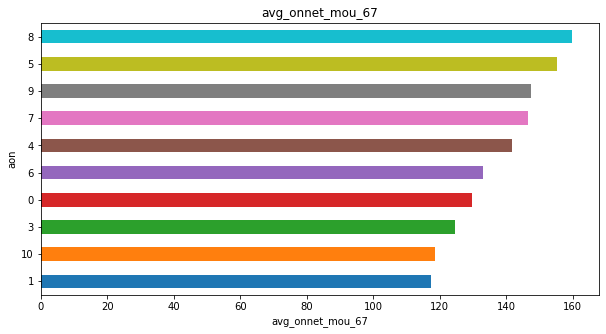

In [122]:
highvalued_customers.groupby('aon')['avg_vbc_3g_67'].mean().sort_values(ascending = True)[-10:].plot.barh(color=['C0','C1', 'C2','C3','C4', 'C5','C6','C7', 'C8', 'C9'], figsize = (10, 5))
plt.xlabel("avg_onnet_mou_67")
plt.title("avg_onnet_mou_67")
plt.show()

**`It can be inferred that new customers of network who are in range of 3 years are less users of data, and one other observation is 10th year customers are comparitively lower users of data, company should give more offers to these customers as they are part of network for long years and are major revenue generators.`**

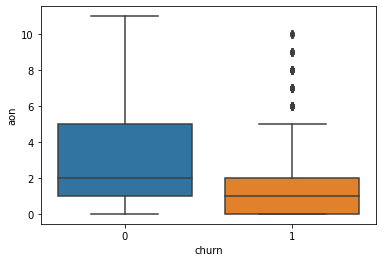

In [123]:
# Boxplot of churn
sns.boxplot(x = highvalued_customers['churn'], y = highvalued_customers['aon'])
plt.show()

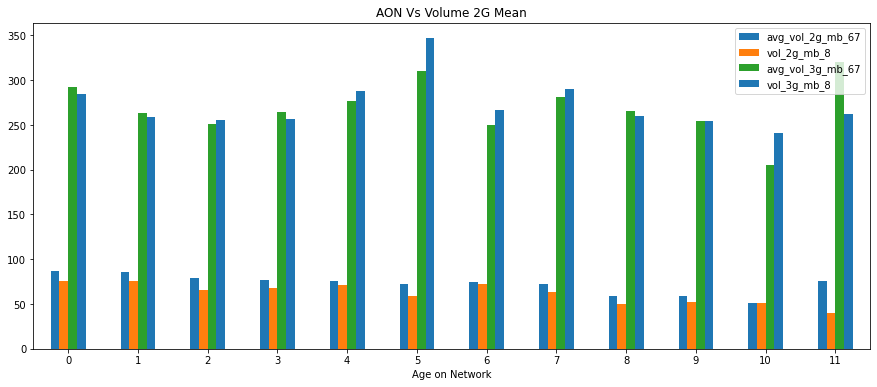

In [124]:
# Groupby Plot

highvalued_customers.groupby(['aon'])[ 'avg_vol_2g_mb_67' , 'vol_2g_mb_8', 'avg_vol_3g_mb_67' , 'vol_3g_mb_8'].mean().plot.bar(color=['C0', 'C1', 'C2'],  figsize = (15, 6))
plt.xlabel("Age on Network")
plt.title("AON Vs Volume 2G Mean")
plt.xticks(rotation = 0)
plt.show()

**`It can be observed that volume of 2g data decreased from July to August and Usage of 3g increased in August`**

**`There are more 3g data consumption as compared to  2g data`**

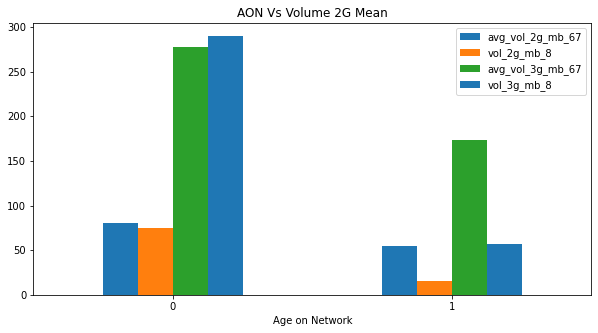

In [125]:
# Groupby Plot
highvalued_customers.groupby(['churn'])[ 'avg_vol_2g_mb_67' , 'vol_2g_mb_8','avg_vol_3g_mb_67' , 'vol_3g_mb_8'].mean().plot.bar(color=['C0', 'C1', 'C2'],  figsize = (10, 5))
plt.xlabel("Age on Network")
plt.title("AON Vs Volume 2G Mean")
plt.xticks(rotation = 0)
plt.show()


**`It can be observed that non churn customers continue using the data at almost same amount as previous month but the customers who churn reduce their data usage, so company should focus on those customers who decrease their data usage and give them offers so that they do not churn`**

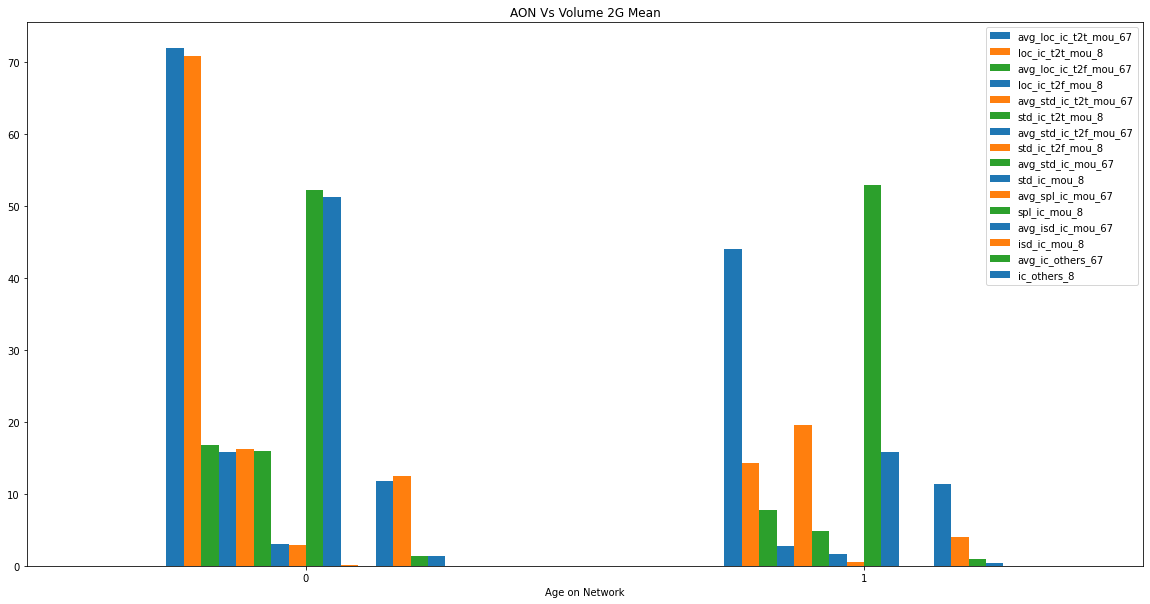

In [126]:
# Groupby Plot
highvalued_customers.groupby(['churn'])[ 'avg_loc_ic_t2t_mou_67',  'loc_ic_t2t_mou_8', 
        'avg_loc_ic_t2f_mou_67',  'loc_ic_t2f_mou_8', 
        'avg_std_ic_t2t_mou_67',  'std_ic_t2t_mou_8', 
        'avg_std_ic_t2f_mou_67', 'std_ic_t2f_mou_8', 
        'avg_std_ic_mou_67','std_ic_mou_8', 
        'avg_spl_ic_mou_67', 'spl_ic_mou_8', 
        'avg_isd_ic_mou_67', 'isd_ic_mou_8', 
        'avg_ic_others_67',  'ic_others_8',].mean().plot.bar(color=['C0', 'C1', 'C2'],  figsize = (20, 10))
plt.xlabel("Age on Network")
plt.title("AON Vs Volume 2G Mean")
plt.xticks(rotation = 0)
plt.show()

**`Customer usage of network is greatly reduced for those customers who are going to churn, it is observed from the above plot, these customers should be given better offers and must be prevented from churning`**

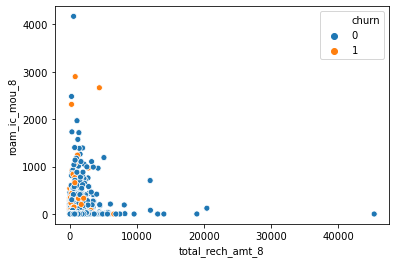

In [127]:
sns.scatterplot(x= 'total_rech_amt_8', y = 'roam_ic_mou_8', data =  highvalued_customers, hue = 'churn') 

**`Since the churn data is very less not much can be inferred, presence of outliers is observed`**

## Splitting the Data

In [128]:
X = highvalued_customers.drop([ 'churn'], axis=1)
y = highvalued_customers['churn']
print(X.shape, y.shape)

(30011, 85) (30011,)


In [129]:
from sklearn.model_selection import train_test_split

In [130]:
X_train_1,  X_test_1, y_train, y_test = train_test_split(X, y, train_size = 0.7, random_state = 42, stratify = y )
print(X_train_1.shape, y_train.shape, X_test_1.shape, y_test.shape)

(21007, 85) (21007,) (9004, 85) (9004,)


In [131]:
print(X_train_1.shape, y_train.shape)

(21007, 85) (21007,)


In [132]:
print(X_test_1.shape, y_test.shape)

(9004, 85) (9004,)


In [133]:
y_train.value_counts(normalize = True)* 100

0    91.360023
1     8.639977
Name: churn, dtype: float64

In [134]:
y_test.value_counts(normalize = True)* 100

0    91.359396
1     8.640604
Name: churn, dtype: float64

In [135]:
X_train = X_train_1.drop(['mobile_number'], axis = 1)
X_test = X_test_1.drop(['mobile_number'], axis = 1)

In [136]:
X_train.head()

,roam_ic_mou_8,roam_og_mou_8,loc_og_t2m_mou_8,loc_og_t2f_mou_8,loc_og_t2c_mou_8,std_og_t2t_mou_8,std_og_t2m_mou_8,std_og_t2f_mou_8,spl_og_mou_8,og_others_8,total_og_mou_8,loc_ic_t2t_mou_8,loc_ic_t2f_mou_8,std_ic_t2t_mou_8,std_ic_t2f_mou_8,std_ic_mou_8,spl_ic_mou_8,isd_ic_mou_8,ic_others_8,total_rech_num_8,total_rech_amt_8,max_rech_amt_8,last_day_rch_amt_8,vol_2g_mb_8,vol_3g_mb_8,sachet_2g_8,sachet_3g_8,aon,vbc_3g_8,2G_mon_6_1,2G_mon_6_2,2G_mon_6_35,2G_mon_7_1,2G_mon_7_2,2G_mon_7_35,2G_mon_8_1,2G_mon_8_2,2G_mon_8_35,3G_mon_6_1,3G_mon_6_2,3G_mon_6_420,3G_mon_7_1,3G_mon_7_2,3G_mon_7_420,3G_mon_8_1,3G_mon_8_2,3G_mon_8_420,night_pck_6_1.0,night_pck_7_1.0,night_pck_8_1.0,fb_user_6_0.0,fb_user_6_1.0,fb_user_7_0.0,fb_user_7_1.0,fb_user_8_0.0,fb_user_8_1.0,avg_roam_ic_mou_67,avg_roam_og_mou_67,avg_loc_og_t2m_mou_67,avg_loc_og_t2f_mou_67,avg_loc_og_t2c_mou_67,avg_std_og_t2t_mou_67,avg_std_og_t2m_mou_67,avg_std_og_t2f_mou_67,avg_spl_og_mou_67,avg_og_others_67,avg_total_og_mou_67,avg_loc_ic_t2t_mou_67,avg_loc_ic_t2f_mou_67,avg_std_ic_t2t_mou_67,avg_std_ic_t2f_mou_67,avg_std_ic_mou_67,avg_spl_ic_mou_67,avg_isd_ic_mou_67,avg_ic_others_67,avg_total_rech_num_67,avg_total_rech_amt_67,avg_max_rech_amt_67,avg_last_day_rch_amt_67,avg_vol_2g_mb_67,avg_vol_3g_mb_67,avg_sachet_2g_67,avg_sachet_3g_67,avg_vbc_3g_67
72509,0.0,6.25,21.13,12.73,0.66,204.61,820.13,0.93,13.48,0.0,1174.64,78.28,3.11,0.20,3.46,48.96,0.25,0.00,1.16,8,800,150,0,0.00,0.00,0,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.00,0.000,140.310,12.945,5.090,275.035,3415.195,3.055,9.050,2.43,3927.535,70.885,6.820,0.14,0.130,54.050,0.000,0.000,0.265,18.0,1967.5,120.0,120.0,0.0,0.0,0.0,0.0,0.000
64707,0.0,0.00,75.66,0.00,0.00,830.79,1049.31,0.00,34.44,0.0,2025.13,46.98,0.00,31.96,0.00,103.91,0.25,0.88,1.78,10,880,279,144,0.00,0.00,0,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.00,0.000,96.850,0.000,4.350,882.220,677.885,0.000,6.265,0.00,1687.525,132.400,4.560,13.48,0.215,36.520,0.395,0.245,1.770,8.5,720.0,199.0,169.5,0.0,0.0,0.0,0.0,0.000
10277,0.0,0.00,8.48,0.00,0.00,766.83,96.33,0.00,2.90,0.0,876.49,2.43,10.81,36.01,0.00,155.59,0.00,0.00,0.00,7,465,130,114,0.00,0.00,0,0,1,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.00,0.000,30.965,0.675,0.000,2139.335,49.735,0.000,0.000,0.00,2222.400,7.130,5.705,237.02,0.000,240.335,0.000,0.000,0.000,13.0,976.0,110.0,65.0,0.0,0.0,0.0,0.0,0.000
7862,0.0,0.00,53.79,21.01,0.00,45.86,25.59,0.00,0.13,0.0,174.56,40.49,18.98,1.94,13.48,40.26,0.00,0.00,0.00,7,177,144,0,0.00,0.00,0,0,6,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.00,0.000,113.485,38.370,0.000,46.150,43.190,2.065,1.185,0.24,296.930,139.305,32.355,5.27,5.610,69.255,0.000,0.325,0.000,6.5,410.5,253.5,64.0,0.0,0.0,0.0,0.0,0.000
54328,0.0,0.00,198.71,14.21,0.00,0.00,4.00,0.76,0.00,0.0,237.31,4.56,7.76,0.00,0.00,0.00,0.00,3.21,9.60,3,930,750,750,0.11,48.81,0,0,8,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,2.88,6.765,151.435,47.360,7.855,1.915,1.350,7.220,7.855,0.00,247.510,13.260,38.075,2.08,0.435,2.520,0.000,28.775,0.000,4.0,392.5,375.0,17.5,0.0,0.0,0.0,0.0,0.125


In [137]:
y_train.head()

72509    1
64707    0
10277    0
7862     0
54328    0
Name: churn, dtype: int32

In [138]:
train_cols = list(X_train.columns)
print(train_cols)

['roam_ic_mou_8', 'roam_og_mou_8', 'loc_og_t2m_mou_8', 'loc_og_t2f_mou_8', 'loc_og_t2c_mou_8', 'std_og_t2t_mou_8', 'std_og_t2m_mou_8', 'std_og_t2f_mou_8', 'spl_og_mou_8', 'og_others_8', 'total_og_mou_8', 'loc_ic_t2t_mou_8', 'loc_ic_t2f_mou_8', 'std_ic_t2t_mou_8', 'std_ic_t2f_mou_8', 'std_ic_mou_8', 'spl_ic_mou_8', 'isd_ic_mou_8', 'ic_others_8', 'total_rech_num_8', 'total_rech_amt_8', 'max_rech_amt_8', 'last_day_rch_amt_8', 'vol_2g_mb_8', 'vol_3g_mb_8', 'sachet_2g_8', 'sachet_3g_8', 'aon', 'vbc_3g_8', '2G_mon_6_1', '2G_mon_6_2', '2G_mon_6_35', '2G_mon_7_1', '2G_mon_7_2', '2G_mon_7_35', '2G_mon_8_1', '2G_mon_8_2', '2G_mon_8_35', '3G_mon_6_1', '3G_mon_6_2', '3G_mon_6_420', '3G_mon_7_1', '3G_mon_7_2', '3G_mon_7_420', '3G_mon_8_1', '3G_mon_8_2', '3G_mon_8_420', 'night_pck_6_1.0', 'night_pck_7_1.0', 'night_pck_8_1.0', 'fb_user_6_0.0', 'fb_user_6_1.0', 'fb_user_7_0.0', 'fb_user_7_1.0', 'fb_user_8_0.0', 'fb_user_8_1.0', 'avg_roam_ic_mou_67', 'avg_roam_og_mou_67', 'avg_loc_og_t2m_mou_67', 'avg_

In [139]:
# Selecting columns for plotting distribution
dist_cols = ['roam_ic_mou_8', 'roam_og_mou_8', 'loc_og_t2m_mou_8', 'loc_og_t2f_mou_8', 'loc_og_t2c_mou_8', 
             'std_og_t2t_mou_8', 'std_og_t2m_mou_8', 'std_og_t2f_mou_8', 'spl_og_mou_8', 'og_others_8', 
             'total_og_mou_8', 'loc_ic_t2t_mou_8',  'loc_ic_t2f_mou_8', 'std_ic_t2t_mou_8',
             'std_ic_t2f_mou_8', 'std_ic_mou_8', 'spl_ic_mou_8', 'isd_ic_mou_8', 'ic_others_8', 'total_rech_num_8',
             'total_rech_amt_8', 'max_rech_amt_8', 'last_day_rch_amt_8', 'vol_2g_mb_8', 'vol_3g_mb_8', 'sachet_2g_8',
             'sachet_3g_8',]


In [140]:
def distplot(col_names):
    plt.figure(figsize=(15,25))
    for i in enumerate(col_names): 
        ax = plt.subplot(10, 3, i[0]+1)
        sns.distplot(highvalued_customers[i[1]], bins = 15, axlabel = i[1].upper(), color = 'red', hist_kws={ "linewidth": 3,
                               "alpha": 1, "color": "lightgreen"})
        plt.xticks(rotation = 20)
    return plt.show()

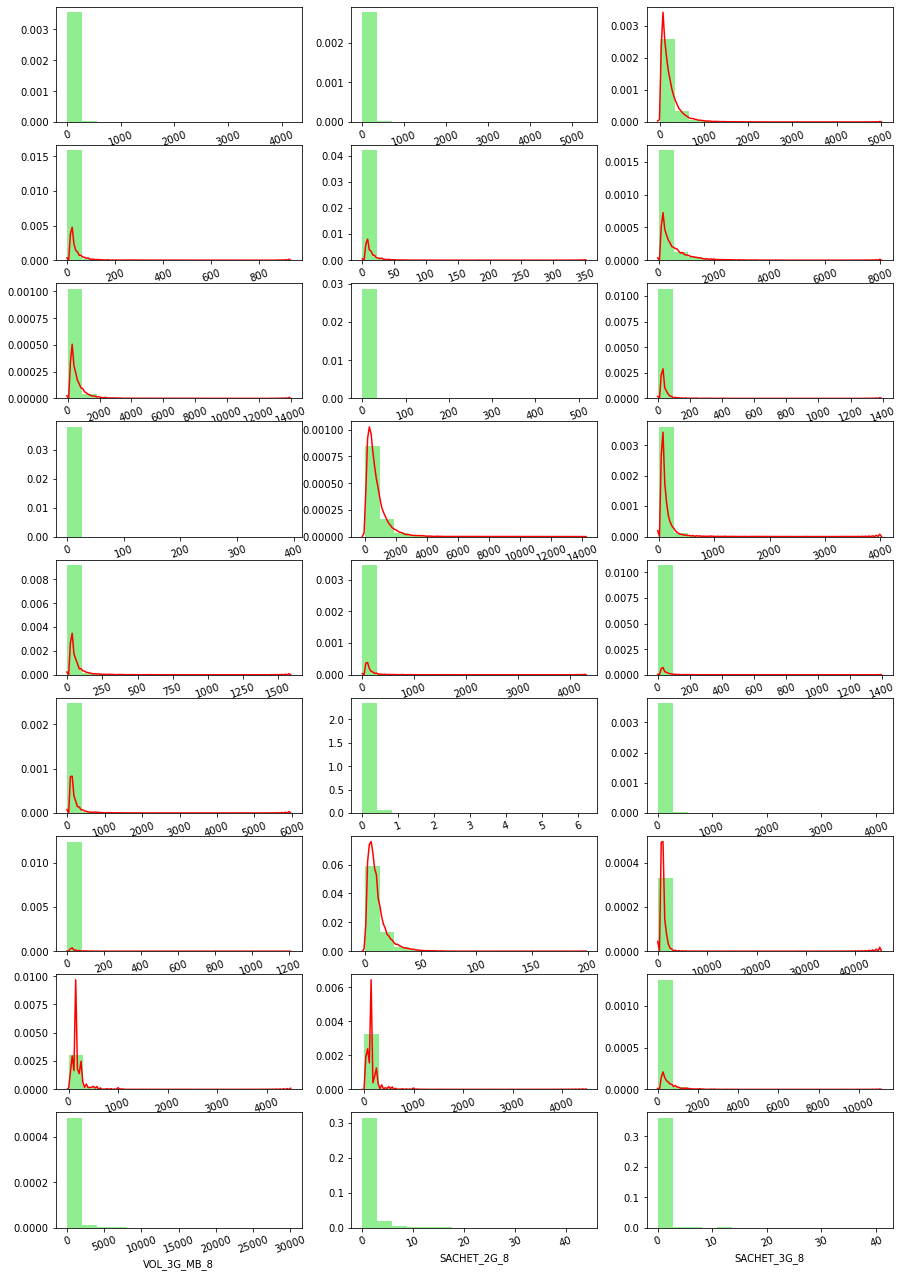

In [141]:
#Plotting Distplot
distplot(dist_cols)


**`It can be seen that all the columns are right skewed`**

In [142]:
# Checking Stats
X_train.describe([0.8, 0.9, 0.95, 0.98, 0.99]).T

,count,mean,std,min,50%,80%,90%,95%,98%,99%,max
roam_ic_mou_8,21007.0,13.325015,76.291680,0.0,0.000,0.000,19.400,64.0310,164.6680,288.2360,4169.810
roam_og_mou_8,21007.0,21.771912,105.349584,0.0,0.000,0.000,37.986,115.8750,270.3960,432.9654,3493.360
loc_og_t2m_mou_8,21007.0,168.386872,237.345802,0.0,90.530,267.738,416.480,585.6760,862.0484,1114.4108,4524.590
loc_og_t2f_mou_8,21007.0,6.487759,21.022432,0.0,0.140,6.980,16.784,31.0810,59.5388,87.2728,928.490
loc_og_t2c_mou_8,21007.0,1.784136,7.950683,0.0,0.000,0.750,4.580,9.7070,19.1180,29.2258,351.830
std_og_t2t_mou_8,21007.0,170.487662,402.020798,0.0,5.940,218.384,563.740,935.4850,1448.4324,1880.4222,7453.690
std_og_t2m_mou_8,21007.0,179.986303,413.421043,0.0,23.640,243.734,537.922,886.9800,1425.2976,1871.4012,13950.040
std_og_t2f_mou_8,21007.0,1.796267,11.786743,0.0,0.000,0.000,1.760,7.0010,20.9480,38.4570,445.310
spl_og_mou_8,21007.0,7.003041,23.554506,0.0,0.480,8.990,18.410,30.3810,51.6240,75.8078,1390.880
og_others_8,21007.0,0.075653,3.943803,0.0,0.000,0.000,0.000,0.0000,0.0000,0.0000,394.930


In [143]:
# Capping and visualizing Boxplot
def capping(df , col_names):
    for name in col_names:
        Q1 = df[name].quantile(0.01)
        Q3 = df[name].quantile(0.99)
        IQR = Q3 - Q1
    
        floor, ceil = Q1 - 1.5*IQR, Q3 + 1.5*IQR
        df[name] = df[ name].clip(floor, ceil).copy()
    
    return df.head()

In [144]:
# Selecting columns to be Capped
cap_cols= ['roam_ic_mou_8', 'roam_og_mou_8', 'loc_og_t2m_mou_8', 'loc_og_t2f_mou_8', 'loc_og_t2c_mou_8', 
           'std_og_t2t_mou_8', 'std_og_t2m_mou_8', 'std_og_t2f_mou_8', 'spl_og_mou_8', 'og_others_8', 'total_og_mou_8',
           'loc_ic_t2t_mou_8',  'loc_ic_t2f_mou_8', 'std_ic_t2t_mou_8', 'std_ic_t2f_mou_8', 
           'std_ic_mou_8', 'spl_ic_mou_8', 'isd_ic_mou_8', 'ic_others_8', 'total_rech_num_8', 'total_rech_amt_8', 
           'max_rech_amt_8', 'last_day_rch_amt_8', 'vol_2g_mb_8', 'vol_3g_mb_8', 'sachet_2g_8', 'sachet_3g_8', 
           'vbc_3g_8', 'avg_roam_ic_mou_67', 'avg_roam_og_mou_67', 'avg_loc_og_t2m_mou_67', 'avg_loc_og_t2f_mou_67', 
           'avg_loc_og_t2c_mou_67', 'avg_std_og_t2t_mou_67', 'avg_std_og_t2m_mou_67', 'avg_std_og_t2f_mou_67', 
           'avg_spl_og_mou_67', 'avg_og_others_67', 'avg_total_og_mou_67', 'avg_loc_ic_t2t_mou_67', 
            'avg_loc_ic_t2f_mou_67', 'avg_std_ic_t2t_mou_67', 'avg_std_ic_t2f_mou_67', 'avg_std_ic_mou_67',
           'avg_spl_ic_mou_67', 'avg_isd_ic_mou_67', 'avg_ic_others_67', 'avg_total_rech_num_67', 'avg_total_rech_amt_67',
           'avg_max_rech_amt_67', 'avg_last_day_rch_amt_67', 'avg_vol_2g_mb_67', 'avg_vol_3g_mb_67', 'avg_sachet_2g_67',
           'avg_sachet_3g_67', 'avg_vbc_3g_67']

len(cap_cols)

56

In [145]:
capping(X_train, cap_cols)

,roam_ic_mou_8,roam_og_mou_8,loc_og_t2m_mou_8,loc_og_t2f_mou_8,loc_og_t2c_mou_8,std_og_t2t_mou_8,std_og_t2m_mou_8,std_og_t2f_mou_8,spl_og_mou_8,og_others_8,total_og_mou_8,loc_ic_t2t_mou_8,loc_ic_t2f_mou_8,std_ic_t2t_mou_8,std_ic_t2f_mou_8,std_ic_mou_8,spl_ic_mou_8,isd_ic_mou_8,ic_others_8,total_rech_num_8,total_rech_amt_8,max_rech_amt_8,last_day_rch_amt_8,vol_2g_mb_8,vol_3g_mb_8,sachet_2g_8,sachet_3g_8,aon,vbc_3g_8,2G_mon_6_1,2G_mon_6_2,2G_mon_6_35,2G_mon_7_1,2G_mon_7_2,2G_mon_7_35,2G_mon_8_1,2G_mon_8_2,2G_mon_8_35,3G_mon_6_1,3G_mon_6_2,3G_mon_6_420,3G_mon_7_1,3G_mon_7_2,3G_mon_7_420,3G_mon_8_1,3G_mon_8_2,3G_mon_8_420,night_pck_6_1.0,night_pck_7_1.0,night_pck_8_1.0,fb_user_6_0.0,fb_user_6_1.0,fb_user_7_0.0,fb_user_7_1.0,fb_user_8_0.0,fb_user_8_1.0,avg_roam_ic_mou_67,avg_roam_og_mou_67,avg_loc_og_t2m_mou_67,avg_loc_og_t2f_mou_67,avg_loc_og_t2c_mou_67,avg_std_og_t2t_mou_67,avg_std_og_t2m_mou_67,avg_std_og_t2f_mou_67,avg_spl_og_mou_67,avg_og_others_67,avg_total_og_mou_67,avg_loc_ic_t2t_mou_67,avg_loc_ic_t2f_mou_67,avg_std_ic_t2t_mou_67,avg_std_ic_t2f_mou_67,avg_std_ic_mou_67,avg_spl_ic_mou_67,avg_isd_ic_mou_67,avg_ic_others_67,avg_total_rech_num_67,avg_total_rech_amt_67,avg_max_rech_amt_67,avg_last_day_rch_amt_67,avg_vol_2g_mb_67,avg_vol_3g_mb_67,avg_sachet_2g_67,avg_sachet_3g_67,avg_vbc_3g_67
72509,0.0,6.25,21.13,12.73,0.66,204.61,820.13,0.93,13.48,0.0,1174.64,78.28,3.11,0.20,3.46,48.96,0.25,0.00,1.16,8,800.0,150,0.0,0.00,0.00,0.0,0.0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.00,0.000,140.310,12.945,5.090,275.035,3415.195,3.055,9.050,2.43,3927.535,70.885,6.820,0.14,0.130,54.050,0.000,0.000,0.265,18.0,1967.5,120.0,120.0,0.0,0.0,0.0,0.0,0.000
64707,0.0,0.00,75.66,0.00,0.00,830.79,1049.31,0.00,34.44,0.0,2025.13,46.98,0.00,31.96,0.00,103.91,0.25,0.88,1.78,10,880.0,279,144.0,0.00,0.00,0.0,0.0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.00,0.000,96.850,0.000,4.350,882.220,677.885,0.000,6.265,0.00,1687.525,132.400,4.560,13.48,0.215,36.520,0.395,0.245,1.770,8.5,720.0,199.0,169.5,0.0,0.0,0.0,0.0,0.000
10277,0.0,0.00,8.48,0.00,0.00,766.83,96.33,0.00,2.90,0.0,876.49,2.43,10.81,36.01,0.00,155.59,0.00,0.00,0.00,7,465.0,130,114.0,0.00,0.00,0.0,0.0,1,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.00,0.000,30.965,0.675,0.000,2139.335,49.735,0.000,0.000,0.00,2222.400,7.130,5.705,237.02,0.000,240.335,0.000,0.000,0.000,13.0,976.0,110.0,65.0,0.0,0.0,0.0,0.0,0.000
7862,0.0,0.00,53.79,21.01,0.00,45.86,25.59,0.00,0.13,0.0,174.56,40.49,18.98,1.94,13.48,40.26,0.00,0.00,0.00,7,177.0,144,0.0,0.00,0.00,0.0,0.0,6,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.00,0.000,113.485,38.370,0.000,46.150,43.190,2.065,1.185,0.24,296.930,139.305,32.355,5.27,5.610,69.255,0.000,0.325,0.000,6.5,410.5,253.5,64.0,0.0,0.0,0.0,0.0,0.000
54328,0.0,0.00,198.71,14.21,0.00,0.00,4.00,0.76,0.00,0.0,237.31,4.56,7.76,0.00,0.00,0.00,0.00,3.21,9.60,3,930.0,750,750.0,0.11,48.81,0.0,0.0,8,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,2.88,6.765,151.435,47.360,7.855,1.915,1.350,7.220,7.855,0.00,247.510,13.260,38.075,2.08,0.435,2.520,0.000,28.775,0.000,4.0,392.5,375.0,17.5,0.0,0.0,0.0,0.0,0.125


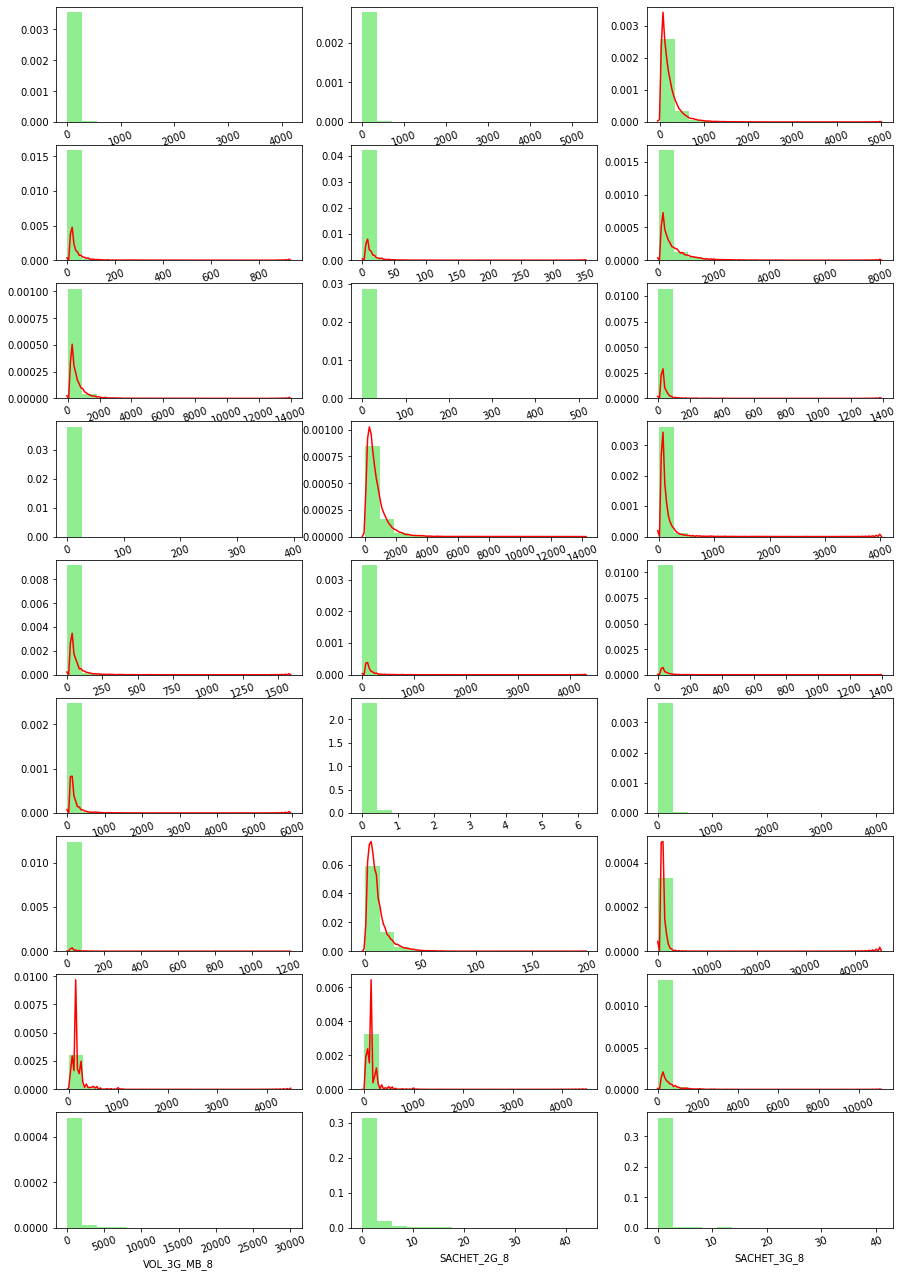

In [146]:
distplot(dist_cols)

In [147]:
# Rechecking Stats
X_train.describe([0.8, 0.9, 0.95, 0.98, 0.99]).T

,count,mean,std,min,50%,80%,90%,95%,98%,99%,max
roam_ic_mou_8,21007.0,12.401835,56.240957,0.0,0.000,0.000,19.400,64.0310,164.6680,288.2360,720.59000
roam_og_mou_8,21007.0,20.744853,89.118012,0.0,0.000,0.000,37.986,115.8750,270.3960,432.9654,1082.41350
loc_og_t2m_mou_8,21007.0,168.205212,234.909819,0.0,90.530,267.738,416.480,585.6760,862.0484,1114.4108,2786.02700
loc_og_t2f_mou_8,21007.0,6.312930,17.623530,0.0,0.140,6.980,16.784,31.0810,59.5388,87.2728,218.18200
loc_og_t2c_mou_8,21007.0,1.683300,5.906354,0.0,0.000,0.750,4.580,9.7070,19.1180,29.2258,73.06450
std_og_t2t_mou_8,21007.0,170.027374,395.748325,0.0,5.940,218.384,563.740,935.4850,1448.4324,1880.4222,4701.05550
std_og_t2m_mou_8,21007.0,179.020012,396.588059,0.0,23.640,243.734,537.922,886.9800,1425.2976,1871.4012,4678.50300
std_og_t2f_mou_8,21007.0,1.577496,8.037075,0.0,0.000,0.000,1.760,7.0010,20.9480,38.4570,96.14250
spl_og_mou_8,21007.0,6.637069,16.627947,0.0,0.480,8.990,18.410,30.3810,51.6240,75.8078,189.51950
og_others_8,21007.0,0.000000,0.000000,0.0,0.000,0.000,0.000,0.0000,0.0000,0.0000,0.00000


In [148]:
# Capping Test DataSet
capping(X_test , cap_cols)

,roam_ic_mou_8,roam_og_mou_8,loc_og_t2m_mou_8,loc_og_t2f_mou_8,loc_og_t2c_mou_8,std_og_t2t_mou_8,std_og_t2m_mou_8,std_og_t2f_mou_8,spl_og_mou_8,og_others_8,total_og_mou_8,loc_ic_t2t_mou_8,loc_ic_t2f_mou_8,std_ic_t2t_mou_8,std_ic_t2f_mou_8,std_ic_mou_8,spl_ic_mou_8,isd_ic_mou_8,ic_others_8,total_rech_num_8,total_rech_amt_8,max_rech_amt_8,last_day_rch_amt_8,vol_2g_mb_8,vol_3g_mb_8,sachet_2g_8,sachet_3g_8,aon,vbc_3g_8,2G_mon_6_1,2G_mon_6_2,2G_mon_6_35,2G_mon_7_1,2G_mon_7_2,2G_mon_7_35,2G_mon_8_1,2G_mon_8_2,2G_mon_8_35,3G_mon_6_1,3G_mon_6_2,3G_mon_6_420,3G_mon_7_1,3G_mon_7_2,3G_mon_7_420,3G_mon_8_1,3G_mon_8_2,3G_mon_8_420,night_pck_6_1.0,night_pck_7_1.0,night_pck_8_1.0,fb_user_6_0.0,fb_user_6_1.0,fb_user_7_0.0,fb_user_7_1.0,fb_user_8_0.0,fb_user_8_1.0,avg_roam_ic_mou_67,avg_roam_og_mou_67,avg_loc_og_t2m_mou_67,avg_loc_og_t2f_mou_67,avg_loc_og_t2c_mou_67,avg_std_og_t2t_mou_67,avg_std_og_t2m_mou_67,avg_std_og_t2f_mou_67,avg_spl_og_mou_67,avg_og_others_67,avg_total_og_mou_67,avg_loc_ic_t2t_mou_67,avg_loc_ic_t2f_mou_67,avg_std_ic_t2t_mou_67,avg_std_ic_t2f_mou_67,avg_std_ic_mou_67,avg_spl_ic_mou_67,avg_isd_ic_mou_67,avg_ic_others_67,avg_total_rech_num_67,avg_total_rech_amt_67,avg_max_rech_amt_67,avg_last_day_rch_amt_67,avg_vol_2g_mb_67,avg_vol_3g_mb_67,avg_sachet_2g_67,avg_sachet_3g_67,avg_vbc_3g_67
52088,0.00,0.00,320.04,38.49,6.8,4.88,92.49,0.0,16.88,0.0,502.48,82.88,54.08,9.31,0.0,29.89,0.0,0.0,0.0,5.0,852.0,252.0,150,26.12,764.78,0,0.0,8,434.23,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,1,0,1,0,1,0.000,0.00,268.380,52.985,0.000,0.000,66.590,0.0,0.655,0.0,408.505,55.150,30.085,11.835,1.33,37.310,0.00,0.0,0.0,7.5,822.0,252.0,130.0,62.585,950.175,0.0,0.0,869.890
59498,0.00,0.00,22.49,0.00,0.0,0.00,601.61,0.0,0.00,0.0,624.11,2.64,0.00,0.00,0.0,77.21,0.0,0.0,0.0,8.0,406.0,130.0,130,0.00,0.00,0,0.0,0,0.00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6.995,39.33,18.040,2.105,1.305,2.865,515.780,0.0,1.305,0.0,540.110,1.195,0.965,0.000,0.00,156.290,0.18,0.0,0.0,15.0,430.0,100.0,15.0,0.000,0.000,0.0,0.0,0.000
20003,0.00,0.00,223.29,1.61,0.0,23.79,19.46,0.0,0.00,0.0,357.28,64.49,8.51,17.29,0.0,22.36,0.0,0.0,0.0,8.0,902.0,252.0,144,550.90,0.00,0,0.0,0,0.00,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0.000,0.00,121.530,2.735,0.000,2.440,99.485,0.0,0.000,0.0,284.505,39.435,2.890,17.795,0.00,31.425,0.00,0.0,0.0,5.5,496.0,154.0,154.0,0.000,28.955,0.0,0.0,0.000
74741,0.00,0.00,113.49,3.84,0.0,680.81,50.64,0.0,29.24,0.0,909.86,28.01,0.68,8.51,0.0,12.56,0.0,0.0,0.0,6.0,642.0,252.0,130,0.32,767.99,0,0.0,3,73.88,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0.000,0.00,117.785,0.550,8.180,763.735,25.245,0.0,22.020,0.0,984.835,47.420,1.615,18.845,0.00,28.570,0.00,0.0,0.0,11.5,886.5,181.0,159.5,15.175,141.740,0.0,0.0,108.265
55694,0.46,0.71,0.00,0.00,0.0,0.00,0.00,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.0,0.00,0.0,0.0,0.0,2.0,0.0,0.0,0,0.00,0.00,0,0.0,1,0.00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,9.845,15.59,90.670,0.000,0.000,491.960,118.155,0.0,5.395,0.0,737.620,10.660,0.000,6.145,0.00,39.025,0.00,0.0,0.0,17.5,551.0,110.0,80.0,0.000,0.000,0.0,0.0,0.000


### Scaling the Data

In [149]:
from sklearn.preprocessing import StandardScaler

In [150]:
scaler = StandardScaler()

In [151]:
# Selected columns for scaling
scale_col = ['roam_ic_mou_8', 'roam_og_mou_8', 'loc_og_t2m_mou_8', 'loc_og_t2f_mou_8', 'loc_og_t2c_mou_8', 
           'std_og_t2t_mou_8', 'std_og_t2m_mou_8', 'std_og_t2f_mou_8', 'spl_og_mou_8', 'og_others_8', 'total_og_mou_8',
           'loc_ic_t2t_mou_8',  'loc_ic_t2f_mou_8', 'std_ic_t2t_mou_8', 'std_ic_t2f_mou_8', 
           'std_ic_mou_8', 'spl_ic_mou_8', 'isd_ic_mou_8', 'ic_others_8', 'total_rech_num_8', 'total_rech_amt_8', 
           'max_rech_amt_8', 'last_day_rch_amt_8', 'vol_2g_mb_8', 'vol_3g_mb_8', 'sachet_2g_8', 'sachet_3g_8', 
           'vbc_3g_8', 'aon' ,'avg_roam_ic_mou_67', 'avg_roam_og_mou_67', 'avg_loc_og_t2m_mou_67', 'avg_loc_og_t2f_mou_67', 
           'avg_loc_og_t2c_mou_67', 'avg_std_og_t2t_mou_67', 'avg_std_og_t2m_mou_67', 'avg_std_og_t2f_mou_67', 
           'avg_spl_og_mou_67', 'avg_og_others_67', 'avg_total_og_mou_67', 'avg_loc_ic_t2t_mou_67', 
            'avg_loc_ic_t2f_mou_67', 'avg_std_ic_t2t_mou_67', 'avg_std_ic_t2f_mou_67', 'avg_std_ic_mou_67',
           'avg_spl_ic_mou_67', 'avg_isd_ic_mou_67', 'avg_ic_others_67', 'avg_total_rech_num_67', 'avg_total_rech_amt_67',
           'avg_max_rech_amt_67', 'avg_last_day_rch_amt_67', 'avg_vol_2g_mb_67', 'avg_vol_3g_mb_67', 'avg_sachet_2g_67',
           'avg_sachet_3g_67', 'avg_vbc_3g_67']


In [152]:
# Scaling train data
X_train[scale_col] = scaler.fit_transform(X_train[scale_col])
X_train.head()

,roam_ic_mou_8,roam_og_mou_8,loc_og_t2m_mou_8,loc_og_t2f_mou_8,loc_og_t2c_mou_8,std_og_t2t_mou_8,std_og_t2m_mou_8,std_og_t2f_mou_8,spl_og_mou_8,og_others_8,total_og_mou_8,loc_ic_t2t_mou_8,loc_ic_t2f_mou_8,std_ic_t2t_mou_8,std_ic_t2f_mou_8,std_ic_mou_8,spl_ic_mou_8,isd_ic_mou_8,ic_others_8,total_rech_num_8,total_rech_amt_8,max_rech_amt_8,last_day_rch_amt_8,vol_2g_mb_8,vol_3g_mb_8,sachet_2g_8,sachet_3g_8,aon,vbc_3g_8,2G_mon_6_1,2G_mon_6_2,2G_mon_6_35,2G_mon_7_1,2G_mon_7_2,2G_mon_7_35,2G_mon_8_1,2G_mon_8_2,2G_mon_8_35,3G_mon_6_1,3G_mon_6_2,3G_mon_6_420,3G_mon_7_1,3G_mon_7_2,3G_mon_7_420,3G_mon_8_1,3G_mon_8_2,3G_mon_8_420,night_pck_6_1.0,night_pck_7_1.0,night_pck_8_1.0,fb_user_6_0.0,fb_user_6_1.0,fb_user_7_0.0,fb_user_7_1.0,fb_user_8_0.0,fb_user_8_1.0,avg_roam_ic_mou_67,avg_roam_og_mou_67,avg_loc_og_t2m_mou_67,avg_loc_og_t2f_mou_67,avg_loc_og_t2c_mou_67,avg_std_og_t2t_mou_67,avg_std_og_t2m_mou_67,avg_std_og_t2f_mou_67,avg_spl_og_mou_67,avg_og_others_67,avg_total_og_mou_67,avg_loc_ic_t2t_mou_67,avg_loc_ic_t2f_mou_67,avg_std_ic_t2t_mou_67,avg_std_ic_t2f_mou_67,avg_std_ic_mou_67,avg_spl_ic_mou_67,avg_isd_ic_mou_67,avg_ic_others_67,avg_total_rech_num_67,avg_total_rech_amt_67,avg_max_rech_amt_67,avg_last_day_rch_amt_67,avg_vol_2g_mb_67,avg_vol_3g_mb_67,avg_sachet_2g_67,avg_sachet_3g_67,avg_vbc_3g_67
72509,-0.220518,-0.162652,-0.626107,0.364128,-0.173258,0.087387,1.616603,-0.080566,0.411542,0.0,0.815995,0.097428,-0.290002,-0.302255,0.120062,0.019960,2.017838,-0.202340,0.048811,-0.238921,0.372718,-0.079315,-0.717911,-0.280569,-0.342345,-0.336791,-0.183299,-1.091954,-0.342924,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-0.265844,-0.280686,-0.176730,0.326352,0.724868,0.223021,8.322185,0.149744,0.183882,2.043391,5.332112,0.016767,-0.222691,-0.335964,-0.235540,0.029397,-0.430909,-0.217384,-0.175142,0.691563,3.226402,-0.355421,0.140303,-0.322066,-0.367608,-0.333157,-0.20764,-0.354762
64707,-0.220518,-0.232785,-0.393970,-0.358219,-0.285005,1.669693,2.194495,-0.196282,1.672100,0.0,2.077848,-0.137274,-0.369421,0.409466,-0.229043,0.494462,2.017838,-0.184979,0.185685,-0.025537,0.531494,0.690300,0.372979,-0.280569,-0.342345,-0.336791,-0.183299,-1.091954,-0.342924,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-0.265844,-0.280686,-0.365955,-0.379034,0.570244,1.839087,1.223113,-0.216025,-0.014919,-0.338632,1.638224,0.489124,-0.278848,-0.035023,-0.227289,-0.126673,3.811522,-0.212378,0.194711,-0.406298,0.067874,0.164845,0.589062,-0.322066,-0.367608,-0.333157,-0.20764,-0.354762
10277,-0.220518,-0.232785,-0.679959,-0.358219,-0.285005,1.508072,-0.208508,-0.196282,-0.224752,0.0,0.373636,-0.471331,-0.093369,0.500223,-0.229043,0.940727,-0.246343,-0.202340,-0.207276,-0.345613,-0.292159,-0.198635,0.145710,-0.280569,-0.342345,-0.336791,-0.183299,-0.723076,-0.342924,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-0.265844,-0.280686,-0.652820,-0.342252,-0.338691,5.184987,-0.405961,-0.216025,-0.462132,-0.338632,2.520259,-0.472790,-0.250397,5.007886,-0.248158,1.687892,-0.430909,-0.217384,-0.240266,0.113741,0.716036,-0.421278,-0.358318,-0.322066,-0.367608,-0.333157,-0.20764,-0.354762
7862,-0.220518,-0.232785,-0.487072,0.833966,-0.285005,-0.313761,-0.386884,-0.196282,-0.391343,0.0,-0.667801,-0.185939,0.115267,-0.263262,1.131052,-0.055166,-0.246343,-0.202340,-0.207276,-0.345613,-0.863754,-0.115111,-0.717911,-0.280569,-0.342345,-0.336791,-0.183299,1.121314,-0.342924,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-0.265844,-0.280686,-0.293526,1.711786,-0.338691,-0.386173,-0.422936,0.031213,-0.377544,-0.103370,-0.654937,0.542145,0.411806,-0.220235,0.296372,0.164767,-0.430909,-0.210744,-0.240266,-0.637427,-0.715745,0.523764,-0.367384,-0.322066,-0.367608,-0.333157,-0.20764,-0.354762
54328,-0.220518,-0.232785,0.129861,0.448109,-0.285005,-0.429645,-0.441325,-0.101718,-0.399161,0.0,-0.574700,-0.455359,-0.171256,-0.306736,-0.229043,-0.402818,-0.246343,-0.139010,1.912065,-0.772382,0.630730,3.500291,4.963811,-0.280118,-0.279656,-0.336791,-0.183299,

In [153]:
# Scaling test data
X_test[scale_col] = scaler.transform(X_test[scale_col])
X_test.head()

,roam_ic_mou_8,roam_og_mou_8,loc_og_t2m_mou_8,loc_og_t2f_mou_8,loc_og_t2c_mou_8,std_og_t2t_mou_8,std_og_t2m_mou_8,std_og_t2f_mou_8,spl_og_mou_8,og_others_8,total_og_mou_8,loc_ic_t2t_mou_8,loc_ic_t2f_mou_8,std_ic_t2t_mou_8,std_ic_t2f_mou_8,std_ic_mou_8,spl_ic_mou_8,isd_ic_mou_8,ic_others_8,total_rech_num_8,total_rech_amt_8,max_rech_amt_8,last_day_rch_amt_8,vol_2g_mb_8,vol_3g_mb_8,sachet_2g_8,sachet_3g_8,aon,vbc_3g_8,2G_mon_6_1,2G_mon_6_2,2G_mon_6_35,2G_mon_7_1,2G_mon_7_2,2G_mon_7_35,2G_mon_8_1,2G_mon_8_2,2G_mon_8_35,3G_mon_6_1,3G_mon_6_2,3G_mon_6_420,3G_mon_7_1,3G_mon_7_2,3G_mon_7_420,3G_mon_8_1,3G_mon_8_2,3G_mon_8_420,night_pck_6_1.0,night_pck_7_1.0,night_pck_8_1.0,fb_user_6_0.0,fb_user_6_1.0,fb_user_7_0.0,fb_user_7_1.0,fb_user_8_0.0,fb_user_8_1.0,avg_roam_ic_mou_67,avg_roam_og_mou_67,avg_loc_og_t2m_mou_67,avg_loc_og_t2f_mou_67,avg_loc_og_t2c_mou_67,avg_std_og_t2t_mou_67,avg_std_og_t2m_mou_67,avg_std_og_t2f_mou_67,avg_spl_og_mou_67,avg_og_others_67,avg_total_og_mou_67,avg_loc_ic_t2t_mou_67,avg_loc_ic_t2f_mou_67,avg_std_ic_t2t_mou_67,avg_std_ic_t2f_mou_67,avg_std_ic_mou_67,avg_spl_ic_mou_67,avg_isd_ic_mou_67,avg_ic_others_67,avg_total_rech_num_67,avg_total_rech_amt_67,avg_max_rech_amt_67,avg_last_day_rch_amt_67,avg_vol_2g_mb_67,avg_vol_3g_mb_67,avg_sachet_2g_67,avg_sachet_3g_67,avg_vbc_3g_67
52088,-0.220518,-0.232785,0.646369,1.825845,0.866325,-0.417314,-0.218191,-0.196282,0.616022,0.0,-0.181274,0.131921,1.011608,-0.098106,-0.229043,-0.144713,-0.246343,-0.20234,-0.207276,-0.558998,0.475923,0.529218,0.418433,-0.173411,0.639902,-0.336791,-0.183299,1.859070,0.794186,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,1,0,1,0,1,-0.265844,-0.280686,0.380889,2.508171,-0.338691,-0.509004,-0.362249,-0.216025,-0.415377,-0.338632,-0.470944,-0.104058,0.355401,-0.072133,-0.119063,-0.119639,-0.430909,-0.217384,-0.240266,-0.521863,0.326126,0.513885,0.230961,-0.063109,0.947712,-0.333157,-0.20764,2.038308
59498,-0.220518,-0.232785,-0.620318,-0.358219,-0.285005,-0.429645,1.065589,-0.196282,-0.399161,0.0,-0.000814,-0.469757,-0.369421,-0.306736,-0.229043,0.263903,-0.246343,-0.20234,-0.207276,-0.238921,-0.409257,-0.198635,0.266920,-0.280569,-0.342345,-0.336791,-0.183299,-1.091954,-0.342924,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-0.144574,0.138339,-0.709096,-0.264330,-0.066010,-0.501379,0.802702,-0.216025,-0.368978,-0.338632,-0.253921,-0.518363,-0.368177,-0.339122,-0.248158,0.939640,1.502350,-0.217384,-0.240266,0.344870,-0.666373,-0.487134,-0.811610,-0.322066,-0.367608,-0.333157,-0.20764,-0.354762
20003,-0.220518,-0.232785,0.234499,-0.266862,-0.285005,-0.369530,-0.402341,-0.196282,-0.399161,0.0,-0.396704,-0.005976,-0.152103,0.080721,-0.229043,-0.209736,-0.246343,-0.20234,-0.207276,-0.238921,0.575158,0.529218,0.372979,1.979511,-0.342345,-0.336791,-0.183299,-1.091954,-0.342924,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,-0.265844,-0.280686,-0.258498,-0.230001,-0.338691,-0.502510,-0.276937,-0.216025,-0.462132,-0.338632,-0.675426,-0.224729,-0.320344,0.062321,-0.248158,-0.172034,-0.430909,-0.217384,-0.240266,-0.752992,-0.499269,-0.131509,0.448542,-0.322066,-0.327526,-0.333157,-0.20764,-0.354762
74741,-0.220518,-0.232785,-0.232926,-0.140323,-0.285005,1.290706,-0.323719,-0.196282,1.359366,0.0,0.423147,-0.279520,-0.352056,-0.116033,-0.229043,-0.294360,-0.246343,-0.20234,-0.207276,-0.452305,0.059134,0.529218,0.266920,-0.279256,0.644025,-0.336791,-0.183299,0.014680,-0.149456,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,-0.265844,-0.280686,-0.274804,-0.349064,1.370525,1.523730,-0.469475,-0.216025,1.109717,-0.338632,0.479453,-0.163414,-0.352026,0.086008,-0.248158,-0.197452,-0.430909,-0.217384,-0.240266,-0.059605,0.489433,0.046304,0.498404,-0.259277,-0.171398,-0.333157,-0.20764,-0.056925
55694,-0.212338,-0.224818,-0.716059,-0.358219,-0.285005,-0.429645,-0.451411,-0.196282,-0.399161,0.0,-0.926792,-0.489553,-0.369421,-0.306736,-0.229043,-0.402818,-0.246343,-0.20234,-0.207276,-0.879074,-1.215047,-0.974217,-0.717911,-0.280569,-0.342345,-0.

In [154]:
y_train.value_counts(normalize = True)*100

0    91.360023
1     8.639977
Name: churn, dtype: float64

In [155]:
y_test.value_counts(normalize = True)*100

0    91.359396
1     8.640604
Name: churn, dtype: float64

## Up Sampling Data

**`Over-sampling techniques are applied in imbalanced data set to provide a balanced class distribution through manipulating the examples in the minority class. For convenience the class with more examples is called the majority class and the one with fewer examples are classed the minority class`**

**`Synthetic minority over-sampling (SMOTE) is a powerful over-sampling technique which is applied to construct balanced class distributions from the unbalanced data sets. The SMOTE algorithm creates ‘synthetic’ examples based on the feature space in the minority class.`**

In [156]:
X_train.shape

(21007, 84)

In [157]:
y_train.shape

(21007,)

In [158]:
# Balancing DataSet
from imblearn.over_sampling import SMOTE

In [159]:
sm = SMOTE(sampling_strategy = 1.0)
X_train_sampled, y_train_sampled = sm.fit_sample(X_train, y_train)

In [1]:
X_train_sampled.shape, y_train_sampled.shape

NameError: name 'X_train_sampled' is not defined

In [161]:
print("X_tr Shape", X_train_sampled.shape)
print("y_tr Shape", y_train_sampled.shape)


X_tr Shape (38384, 84)
y_tr Shape (38384,)


In [162]:
y_train_sampled.value_counts()

1    19192
0    19192
Name: churn, dtype: int64

### Keeping test data as it is- only renaming

In [163]:
X_test_sampled, y_test_sampled = X_test.copy(), y_test.copy()

In [164]:
X_test_sampled.shape, y_test_sampled.shape

((9004, 84), (9004,))

### Classifier Model Pipeline - Checking Best performing Model

In [165]:
#Models
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import RidgeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import train_test_split, KFold, cross_validate
from sklearn.model_selection import  GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.model_selection import  cross_val_score
from sklearn import metrics
from sklearn.metrics import precision_score, recall_score

LogisticRegression: 0.834528 (+/- 0.035797)
XGBClassifier: 0.844858 (+/- 0.103486)
KNN: 0.997645 (+/- 0.003398)
DecisionTreeClassifier: 0.861246 (+/- 0.081415)
RandomForestClassifier: 0.924284 (+/- 0.056136)
GradientBoostingClassifier: 0.815583 (+/- 0.174344)
RidgeClassifier: 0.852704 (+/- 0.023305)
BaggingRidgeClassifier: 0.892563 (+/- 0.069722)
ExtraTreesClassifier: 0.940803 (+/- 0.047367)


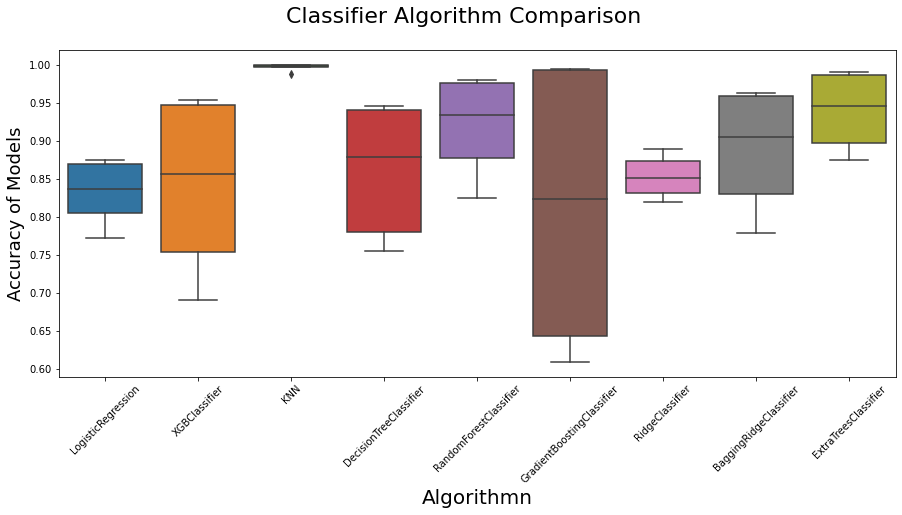

In [166]:
clfs = []
seed = 42

clfs.append(("LogisticRegression", 
             Pipeline([ ("LogReg", LogisticRegression(class_weight=None))])))

clfs.append(("XGBClassifier",
             Pipeline([("XGB", XGBClassifier())]))) 
clfs.append(("KNN", 
             Pipeline([("KNN", KNeighborsClassifier(weights='uniform'))]))) 

clfs.append(("DecisionTreeClassifier", 
             Pipeline([("DecisionTrees", DecisionTreeClassifier( class_weight=None))]))) 

clfs.append(("RandomForestClassifier", 
             Pipeline([("RandomForest", RandomForestClassifier( class_weight=None))]))) 

clfs.append(("GradientBoostingClassifier", 
             Pipeline([("GradientBoosting", GradientBoostingClassifier(max_features=15, 
                                                                       n_estimators=1000))]))) 

clfs.append(("RidgeClassifier", 
             Pipeline([("RidgeClassifier", RidgeClassifier(class_weight=None))])))

clfs.append(("BaggingRidgeClassifier",
             Pipeline([("BaggingClassifier", BaggingClassifier())])))

clfs.append(("ExtraTreesClassifier",
             Pipeline([("ExtraTrees", ExtraTreesClassifier(class_weight=None))])))

#'neg_mean_absolute_error', 'neg_mean_squared_error','r2'
scoring = 'roc_auc'
n_folds = 10

results, names  = [], [] 

for name, model  in clfs:
    kfold = KFold(n_splits = n_folds, random_state = seed)
    cv_results = cross_val_score(model, 
                                 X_train_sampled, 
                                 y_train_sampled, 
                                 cv = kfold, 
                                 scoring = scoring, 
                                 n_jobs = -1)    
    names.append(name)
    results.append(cv_results)    
    msg = "%s: %f (+/- %f)" % (name, cv_results.mean(),  cv_results.std())
                               
    print(msg)
    
# boxplot algorithm comparison
fig = plt.figure(figsize=(15,6))
fig.suptitle('Classifier Algorithm Comparison', fontsize=22)
ax = fig.add_subplot(111)
sns.boxplot(x = names, y = results)
ax.set_xticklabels(names)
ax.set_xlabel("Algorithmn", fontsize=20)
ax.set_ylabel("Accuracy of Models", fontsize=18)
ax.set_xticklabels(ax.get_xticklabels(),rotation=45)

plt.show()

**`It is seen that Random forest and ExtraTree classifier perform better than other classifiers`**

## Model I - Random Forest

### Hyper-parameter tuning for the Random Forest

In [167]:
rf = RandomForestClassifier(random_state = 42, n_jobs = -1)

In [168]:
# Lowered to save compute time
params = {'max_depth': [ 25, 28],
                         'min_samples_leaf': [2, 3, ],
                         'min_samples_split': [2, 3, 5 ],
                         'n_estimators': [ 100, 200],
          'max_features' : ["sqrt"],'criterion': ['entropy']
        }

### Output obtained after tuning
- Fitting 4 folds for each of 1440 candidates, totalling 5760 fits
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   26.2s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:  5.0min
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed: 11.9min
[Parallel(n_jobs=-1)]: Done 1234 tasks      | elapsed: 23.1min
[Parallel(n_jobs=-1)]: Done 1784 tasks      | elapsed: 38.1min
[Parallel(n_jobs=-1)]: Done 2434 tasks      | elapsed: 56.0min
[Parallel(n_jobs=-1)]: Done 3184 tasks      | elapsed: 73.8min
[Parallel(n_jobs=-1)]: Done 4034 tasks      | elapsed: 98.5min
[Parallel(n_jobs=-1)]: Done 4984 tasks      | elapsed: 144.7min
[Parallel(n_jobs=-1)]: Done 5760 out of 5760 | elapsed: 172.6min finished
Wall time: 2h 52min 48s
GridSearchCV(cv=4, estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 10, 20, 25, 28, 30],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_leaf': [2, 3, 4],
                         'min_samples_split': [2, 3, 5, 6],
                         'n_estimators': [10, 30, 50, 100, 200]},
             scoring='recall', verbose=1)
        
- RandomForestClassifier(criterion='entropy', max_depth=25, max_features='sqrt',
                       min_samples_leaf=2, n_estimators=200, n_jobs=-1,
                       random_state=42)

In [169]:
grid_search = GridSearchCV(estimator=rf,
                           param_grid = params,
                           cv = 4,
                           n_jobs = -1, 
                           verbose = 1, 
                           scoring = "recall")

In [170]:
%%time
grid_search.fit(X_train_sampled, y_train_sampled)

Fitting 4 folds for each of 24 candidates, totalling 96 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  3.1min
[Parallel(n_jobs=-1)]: Done  96 out of  96 | elapsed:  8.2min finished


Wall time: 8min 25s


GridSearchCV(cv=4, estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid={'criterion': ['entropy'], 'max_depth': [25, 28],
                         'max_features': ['sqrt'], 'min_samples_leaf': [2, 3],
                         'min_samples_split': [2, 3, 5],
                         'n_estimators': [100, 200]},
             scoring='recall', verbose=1)

In [171]:
grid_search.best_score_

0.9650375156315132

In [172]:
rf_best = grid_search.best_estimator_
rf_best

RandomForestClassifier(criterion='entropy', max_depth=25, max_features='sqrt',
                       min_samples_leaf=2, n_estimators=200, n_jobs=-1,
                       random_state=42)

### Random Forest Interpretable Model

In [173]:
rf_model = RandomForestClassifier( criterion='entropy', max_depth=25, max_features='sqrt',
                                   min_samples_leaf=2, n_estimators=200, n_jobs=-1,
                                   random_state=42)

In [174]:
rf_model_1 = rf_model.fit(X_train_sampled, y_train_sampled)
rf_model_1 

RandomForestClassifier(criterion='entropy', max_depth=25, max_features='sqrt',
                       min_samples_leaf=2, n_estimators=200, n_jobs=-1,
                       random_state=42)

In [175]:
rf_model_1.feature_importances_

array([6.40328331e-02, 6.45470251e-02, 6.06783518e-02, 1.79057133e-02,
       4.42701868e-03, 1.05099717e-02, 1.44845621e-02, 1.82297265e-03,
       1.07535549e-02, 0.00000000e+00, 5.78913896e-02, 5.67480109e-02,
       2.31893534e-02, 1.00758138e-02, 4.12426703e-03, 2.50719550e-02,
       3.36597823e-03, 3.98536770e-03, 5.02198583e-03, 3.27479125e-02,
       6.27313083e-02, 5.08326286e-02, 5.12355108e-02, 9.38026843e-03,
       7.40141462e-03, 5.25876870e-03, 8.07736860e-04, 1.89165696e-02,
       5.46965489e-03, 1.00054285e-03, 2.22852050e-06, 0.00000000e+00,
       1.01946549e-03, 2.00023339e-05, 1.06431385e-06, 1.97038094e-03,
       1.03770720e-06, 0.00000000e+00, 7.43948194e-04, 2.11297312e-04,
       5.60288730e-05, 7.85225861e-04, 1.82699068e-04, 1.05154169e-04,
       9.68696255e-04, 2.64522922e-04, 3.16722042e-05, 4.85382108e-05,
       4.28977945e-05, 1.00274985e-05, 6.36823298e-04, 3.84474400e-03,
       1.20693620e-03, 5.41447005e-03, 1.30608803e-03, 2.80809242e-02,
      

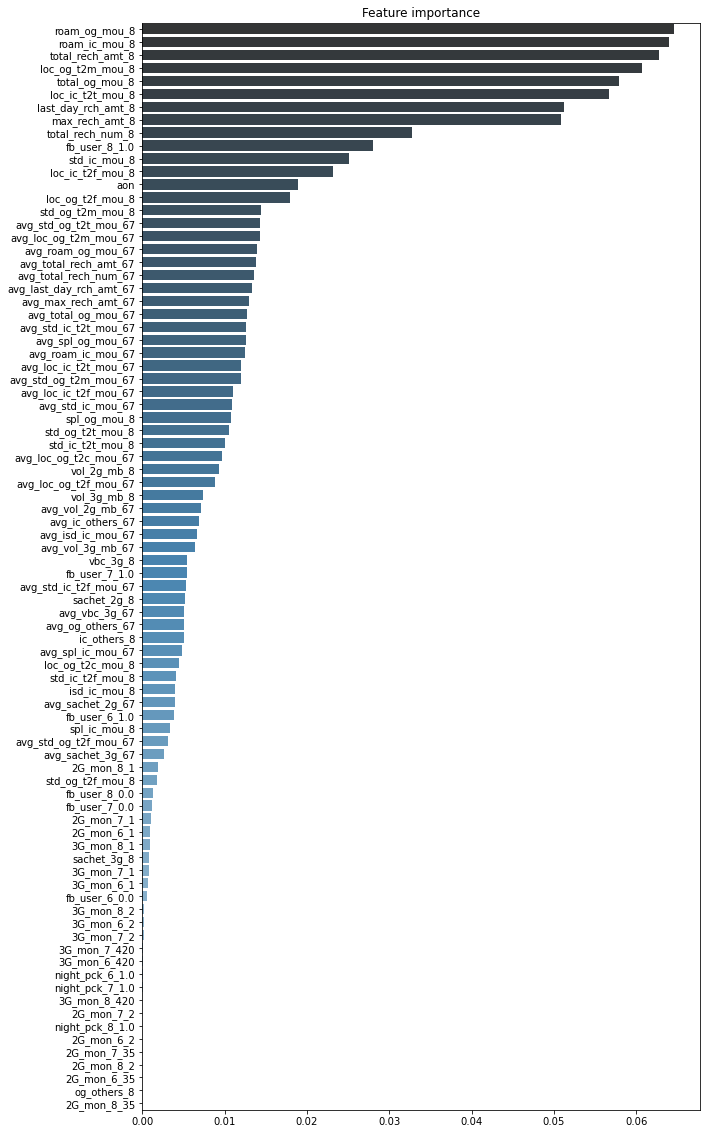

In [176]:
# Feature Importance

imp = pd.Series(data = rf_model_1.feature_importances_, index = X_train_sampled.columns).sort_values(ascending = False)
plt.figure(figsize = (10,20))
plt.title("Feature importance")
ax = sns.barplot(y = imp.index, x = imp.values, palette="Blues_d", orient='h')
plt.show()

### Selecting Top Features

In [177]:
# Selecting Important Features based on feature importance
imp_params_df = pd.DataFrame({
                                "Varname": X_train_sampled.columns,
                                "Imp": rf_model_1.feature_importances_
                            })

In [178]:
# Selecting top 13 Important features
imp_df = imp_params_df.sort_values(by="Imp", ascending=False)[:14]
imp_df

,Varname,Imp
1,roam_og_mou_8,0.064547
0,roam_ic_mou_8,0.064033
20,total_rech_amt_8,0.062731
2,loc_og_t2m_mou_8,0.060678
10,total_og_mou_8,0.057891
11,loc_ic_t2t_mou_8,0.056748
22,last_day_rch_amt_8,0.051236
21,max_rech_amt_8,0.050833
19,total_rech_num_8,0.032748
55,fb_user_8_1.0,0.028081


In [179]:
imp_cols = list(imp_df['Varname'].values)
print(imp_cols)

['roam_og_mou_8', 'roam_ic_mou_8', 'total_rech_amt_8', 'loc_og_t2m_mou_8', 'total_og_mou_8', 'loc_ic_t2t_mou_8', 'last_day_rch_amt_8', 'max_rech_amt_8', 'total_rech_num_8', 'fb_user_8_1.0', 'std_ic_mou_8', 'loc_ic_t2f_mou_8', 'aon', 'loc_og_t2f_mou_8']


### Checking VIF

In [180]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_sampled[imp_cols].columns
vif['VIF'] = [variance_inflation_factor(X_train_sampled[imp_cols].values, i) for i in range(X_train_sampled[imp_cols].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,total_rech_amt_8,5.43
7,max_rech_amt_8,3.05
4,total_og_mou_8,2.58
0,roam_og_mou_8,2.35
6,last_day_rch_amt_8,2.18
1,roam_ic_mou_8,2.13
8,total_rech_num_8,1.98
3,loc_og_t2m_mou_8,1.63
13,loc_og_t2f_mou_8,1.31
11,loc_ic_t2f_mou_8,1.27


**`total_rech_amt_8 has VIF above 5 so dropping this column`**

### Dropping total_rech_amt column

In [181]:
top_cols = ['roam_ic_mou_8',  'roam_og_mou_8', 'total_og_mou_8', 'loc_og_t2m_mou_8', 'loc_ic_t2t_mou_8', 'last_day_rch_amt_8', 'max_rech_amt_8', 'total_rech_num_8', 'fb_user_8_1.0', 'std_ic_mou_8', 'loc_ic_t2f_mou_8', 'loc_og_t2f_mou_8', 'aon']

### Evaluating with all Data

In [182]:
# Predicting using train data
y_train_pred = rf_model_1.predict(X_train_sampled)

In [183]:
# Predicting using test data
y_test_pred = rf_model_1.predict(X_test_sampled)

In [184]:
def evaluate_model( Y_DATA, Y_PRED):
    print(" Data Evaluation")
    print()
    confusion = metrics.confusion_matrix(Y_DATA, Y_PRED)
    confusion
    TP = confusion[1,1] # true positive 
    TN = confusion[0,0] # true negatives
    FP = confusion[0,1] # false positives
    FN = confusion[1,0] # false negatives
    print("Confusion Matrix of Data")
    print(confusion)
    print()
    class_report = metrics.classification_report(Y_DATA, Y_PRED)
    print("Classification Report of Data" )
    print(class_report)
    print()
    
    # Evaluating Precision and Recall
    precision = precision_score(Y_DATA, Y_PRED)
    print("Precison", precision.round(2))
    print()
    recall = recall_score(Y_DATA, Y_PRED)
    print("Recall", recall.round(2))   
    print()
    F1_score = (2 * ((precision * recall) / (precision + recall)))
    print("F1_Score :" , F1_score.round(2))                           
    print("*"* 50)
    
    return None

### Evaluating Train Data

In [185]:
evaluate_model(y_train_sampled, y_train_pred)

 Data Evaluation

Confusion Matrix of Data
[[19090   102]
 [   14 19178]]

Classification Report of Data
              precision    recall  f1-score   support

           0       1.00      0.99      1.00     19192
           1       0.99      1.00      1.00     19192

    accuracy                           1.00     38384
   macro avg       1.00      1.00      1.00     38384
weighted avg       1.00      1.00      1.00     38384


Precison 0.99

Recall 1.0

F1_Score : 1.0
**************************************************


### Evaluating Test Data

In [186]:
evaluate_model(y_test_sampled, y_test_pred)

 Data Evaluation

Confusion Matrix of Data
[[7783  443]
 [ 230  548]]

Classification Report of Data
              precision    recall  f1-score   support

           0       0.97      0.95      0.96      8226
           1       0.55      0.70      0.62       778

    accuracy                           0.93      9004
   macro avg       0.76      0.83      0.79      9004
weighted avg       0.94      0.93      0.93      9004


Precison 0.55

Recall 0.7

F1_Score : 0.62
**************************************************


**`There is considerable drop in Recall or Sensitivity of test data`**

## Improving Model Performance

## Rebuilding Random Forest Model using top 14 Variables

In [187]:
rf_final = RandomForestClassifier(random_state = 42, n_jobs = -1)

In [188]:
# Reduced parameters to save time
params_final = { 'max_depth': [25],
                 'min_samples_leaf': [2, 3],
                 'min_samples_split': [ 5, 6 ],
                 'n_estimators': [   200],
                 'max_features' : ["sqrt"],
                 'criterion': ['entropy']
        }

Tried on these parameters 

- params_final = { 'max_depth': [20 , 25,28, 30],
                 'min_samples_leaf': [2, 3],
                 'min_samples_split': [ 5, 6 ],
                 'n_estimators': [ 50,  100, 200],
                 'max_features' : ["sqrt", "log2"],
                 'criterion': ['gini', 'entropy']
        }
        
-  Fitting 4 folds for each of 192 candidates, totalling 768 fits
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   54.8s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  4.4min
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed: 10.9min
[Parallel(n_jobs=-1)]: Done 768 out of 768 | elapsed: 21.8min finished
Wall time: 21min 53s
GridSearchCV(cv=4, estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [20, 25, 28, 30],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_leaf': [2, 3],
                         'min_samples_split': [5, 6],
                         'n_estimators': [50, 100, 200]},
             scoring='recall', verbose=1)
             
- RandomForestClassifier(criterion='entropy', max_depth=25, max_features='sqrt',
                       min_samples_leaf=2, min_samples_split=5,
                       n_estimators=200, n_jobs=-1, random_state=42)

In [189]:
grid_search_final = GridSearchCV(estimator = rf_final,
                           param_grid = params_final,
                           cv = 4,
                           n_jobs = -1, 
                           verbose = 1, 
                           scoring = "recall")

In [190]:
%%time
grid_search_final.fit(X_train_sampled[top_cols], y_train_sampled)

Fitting 4 folds for each of 4 candidates, totalling 16 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 out of  16 | elapsed:   50.9s finished


Wall time: 55.6 s


GridSearchCV(cv=4, estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid={'criterion': ['entropy'], 'max_depth': [25],
                         'max_features': ['sqrt'], 'min_samples_leaf': [2, 3],
                         'min_samples_split': [5, 6], 'n_estimators': [200]},
             scoring='recall', verbose=1)

In [191]:
grid_search_final.best_score_

0.9447165485619009

In [192]:
rf_best_final = grid_search_final.best_estimator_
rf_best_final

RandomForestClassifier(criterion='entropy', max_depth=25, max_features='sqrt',
                       min_samples_leaf=2, min_samples_split=5,
                       n_estimators=200, n_jobs=-1, random_state=42)

In [193]:
# Prediction using Train data for top 14 
y_train_pred = rf_best_final.predict(X_train_sampled[top_cols])

In [194]:
# Predicting Probability
y_train_predicted = rf_best_final.predict_proba(X_train_sampled[top_cols])[:,1]
y_train_predicted[:10]

array([0.82858333, 0.00961905, 0.06841667, 0.03756944, 0.01654762,
       0.35582921, 0.03027778, 0.8534542 , 0.05615953, 0.01391667])

In [195]:
#Creating a dataframe with the actual Converted and the Predicted Converted probabilities
y_train_pred_final = pd.DataFrame({'Actual_Churn': y_train_sampled, 'Pred_Curn':y_train_pred, 'Prob_Churn':y_train_predicted})
y_train_pred_final.head()

,Actual_Churn,Pred_Curn,Prob_Churn
0,1,1,0.828583
1,0,0,0.009619
2,0,0,0.068417
3,0,0,0.037569
4,0,0,0.016548


In [196]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Prob_Churn.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Actual_Churn,Pred_Curn,Prob_Churn,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,1,1,0.828583,1,1,1,1,1,1,1,1,1,0
1,0,0,0.009619,1,0,0,0,0,0,0,0,0,0
2,0,0,0.068417,1,0,0,0,0,0,0,0,0,0
3,0,0,0.037569,1,0,0,0,0,0,0,0,0,0
4,0,0,0.016548,1,0,0,0,0,0,0,0,0,0


In [197]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix
num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Actual_Churn, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.522457  1.000000  0.044915
0.1   0.1  0.908451  1.000000  0.816903
0.2   0.2  0.954721  0.999896  0.909546
0.3   0.3  0.974547  0.999844  0.949250
0.4   0.4  0.986218  0.998541  0.973895
0.5   0.5  0.989735  0.994164  0.985306
0.6   0.6  0.988146  0.984577  0.991715
0.7   0.7  0.980018  0.965871  0.994164
0.8   0.8  0.958550  0.920905  0.996196
0.9   0.9  0.901782  0.806013  0.997551


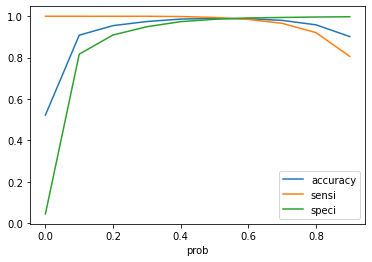

In [198]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

**`Selecting 0.40 as optimal cut off`**

In [199]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Prob_Churn.map( lambda x: 1 if x > 0.40 else 0)

y_train_pred_final.head()

,Actual_Churn,Pred_Curn,Prob_Churn,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,1,1,0.828583,1,1,1,1,1,1,1,1,1,0,1
1,0,0,0.009619,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0.068417,1,0,0,0,0,0,0,0,0,0,0
3,0,0,0.037569,1,0,0,0,0,0,0,0,0,0,0
4,0,0,0.016548,1,0,0,0,0,0,0,0,0,0,0


### Evaluate Train Data for top 14 variables

In [200]:
evaluate_model(y_train_sampled, y_train_pred_final['final_predicted'] )

 Data Evaluation

Confusion Matrix of Data
[[18691   501]
 [   28 19164]]

Classification Report of Data
              precision    recall  f1-score   support

           0       1.00      0.97      0.99     19192
           1       0.97      1.00      0.99     19192

    accuracy                           0.99     38384
   macro avg       0.99      0.99      0.99     38384
weighted avg       0.99      0.99      0.99     38384


Precison 0.97

Recall 1.0

F1_Score : 0.99
**************************************************


### Making Predictions and Evaluating Test data for top 14 

In [201]:
# Prediction using Test data for top 10 
y_test_pred = rf_best_final.predict(X_test_sampled[top_cols])

In [202]:
# Predicting Probability
y_test_predicted = rf_best_final.predict_proba(X_test_sampled[top_cols])[:,1]
y_test_predicted[:10]

array([0.006     , 0.0172096 , 0.01396104, 0.        , 0.9519245 ,
       0.01916667, 0.03416667, 0.02065476, 0.00816667, 0.03366667])

In [203]:
#Creating a dataframe with the actual Converted and the Predicted Converted probabilities
y_test_pred_final = pd.DataFrame({'Actual_Churn': y_test_sampled, 'Pred_Curn':y_test_pred, 'Prob_Churn':y_test_predicted})
y_test_pred_final.head()

,Actual_Churn,Pred_Curn,Prob_Churn
52088,0,0,0.006000
59498,0,0,0.017210
20003,0,0,0.013961
74741,0,0,0.000000
55694,0,1,0.951924


In [204]:
y_test_pred_final['final_predicted'] = y_test_pred_final.Prob_Churn.map( lambda x: 1 if x > 0.20 else 0)

y_test_pred_final.head()

,Actual_Churn,Pred_Curn,Prob_Churn,final_predicted
52088,0,0,0.006000,0
59498,0,0,0.017210,0
20003,0,0,0.013961,0
74741,0,0,0.000000,0
55694,0,1,0.951924,1


In [205]:
evaluate_model(y_test_sampled, y_test_pred_final['final_predicted'])

 Data Evaluation

Confusion Matrix of Data
[[6812 1414]
 [ 101  677]]

Classification Report of Data
              precision    recall  f1-score   support

           0       0.99      0.83      0.90      8226
           1       0.32      0.87      0.47       778

    accuracy                           0.83      9004
   macro avg       0.65      0.85      0.69      9004
weighted avg       0.93      0.83      0.86      9004


Precison 0.32

Recall 0.87

F1_Score : 0.47
**************************************************


### Plotting ROC Curve

An ROC curve demonstrates several things:

- It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).
- The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.
- The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

In [206]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [207]:
fpr, tpr, thresholds = metrics.roc_curve( y_test_sampled, y_test_pred_final['Prob_Churn'], drop_intermediate = False )


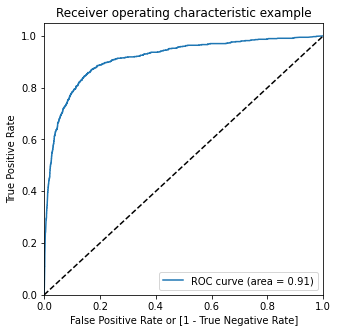

In [208]:
draw_roc(y_test_sampled, y_test_pred_final['Prob_Churn'])

In [209]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_sampled[top_cols].columns
vif['VIF'] = [variance_inflation_factor(X_train_sampled[top_cols].values, i) for i in range(X_train_sampled[top_cols].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
6,max_rech_amt_8,2.31
1,roam_og_mou_8,2.15
0,roam_ic_mou_8,2.13
5,last_day_rch_amt_8,2.12
2,total_og_mou_8,1.92
3,loc_og_t2m_mou_8,1.58
7,total_rech_num_8,1.54
11,loc_og_t2f_mou_8,1.31
10,loc_ic_t2f_mou_8,1.27
4,loc_ic_t2t_mou_8,1.18


**`All VIFs are less than 3, so there is no multicollinerity `**

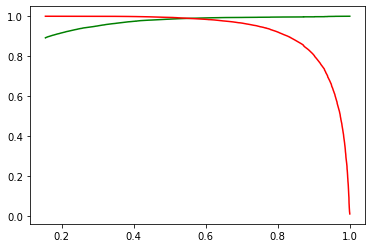

In [210]:
### Precision and recall tradeoff

from sklearn.metrics import precision_recall_curve

p, r, thresholds = precision_recall_curve(y_train_pred_final.Actual_Churn, y_train_pred_final.Prob_Churn)

plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

### Results DataFrame

In [211]:
# Evaluating Precision and Recall
precision = precision_score(y_test_sampled, y_test_pred_final['final_predicted'])
print("Precison", precision.round(4)*100)
print()
recall = recall_score(y_test_sampled, y_test_pred_final['final_predicted'])
print("Recall", recall.round(4)*100)  
print()
F1_score = (2 * ((precision * recall) / (precision + recall)))
print("F1_Score :" , F1_score.round(2))                           
AUC = round(metrics.roc_auc_score(y_test_sampled, y_test_pred_final['Prob_Churn']),2)
print("AUC :", AUC)

Precison 32.379999999999995

Recall 87.02

F1_Score : 0.47
AUC : 0.91


In [212]:
results_df = pd.DataFrame(data = { 'Model Name' : 'Interpretable Random Forest', 
                                   'Test Recall' : [recall.round(4)], 
                                   'Test Precision' : [precision.round(4)],
                                   'Test F1 Score' : [F1_score.round(4)],
                                   'AUC' : [AUC], 
                                   'Cut off Prob' : [0.20]}, 
                                   index = ['Model I'],
                                    )
results_df

,Model Name,Test Recall,Test Precision,Test F1 Score,AUC,Cut off Prob
Model I,Interpretable Random Forest,0.8702,0.3238,0.4719,0.91,0.2


# PCA Modelling

In [213]:
X_train_sampled.shape, X_test_sampled.shape

((38384, 84), (9004, 84))

In [214]:
y_train_sampled.shape, y_test_sampled.shape

((38384,), (9004,))

In [215]:
from sklearn.decomposition import PCA
pca = PCA(random_state = 42)
pca.fit(X_train_sampled)

PCA(random_state=42)

In [216]:
# Components of PCA
pca.components_

array([[ 2.95502379e-01,  3.03714377e-01,  1.14364654e-01, ...,
        -1.79863714e-02,  1.27201628e-02,  1.22291227e-01],
       [-2.51838672e-01, -2.43526876e-01,  1.75827329e-01, ...,
         4.74922399e-02,  5.18664764e-02,  7.08792439e-02],
       [ 1.84247438e-01,  2.18825430e-01, -6.85191516e-02, ...,
        -2.94867861e-03, -3.50888582e-02, -1.48586187e-01],
       ...,
       [ 5.54108230e-05,  3.28361223e-04,  2.58164286e-04, ...,
         1.30925930e-03,  1.62478730e-04, -1.39504264e-03],
       [ 2.58649231e-05,  4.97313358e-04, -3.17431329e-05, ...,
        -1.48528391e-03, -8.37427569e-04,  1.39538638e-03],
       [ 5.53671191e-18, -8.50156572e-17, -2.01789689e-16, ...,
         1.52655666e-16,  5.55111512e-17,  1.11022302e-16]])

In [217]:
# Explained Variance Ratio
evr = pca.explained_variance_ratio_
evr

array([1.00439247e-01, 8.82897829e-02, 8.30143245e-02, 5.35303661e-02,
       4.74655670e-02, 4.18606315e-02, 3.43220727e-02, 3.31052396e-02,
       2.97571141e-02, 2.85506874e-02, 2.71954233e-02, 2.55617422e-02,
       2.41739738e-02, 2.26713576e-02, 2.23834038e-02, 2.09427180e-02,
       1.94902111e-02, 1.82513281e-02, 1.57787052e-02, 1.48758456e-02,
       1.45881574e-02, 1.39949315e-02, 1.32419622e-02, 1.28617288e-02,
       1.20944796e-02, 1.18288906e-02, 1.15833188e-02, 1.10228492e-02,
       9.45880933e-03, 9.30147013e-03, 8.67222481e-03, 8.28363926e-03,
       7.45115376e-03, 7.09485710e-03, 6.58836075e-03, 6.41206275e-03,
       6.23556918e-03, 5.85623710e-03, 5.16307605e-03, 5.01568300e-03,
       4.85224457e-03, 4.68754287e-03, 4.33453413e-03, 4.20653160e-03,
       4.10472590e-03, 3.88648016e-03, 3.70764511e-03, 3.43278170e-03,
       3.26545044e-03, 3.13875314e-03, 2.72215530e-03, 2.37903421e-03,
       1.87755108e-03, 1.82974017e-03, 1.67692802e-03, 1.44939926e-03,
      

In [218]:
var_cum = np.cumsum(evr)
var_cum

array([0.10043925, 0.18872903, 0.27174335, 0.32527372, 0.37273929,
       0.41459992, 0.44892199, 0.48202723, 0.51178434, 0.54033503,
       0.56753046, 0.5930922 , 0.61726617, 0.63993753, 0.66232093,
       0.68326365, 0.70275386, 0.72100519, 0.7367839 , 0.75165974,
       0.7662479 , 0.78024283, 0.79348479, 0.80634652, 0.818441  ,
       0.83026989, 0.84185321, 0.85287606, 0.86233487, 0.87163634,
       0.88030856, 0.8885922 , 0.89604336, 0.90313821, 0.90972657,
       0.91613864, 0.92237421, 0.92823044, 0.93339352, 0.9384092 ,
       0.94326145, 0.94794899, 0.95228352, 0.95649006, 0.96059478,
       0.96448126, 0.96818891, 0.97162169, 0.97488714, 0.97802589,
       0.98074805, 0.98312708, 0.98500463, 0.98683437, 0.9885113 ,
       0.9899607 , 0.99130293, 0.99261701, 0.99362381, 0.99456155,
       0.99529836, 0.99596253, 0.99660305, 0.99710944, 0.99756642,
       0.99792313, 0.99821187, 0.99847168, 0.99867615, 0.99887754,
       0.99906732, 0.99925223, 0.99941405, 0.99953661, 0.99963

### Scree Plot for Explained Variance

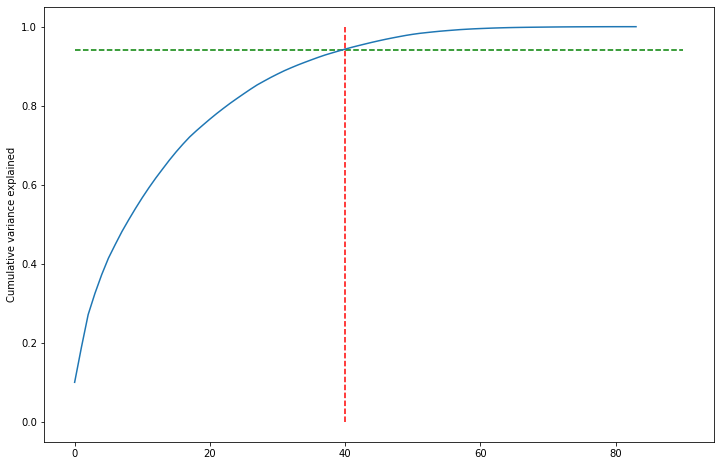

In [219]:
fig = plt.figure(figsize=[12,8])
plt.vlines(x=40, ymax=1, ymin=0, colors="r", linestyles="--")
plt.hlines(y=0.94, xmax=90, xmin=0, colors="g", linestyles="--")
plt.plot(var_cum)
plt.ylabel("Cumulative variance explained")
plt.show()

### `94% of Variance is Explained by 40 variables`

### Perform PCA with 40 components

In [220]:
from sklearn.decomposition import IncrementalPCA

In [221]:
pca_final = IncrementalPCA(n_components = 40)
pca_final

IncrementalPCA(n_components=40)

In [222]:
# Transforming Train Data
df_train_pca = pca_final.fit_transform(X_train_sampled)
df_train_pca.shape

(38384, 40)

In [223]:
corr_matrix = np.corrcoef(df_train_pca.T)
corr_matrix

array([[ 1.00000000e+00, -2.19283803e-06,  9.84906922e-08, ...,
         9.45193086e-05,  1.37081840e-05, -5.44754753e-05],
       [-2.19283803e-06,  1.00000000e+00, -1.64846772e-05, ...,
        -8.37056289e-05,  9.95747475e-05, -1.92206659e-04],
       [ 9.84906922e-08, -1.64846772e-05,  1.00000000e+00, ...,
         3.79048832e-04, -4.22740939e-05,  3.10754856e-04],
       ...,
       [ 9.45193086e-05, -8.37056289e-05,  3.79048832e-04, ...,
         1.00000000e+00, -2.75636127e-03,  2.18305387e-02],
       [ 1.37081840e-05,  9.95747475e-05, -4.22740939e-05, ...,
        -2.75636127e-03,  1.00000000e+00, -2.36939677e-03],
       [-5.44754753e-05, -1.92206659e-04,  3.10754856e-04, ...,
         2.18305387e-02, -2.36939677e-03,  1.00000000e+00]])

In [224]:
corr_matrix.shape

(40, 40)

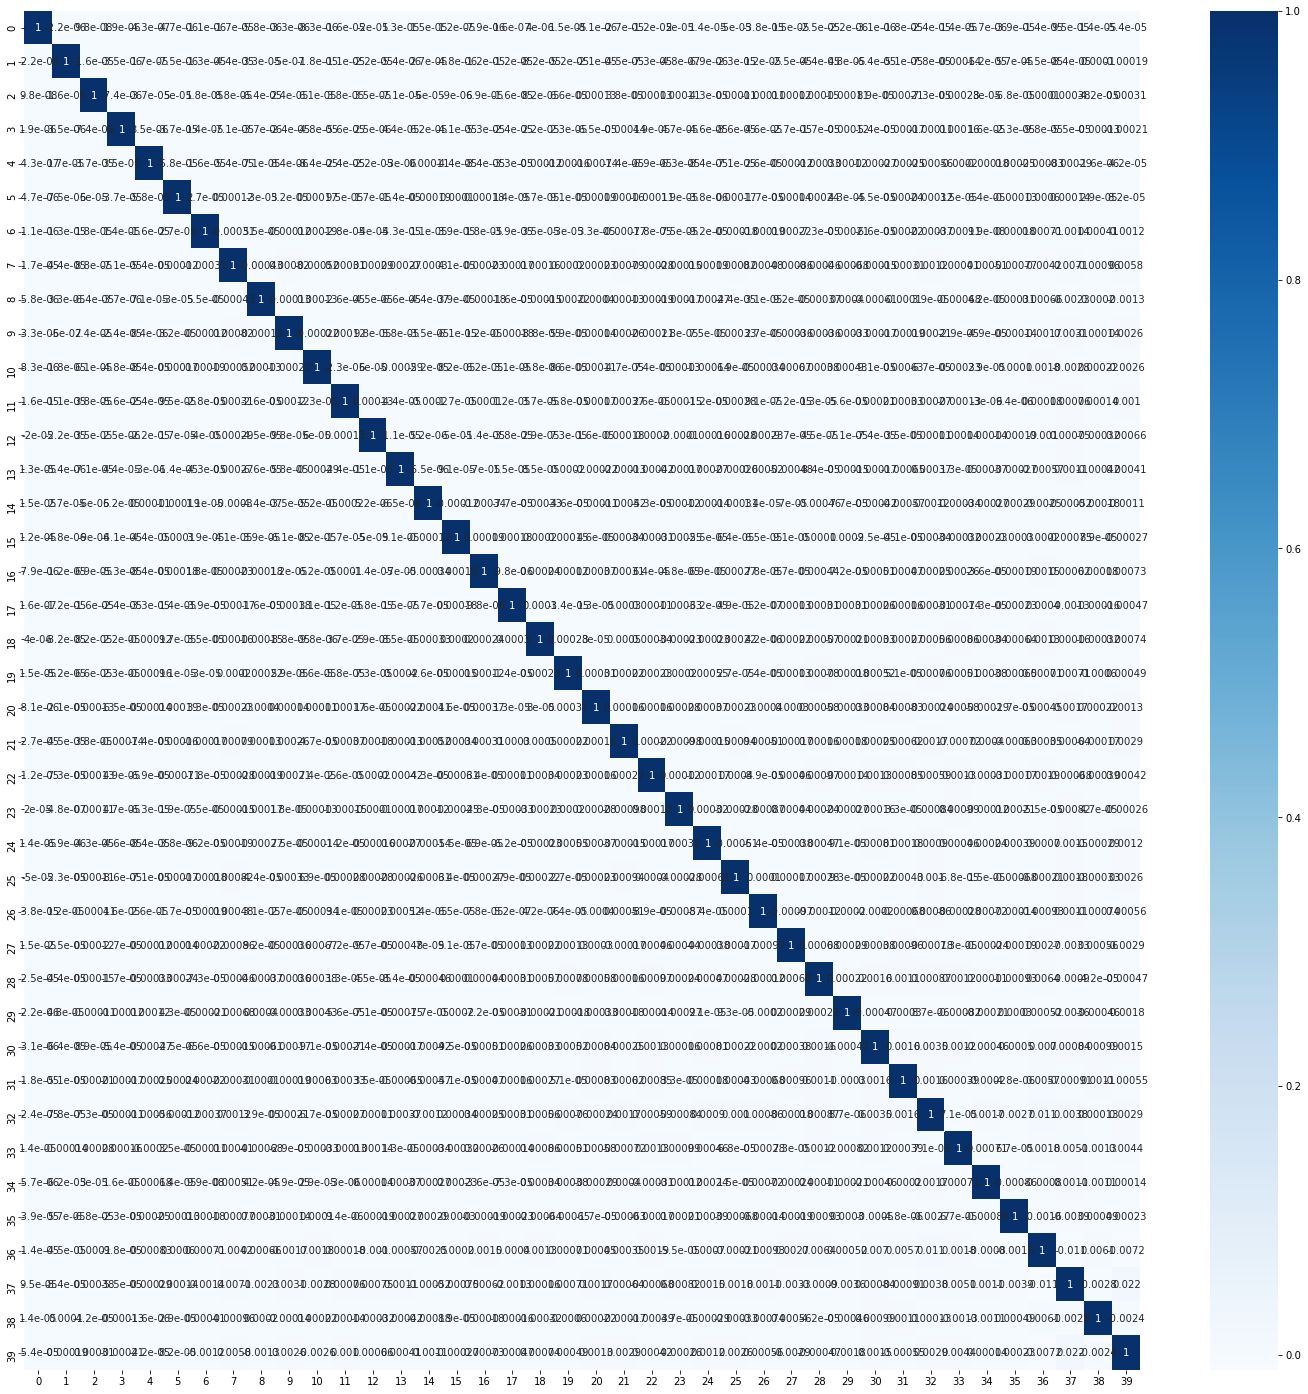

In [225]:
# Plotting Heatmap
plt.figure(figsize=[25,25])
sns.heatmap(corr_matrix, annot=True, cmap = 'Blues')

### Applying Transformation on Test Set

In [226]:
# Transforming Test Data
df_test_pca = pca_final.transform(X_test_sampled)
df_test_pca.shape

(9004, 40)

## Model II -  Building Logistic Regression

In [227]:
# Creating Column Names
new = ['X'+ str(i) for i in range(1, 41)]
print(new)

['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9', 'X10', 'X11', 'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18', 'X19', 'X20', 'X21', 'X22', 'X23', 'X24', 'X25', 'X26', 'X27', 'X28', 'X29', 'X30', 'X31', 'X32', 'X33', 'X34', 'X35', 'X36', 'X37', 'X38', 'X39', 'X40']


In [228]:
# Train DataFrame
df_train_pca = pd.DataFrame(df_train_pca, columns = new)
df_train_pca.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,X24,X25,X26,X27,X28,X29,X30,X31,X32,X33,X34,X35,X36,X37,X38,X39,X40
0,-0.473718,-4.237067,5.848612,-1.810279,-2.736493,1.654329,0.165962,6.238457,-0.833886,-0.979056,-0.562364,0.552070,-0.726788,-0.192222,-0.362723,-0.166562,1.245507,-0.212306,0.603744,0.811712,0.637319,0.408458,-0.458173,-0.070320,0.262206,0.119890,-0.254701,2.255163,0.964128,0.397323,-0.033726,0.095996,0.625202,-0.265872,0.022050,-0.419629,-0.153045,0.954516,-0.161590,0.820720
1,0.103783,-3.179822,2.802695,-1.169753,-0.964704,0.566457,0.186262,-0.931950,0.301027,2.042309,-0.024083,-0.319537,0.445659,-0.041479,0.276661,-1.009638,3.268034,2.573492,-0.226480,0.105124,-0.274469,0.893816,-0.792589,0.109714,0.083345,-0.490852,-0.426317,0.525129,-0.339171,-0.490231,-0.080285,-0.412252,-0.009511,0.295238,0.163385,0.077529,-0.236323,0.076731,0.003062,0.033271
2,-0.467147,-2.144598,3.439720,-2.525100,3.361493,2.979958,0.387327,-3.353702,0.290654,-1.905888,0.367100,0.626579,-0.759738,-0.266096,-0.664852,0.170912,-0.242652,0.222762,0.196175,0.428455,0.227868,0.372131,0.887137,0.122321,0.620853,0.415982,-0.192411,0.816747,-1.166536,0.669160,0.723263,0.226668,-0.054989,0.244525,-0.017122,0.019567,0.834348,-0.382518,0.194783,-0.183357
3,-0.254765,0.313553,-1.892146,-1.294844,0.292164,-1.073334,-0.035810,-0.067545,-0.798851,-0.460220,0.392581,-0.135921,0.106799,0.166010,-0.815673,-0.152305,0.130915,-0.712099,-0.251500,0.159965,0.299149,-0.170426,-0.779732,0.304417,-1.248034,0.528217,0.309108,0.180171,0.017928,0.093376,0.114347,-0.016844,-0.056187,-0.593846,0.025233,0.101701,0.003345,0.398902,-0.055417,-0.363476
4,2.808465,-1.216913,-3.103688,-1.603490,-1.379082,-1.042454,0.868676,-0.972266,-0.032361,1.794761,0.674104,0.942749,0.490336,1.404556,-0.280022,-0.981677,-0.187093,-0.881302,1.071336,1.220881,1.320476,1.182633,3.790014,1.656163,-1.084367,0.427082,-0.043297,0.559016,0.468404,0.330836,1.056738,-0.688863,-0.206570,-0.250948,0.413333,-0.378084,-1.415894,0.583764,0.561868,-0.269937


In [229]:
# Test DataFrame
df_test_pca = pd.DataFrame(df_test_pca, columns = new)
df_test_pca.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,X24,X25,X26,X27,X28,X29,X30,X31,X32,X33,X34,X35,X36,X37,X38,X39,X40
0,2.246076,-1.891785,-3.069050,0.196367,-0.695002,-0.267197,0.400621,-0.238909,-0.855572,-0.550157,-0.927074,-0.393744,0.253711,-0.434754,-1.618879,-0.985881,-1.013988,-0.315328,-0.562584,1.161144,0.880131,0.055796,-0.933401,0.448740,-0.586130,1.211392,0.207812,0.414149,-0.153740,0.014558,-0.010530,-0.774600,-0.118161,-0.062527,0.021209,-0.165292,0.153873,-0.238693,0.159133,0.826244
1,-1.002691,0.245002,0.620312,-0.391735,0.208208,0.281933,-0.827722,0.766428,-0.420805,1.206186,-0.342889,-0.315357,0.658079,0.258313,0.237902,-1.058706,0.903910,0.636445,-0.242020,0.190235,-0.556979,0.440521,0.749890,0.094305,-0.300722,0.313827,-0.293161,-0.704885,-0.031194,0.158168,-0.126328,-0.129874,-0.772691,-0.020887,0.104908,0.022820,-0.072987,0.005285,0.105218,-0.266740
2,0.230662,-0.102744,-1.336325,-0.097406,-0.217548,0.192294,-0.796027,-0.646460,-0.441543,1.105609,-0.281089,0.886818,-0.119729,-0.120558,0.467978,0.022078,0.007307,-0.189042,0.564207,0.540390,-0.914113,-0.441447,0.709751,-0.757976,0.097921,-0.047805,-0.108821,-0.058490,-0.051189,0.125062,0.028174,0.815364,0.091320,-0.134632,0.418734,-1.127839,0.105131,-0.480470,-1.082537,0.973641
3,0.296524,-1.635042,0.547127,0.068135,-0.618953,0.758465,1.835416,-1.767806,-0.051515,0.489092,0.152534,-0.184118,-0.277774,-0.178310,-0.250609,0.621237,-0.341452,-0.102258,0.087678,-0.044097,0.084638,0.280020,0.445993,0.177169,-0.457595,-0.447659,-0.067042,-0.014738,-0.275392,-0.520963,0.017406,0.348487,-0.080907,0.206954,-0.586476,0.039116,-0.027424,0.246015,-0.219268,0.765253
4,-1.761007,1.143530,0.148594,-0.389525,-0.010778,0.555688,0.193751,-0.240195,0.074860,-0.555511,0.189107,-0.153152,-0.255153,-0.076306,-0.009748,0.129764,-0.357496,-0.015040,-0.246533,-0.081513,-0.119017,-0.163847,0.370178,-0.330951,-0.046420,0.101274,0.290171,0.082925,0.190207,-0.185871,0.026356,0.157938,-0.167254,0.212670,0.038581,0.073218,0.126485,-0.247216,-0.022980,-0.138356


In [230]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RepeatedStratifiedKFold

model = LogisticRegression(random_state=42)

solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l1', 'l2', 'elasticnet']
c_values = [100, 10, 1.0, 0.1, 0.01]

# define grid search
grid = dict(solver=solvers,penalty=penalty,C=c_values)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=42)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='recall',error_score=0, verbose = 1)

In [231]:
%%time
grid_result = grid_search.fit(df_train_pca, y_train_sampled)

Fitting 30 folds for each of 45 candidates, totalling 1350 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 448 tasks      | elapsed:   23.6s
[Parallel(n_jobs=-1)]: Done 1068 tasks      | elapsed:   45.5s
[Parallel(n_jobs=-1)]: Done 1335 out of 1350 | elapsed:   55.2s remaining:    0.5s
[Parallel(n_jobs=-1)]: Done 1350 out of 1350 | elapsed:   55.4s finished


Wall time: 55.7 s


In [232]:
grid_result.best_score_

0.8523861983237797

In [233]:
best_pca_logreg = grid_result.best_params_
best_pca_logreg

{'C': 100, 'penalty': 'l2', 'solver': 'lbfgs'}

In [234]:
best_pca_logreg['C']

100

In [235]:
best_pca_logreg['penalty']

'l2'

In [236]:
best_pca_logreg['solver']

'lbfgs'

### Tuning model to find optimal cut off for better  performance 

In [237]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(C= best_pca_logreg['C'], penalty= best_pca_logreg['penalty'], solver= best_pca_logreg['solver'])

In [238]:
pca_logreg_model = logreg.fit(df_train_pca, y_train_sampled)

In [239]:
pca_logreg_model

LogisticRegression(C=100)

In [240]:
# Getting the predicted values on the train set

y_train_pred = pca_logreg_model.predict_proba(df_train_pca)[:, 1]
y_train_pred[:10]

array([0.6087236 , 0.03599439, 0.87673951, 0.26254099, 0.0426756 ,
       0.92675214, 0.22565395, 0.82001218, 0.58004496, 0.00363074])

In [241]:
#Creating a dataframe with the actual Converted and the Predicted Converted probabilities
y_train_pred_final = pd.DataFrame({ 'Actual_Churn': y_train_sampled, 'Pred_Curn':y_train_pred})
y_train_pred_final.head()

,Actual_Churn,Pred_Curn
0,1,0.608724
1,0,0.035994
2,0,0.876740
3,0,0.262541
4,0,0.042676


In [242]:
#Creating new column 'predicted' with 1 if Churn_Prob > 0.5 else 0
y_train_pred_final['predicted'] = y_train_pred_final.Pred_Curn.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Actual_Churn,Pred_Curn,predicted
0,1,0.608724,1
1,0,0.035994,0
2,0,0.876740,1
3,0,0.262541,0
4,0,0.042676,0


### Evaluating Train Data

In [243]:
evaluate_model(y_train_sampled, y_train_pred_final['predicted'])

 Data Evaluation

Confusion Matrix of Data
[[15916  3276]
 [ 2820 16372]]

Classification Report of Data
              precision    recall  f1-score   support

           0       0.85      0.83      0.84     19192
           1       0.83      0.85      0.84     19192

    accuracy                           0.84     38384
   macro avg       0.84      0.84      0.84     38384
weighted avg       0.84      0.84      0.84     38384


Precison 0.83

Recall 0.85

F1_Score : 0.84
**************************************************


### Improving Model Performance

In [244]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Pred_Curn.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Actual_Churn,Pred_Curn,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,1,0.608724,1,1,1,1,1,1,1,1,0,0,0
1,0,0.035994,0,1,0,0,0,0,0,0,0,0,0
2,0,0.876740,1,1,1,1,1,1,1,1,1,1,0
3,0,0.262541,0,1,1,1,0,0,0,0,0,0,0
4,0,0.042676,0,1,0,0,0,0,0,0,0,0,0


In [245]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix


num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Actual_Churn, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.500000  1.000000  0.000000
0.1   0.1  0.697374  0.975823  0.418925
0.2   0.2  0.761515  0.950865  0.572165
0.3   0.3  0.801636  0.925750  0.677522
0.4   0.4  0.827089  0.894852  0.759327
0.5   0.5  0.841184  0.853064  0.829304
0.6   0.6  0.842773  0.805440  0.880106
0.7   0.7  0.831258  0.742757  0.919758
0.8   0.8  0.786474  0.622603  0.950344
0.9   0.9  0.639824  0.299239  0.980409


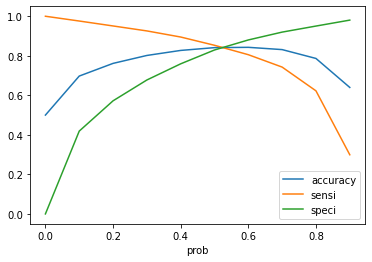

In [246]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

In [247]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Pred_Curn.map( lambda x: 1 if x > 0.47 else 0)

y_train_pred_final.head()

,Actual_Churn,Pred_Curn,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,1,0.608724,1,1,1,1,1,1,1,1,0,0,0,1
1,0,0.035994,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0.876740,1,1,1,1,1,1,1,1,1,1,0,1
3,0,0.262541,0,1,1,1,0,0,0,0,0,0,0,0
4,0,0.042676,0,1,0,0,0,0,0,0,0,0,0,0


In [248]:
evaluate_model(y_train_sampled, y_train_pred_final['final_predicted'])

 Data Evaluation

Confusion Matrix of Data
[[15560  3632]
 [ 2567 16625]]

Classification Report of Data
              precision    recall  f1-score   support

           0       0.86      0.81      0.83     19192
           1       0.82      0.87      0.84     19192

    accuracy                           0.84     38384
   macro avg       0.84      0.84      0.84     38384
weighted avg       0.84      0.84      0.84     38384


Precison 0.82

Recall 0.87

F1_Score : 0.84
**************************************************


### Evaluating Test Data

In [249]:
# Getting the predicted values on the test set

y_test_pred = pca_logreg_model.predict_proba(df_test_pca)[:, 1]
y_test_pred[:10]


array([1.01935892e-02, 6.38507322e-01, 4.57336320e-02, 1.40578611e-01,
       9.17285518e-01, 7.25937030e-04, 1.89651440e-01, 3.62764210e-04,
       4.95261461e-03, 4.08944334e-02])

In [250]:
#Creating a dataframe with the actual Converted and the Predicted Converted probabilities
y_test_pred_final = pd.DataFrame({ 'Actual_Churn': y_test_sampled, 'Pred_Curn': y_test_pred})
y_test_pred_final.head()

,Actual_Churn,Pred_Curn
52088,0,0.010194
59498,0,0.638507
20003,0,0.045734
74741,0,0.140579
55694,0,0.917286


In [251]:
#Creating new column 'predicted' with 1 if Churn_Prob > 0.5 else 0
y_test_pred_final['predicted'] = y_test_pred_final.Pred_Curn.map(lambda x: 1 if x > 0.47 else 0)

# Let's see the head
y_test_pred_final.head()

,Actual_Churn,Pred_Curn,predicted
52088,0,0.010194,0
59498,0,0.638507,1
20003,0,0.045734,0
74741,0,0.140579,0
55694,0,0.917286,1


In [252]:
evaluate_model(y_test_sampled, y_test_pred_final['predicted'])

 Data Evaluation

Confusion Matrix of Data
[[6635 1591]
 [ 149  629]]

Classification Report of Data
              precision    recall  f1-score   support

           0       0.98      0.81      0.88      8226
           1       0.28      0.81      0.42       778

    accuracy                           0.81      9004
   macro avg       0.63      0.81      0.65      9004
weighted avg       0.92      0.81      0.84      9004


Precison 0.28

Recall 0.81

F1_Score : 0.42
**************************************************


### Plotting ROC

In [253]:
fpr, tpr, thresholds = metrics.roc_curve( y_test_pred_final.Actual_Churn, y_test_pred_final.Pred_Curn, drop_intermediate = False )

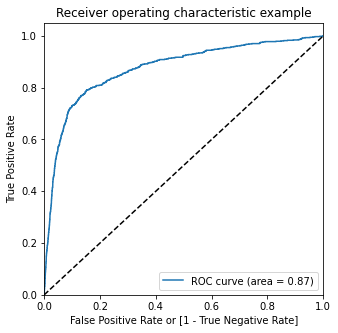

In [254]:
draw_roc(y_test_pred_final.Actual_Churn, y_test_pred_final.Pred_Curn)

In [255]:
# Evaluating Precision and Recall
precision = precision_score(y_test_sampled, y_test_pred_final['predicted'])
print("Precison", precision.round(4)*100)
print()
recall = recall_score(y_test_sampled, y_test_pred_final['predicted'])
print("Recall", recall.round(4)*100)  
print()
F1_score = (2 * ((precision * recall) / (precision + recall)))
print("F1_Score :" , F1_score.round(2))    
print()
AUC = round(metrics.roc_auc_score(y_test_sampled, y_test_pred_final['Pred_Curn']),2)
print("AUC :", AUC)

Precison 28.33

Recall 80.85

F1_Score : 0.42

AUC : 0.87


In [256]:
pca_logreg_df = pd.DataFrame(data = { 'Model Name' : 'PCA LogReg Model', 
                                   'Test Recall' : [recall.round(4)], 
                                   'Test Precision' : [precision.round(4)],
                                   'Test F1 Score' : [F1_score.round(4)],
                                   'AUC' : [AUC], 
                                   'Cut off Prob' : [0.47]}, 
                                   index = ['Model II'],
                                    )
pca_logreg_df

,Model Name,Test Recall,Test Precision,Test F1 Score,AUC,Cut off Prob
Model II,PCA LogReg Model,0.8085,0.2833,0.4196,0.87,0.47


In [257]:
final_result = pd.concat([results_df, pca_logreg_df], axis = 0)
final_result

,Model Name,Test Recall,Test Precision,Test F1 Score,AUC,Cut off Prob
Model I,Interpretable Random Forest,0.8702,0.3238,0.4719,0.91,0.20
Model II,PCA LogReg Model,0.8085,0.2833,0.4196,0.87,0.47


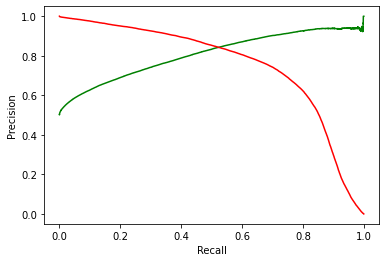

In [258]:
from sklearn.metrics import precision_recall_curve

p, r, thresholds = precision_recall_curve(y_train_pred_final.Actual_Churn, y_train_pred_final.Pred_Curn)

plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.show()

## Model III - XGBoost using PCA

In [259]:
df_train_pca.shape, y_train_sampled.shape

((38384, 40), (38384,))

In [260]:
df_test_pca.shape, y_test_sampled.shape

((9004, 40), (9004,))

In [261]:
df_train_pca.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,X24,X25,X26,X27,X28,X29,X30,X31,X32,X33,X34,X35,X36,X37,X38,X39,X40
0,-0.473718,-4.237067,5.848612,-1.810279,-2.736493,1.654329,0.165962,6.238457,-0.833886,-0.979056,-0.562364,0.552070,-0.726788,-0.192222,-0.362723,-0.166562,1.245507,-0.212306,0.603744,0.811712,0.637319,0.408458,-0.458173,-0.070320,0.262206,0.119890,-0.254701,2.255163,0.964128,0.397323,-0.033726,0.095996,0.625202,-0.265872,0.022050,-0.419629,-0.153045,0.954516,-0.161590,0.820720
1,0.103783,-3.179822,2.802695,-1.169753,-0.964704,0.566457,0.186262,-0.931950,0.301027,2.042309,-0.024083,-0.319537,0.445659,-0.041479,0.276661,-1.009638,3.268034,2.573492,-0.226480,0.105124,-0.274469,0.893816,-0.792589,0.109714,0.083345,-0.490852,-0.426317,0.525129,-0.339171,-0.490231,-0.080285,-0.412252,-0.009511,0.295238,0.163385,0.077529,-0.236323,0.076731,0.003062,0.033271
2,-0.467147,-2.144598,3.439720,-2.525100,3.361493,2.979958,0.387327,-3.353702,0.290654,-1.905888,0.367100,0.626579,-0.759738,-0.266096,-0.664852,0.170912,-0.242652,0.222762,0.196175,0.428455,0.227868,0.372131,0.887137,0.122321,0.620853,0.415982,-0.192411,0.816747,-1.166536,0.669160,0.723263,0.226668,-0.054989,0.244525,-0.017122,0.019567,0.834348,-0.382518,0.194783,-0.183357
3,-0.254765,0.313553,-1.892146,-1.294844,0.292164,-1.073334,-0.035810,-0.067545,-0.798851,-0.460220,0.392581,-0.135921,0.106799,0.166010,-0.815673,-0.152305,0.130915,-0.712099,-0.251500,0.159965,0.299149,-0.170426,-0.779732,0.304417,-1.248034,0.528217,0.309108,0.180171,0.017928,0.093376,0.114347,-0.016844,-0.056187,-0.593846,0.025233,0.101701,0.003345,0.398902,-0.055417,-0.363476
4,2.808465,-1.216913,-3.103688,-1.603490,-1.379082,-1.042454,0.868676,-0.972266,-0.032361,1.794761,0.674104,0.942749,0.490336,1.404556,-0.280022,-0.981677,-0.187093,-0.881302,1.071336,1.220881,1.320476,1.182633,3.790014,1.656163,-1.084367,0.427082,-0.043297,0.559016,0.468404,0.330836,1.056738,-0.688863,-0.206570,-0.250948,0.413333,-0.378084,-1.415894,0.583764,0.561868,-0.269937


In [262]:
df_test_pca.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,X24,X25,X26,X27,X28,X29,X30,X31,X32,X33,X34,X35,X36,X37,X38,X39,X40
0,2.246076,-1.891785,-3.069050,0.196367,-0.695002,-0.267197,0.400621,-0.238909,-0.855572,-0.550157,-0.927074,-0.393744,0.253711,-0.434754,-1.618879,-0.985881,-1.013988,-0.315328,-0.562584,1.161144,0.880131,0.055796,-0.933401,0.448740,-0.586130,1.211392,0.207812,0.414149,-0.153740,0.014558,-0.010530,-0.774600,-0.118161,-0.062527,0.021209,-0.165292,0.153873,-0.238693,0.159133,0.826244
1,-1.002691,0.245002,0.620312,-0.391735,0.208208,0.281933,-0.827722,0.766428,-0.420805,1.206186,-0.342889,-0.315357,0.658079,0.258313,0.237902,-1.058706,0.903910,0.636445,-0.242020,0.190235,-0.556979,0.440521,0.749890,0.094305,-0.300722,0.313827,-0.293161,-0.704885,-0.031194,0.158168,-0.126328,-0.129874,-0.772691,-0.020887,0.104908,0.022820,-0.072987,0.005285,0.105218,-0.266740
2,0.230662,-0.102744,-1.336325,-0.097406,-0.217548,0.192294,-0.796027,-0.646460,-0.441543,1.105609,-0.281089,0.886818,-0.119729,-0.120558,0.467978,0.022078,0.007307,-0.189042,0.564207,0.540390,-0.914113,-0.441447,0.709751,-0.757976,0.097921,-0.047805,-0.108821,-0.058490,-0.051189,0.125062,0.028174,0.815364,0.091320,-0.134632,0.418734,-1.127839,0.105131,-0.480470,-1.082537,0.973641
3,0.296524,-1.635042,0.547127,0.068135,-0.618953,0.758465,1.835416,-1.767806,-0.051515,0.489092,0.152534,-0.184118,-0.277774,-0.178310,-0.250609,0.621237,-0.341452,-0.102258,0.087678,-0.044097,0.084638,0.280020,0.445993,0.177169,-0.457595,-0.447659,-0.067042,-0.014738,-0.275392,-0.520963,0.017406,0.348487,-0.080907,0.206954,-0.586476,0.039116,-0.027424,0.246015,-0.219268,0.765253
4,-1.761007,1.143530,0.148594,-0.389525,-0.010778,0.555688,0.193751,-0.240195,0.074860,-0.555511,0.189107,-0.153152,-0.255153,-0.076306,-0.009748,0.129764,-0.357496,-0.015040,-0.246533,-0.081513,-0.119017,-0.163847,0.370178,-0.330951,-0.046420,0.101274,0.290171,0.082925,0.190207,-0.185871,0.026356,0.157938,-0.167254,0.212670,0.038581,0.073218,0.126485,-0.247216,-0.022980,-0.138356


In [263]:
# hyperparameter tuning with XGBoost

# creating a KFold object 
folds = 3

# specify range of hyperparameters
param_grid = {'learning_rate': [0.2, 0.6], 
             'subsample': [0.3,  0.6, 0.9],
             'max_depth' : [3, 4],
              'n_estimators' : [ 30, 40, 50 ]}          



# specify model
xgb_model = XGBClassifier()

# set up GridSearchCV()
model_cv = GridSearchCV(estimator = xgb_model, 
                        param_grid = param_grid, 
                        scoring= 'recall', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)

In [264]:
%%time
# fit the model
model_cv.fit(df_train_pca, y_train_sampled) 

Fitting 3 folds for each of 36 candidates, totalling 108 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 108 out of 108 | elapsed:  3.8min finished


Wall time: 3min 52s


GridSearchCV(cv=3, estimator=XGBClassifier(),
             param_grid={'learning_rate': [0.2, 0.6], 'max_depth': [3, 4],
                         'n_estimators': [30, 40, 50],
                         'subsample': [0.3, 0.6, 0.9]},
             return_train_score=True, scoring='recall', verbose=1)

In [265]:
model_cv.best_params_

{'learning_rate': 0.6, 'max_depth': 4, 'n_estimators': 50, 'subsample': 0.9}

In [266]:
# cv results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_max_depth,param_n_estimators,param_subsample,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,1.069814,0.070596,0.018946,0.000005,0.2,3,30,0.3,"{'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 30, 'subsample': 0.3}",0.803220,0.834610,0.838518,0.825449,0.015799,34,0.835001,0.832513,0.829543,0.832352,0.002231
1,1.539895,0.132074,0.019933,0.000801,0.2,3,30,0.6,"{'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 30, 'subsample': 0.6}",0.804001,0.833359,0.836798,0.824720,0.014717,35,0.837815,0.828136,0.827667,0.831206,0.004677
2,1.757973,0.102899,0.020610,0.001247,0.2,3,30,0.9,"{'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 30, 'subsample': 0.9}",0.801188,0.832890,0.833828,0.822636,0.015171,36,0.836251,0.830403,0.824150,0.830268,0.004941
3,1.430849,0.085055,0.023613,0.001887,0.2,3,40,0.3,"{'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 40, 'subsample': 0.3}",0.811972,0.843051,0.851180,0.835401,0.016896,31,0.847585,0.843064,0.843220,0.844623,0.002095
4,2.011947,0.125418,0.023924,0.002925,0.2,3,40,0.6,"{'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 40, 'subsample': 0.6}",0.811191,0.841019,0.847116,0.833109,0.015697,33,0.848914,0.841188,0.838609,0.842903,0.004378
5,2.277262,0.241607,0.023924,0.002941,0.2,3,40,0.9,"{'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 40, 'subsample': 0.9}",0.811035,0.843520,0.846334,0.833630,0.016018,32,0.848445,0.844002,0.836968,0.843138,0.004725
6,1.618668,0.066129,0.024934,0.000811,0.2,3,50,0.3,"{'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 50, 'subsample': 0.3}",0.820569,0.852587,0.862279,0.845145,0.017823,25,0.857199,0.852208,0.858617,0.856008,0.002749
7,2.285236,0.055274,0.026583,0.002362,0.2,3,50,0.6,"{'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 50, 'subsample': 0.6}",0.817130,0.847585,0.855714,0.840143,0.016607,29,0.856652,0.847675,0.847362,0.850563,0.004307
8,2.600751,0.102957,0.026249,0.002601,0.2,3,50,0.9,"{'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 50, 'subsample': 0.9}",0.823382,0.852275,0.853681,0.843113,0.013963,26,0.860403,0.854396,0.842282,0.852361,0.007537
9,1.316828,0.044034,0.021942,0.000814,0.2,4,30,0.3,"{'learning_rate': 0.2, 'max_depth': 4, 'n_estimators': 30, 'subsample': 0.3}",0.820100,0.853212,0.853056,0.842123,0.015573,28,0.857199,0.854396,0.851348,0.854314,0.002389


In [267]:
# chosen hyperparameters
# 'objective':'binary:logistic' outputs probability rather than label, which we need for auc
params = {'learning_rate': 0.6,
          'max_depth': 4, 
          'n_estimators':50,
          'subsample':0.9,
         'objective':'binary:logistic'}

# fit model on training data
model_xgb_pca = XGBClassifier(params = params)
model_xgb_pca.fit(df_train_pca, y_train_sampled)

XGBClassifier(params={'learning_rate': 0.6, 'max_depth': 4, 'n_estimators': 50,
                      'objective': 'binary:logistic', 'subsample': 0.9})

In [268]:
# predict
y_train_pred = model_xgb_pca.predict_proba(df_train_pca)[:, 1]
y_train_pred[:10]

array([0.79371905, 0.24013896, 0.65068483, 0.24290709, 0.169722  ,
       0.69622004, 0.20359217, 0.87780255, 0.6064569 , 0.0246849 ],
      dtype=float32)

In [269]:
#Creating a dataframe with the actual Converted and the Predicted Converted probabilities
y_train_pred_final = pd.DataFrame({ 'Actual_Churn': y_train_sampled, 'Pred_Curn':y_train_pred})
y_train_pred_final.head()

,Actual_Churn,Pred_Curn
0,1,0.793719
1,0,0.240139
2,0,0.650685
3,0,0.242907
4,0,0.169722


In [270]:
#Creating new column 'predicted' with 1 if Churn_Prob > 0.5 else 0
y_train_pred_final['predicted'] = y_train_pred_final.Pred_Curn.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Actual_Churn,Pred_Curn,predicted
0,1,0.793719,1
1,0,0.240139,0
2,0,0.650685,1
3,0,0.242907,0
4,0,0.169722,0


### Evaluating Train Data

In [271]:
evaluate_model(y_train_sampled, y_train_pred_final['predicted'])

 Data Evaluation

Confusion Matrix of Data
[[16721  2471]
 [ 2903 16289]]

Classification Report of Data
              precision    recall  f1-score   support

           0       0.85      0.87      0.86     19192
           1       0.87      0.85      0.86     19192

    accuracy                           0.86     38384
   macro avg       0.86      0.86      0.86     38384
weighted avg       0.86      0.86      0.86     38384


Precison 0.87

Recall 0.85

F1_Score : 0.86
**************************************************


### Improving Training Performance

In [272]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Pred_Curn.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Actual_Churn,Pred_Curn,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,1,0.793719,1,1,1,1,1,1,1,1,1,0,0
1,0,0.240139,0,1,1,1,0,0,0,0,0,0,0
2,0,0.650685,1,1,1,1,1,1,1,1,0,0,0
3,0,0.242907,0,1,1,1,0,0,0,0,0,0,0
4,0,0.169722,0,1,1,0,0,0,0,0,0,0,0


In [273]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix


num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Actual_Churn, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.500000  1.000000  0.000000
0.1   0.1  0.680596  0.992028  0.369164
0.2   0.2  0.791007  0.967539  0.614475
0.3   0.3  0.838162  0.934817  0.741507
0.4   0.4  0.858092  0.896103  0.820081
0.5   0.5  0.859994  0.848739  0.871248
0.6   0.6  0.853976  0.802470  0.905481
0.7   0.7  0.838110  0.743904  0.932316
0.8   0.8  0.806404  0.653606  0.959202
0.9   0.9  0.690861  0.396624  0.985098


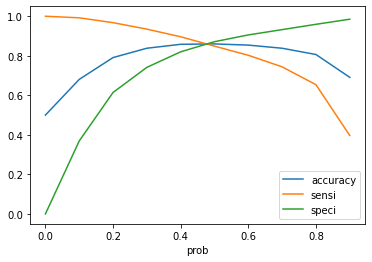

In [274]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

In [275]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Pred_Curn.map( lambda x: 1 if x > 0.40 else 0)

y_train_pred_final.head()

,Actual_Churn,Pred_Curn,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,1,0.793719,1,1,1,1,1,1,1,1,1,0,0,1
1,0,0.240139,0,1,1,1,0,0,0,0,0,0,0,0
2,0,0.650685,1,1,1,1,1,1,1,1,0,0,0,1
3,0,0.242907,0,1,1,1,0,0,0,0,0,0,0,0
4,0,0.169722,0,1,1,0,0,0,0,0,0,0,0,0


In [276]:
evaluate_model(y_train_sampled, y_train_pred_final['final_predicted'])

 Data Evaluation

Confusion Matrix of Data
[[15739  3453]
 [ 1994 17198]]

Classification Report of Data
              precision    recall  f1-score   support

           0       0.89      0.82      0.85     19192
           1       0.83      0.90      0.86     19192

    accuracy                           0.86     38384
   macro avg       0.86      0.86      0.86     38384
weighted avg       0.86      0.86      0.86     38384


Precison 0.83

Recall 0.9

F1_Score : 0.86
**************************************************


### Evaluating Test Data

In [277]:
y_test_pred = model_xgb_pca.predict_proba(df_test_pca)[:, 1]
y_test_pred[:10]

array([0.03812715, 0.45569843, 0.02505391, 0.2037617 , 0.93295985,
       0.26232556, 0.18947035, 0.03614265, 0.02413201, 0.04500608],
      dtype=float32)

In [278]:
#Creating a dataframe with the actual Converted and the Predicted Converted probabilities
y_test_pred_final = pd.DataFrame({ 'Actual_Churn': y_test_sampled, 'Pred_Curn':y_test_pred})
y_test_pred_final.head()

,Actual_Churn,Pred_Curn
52088,0,0.038127
59498,0,0.455698
20003,0,0.025054
74741,0,0.203762
55694,0,0.932960


In [279]:
#Creating new column 'predicted' with 1 if Churn_Prob > 0.5 else 0
y_test_pred_final['predicted'] = y_test_pred_final.Pred_Curn.map(lambda x: 1 if x > 0.37 else 0)

# Let's see the head
y_test_pred_final.head()

,Actual_Churn,Pred_Curn,predicted
52088,0,0.038127,0
59498,0,0.455698,1
20003,0,0.025054,0
74741,0,0.203762,0
55694,0,0.932960,1


In [280]:
evaluate_model(y_test_sampled, y_test_pred_final['predicted'])

 Data Evaluation

Confusion Matrix of Data
[[6479 1747]
 [ 148  630]]

Classification Report of Data
              precision    recall  f1-score   support

           0       0.98      0.79      0.87      8226
           1       0.27      0.81      0.40       778

    accuracy                           0.79      9004
   macro avg       0.62      0.80      0.64      9004
weighted avg       0.92      0.79      0.83      9004


Precison 0.27

Recall 0.81

F1_Score : 0.4
**************************************************


### Plotting ROC

In [281]:
fpr, tpr, thresholds = metrics.roc_curve( y_test_pred_final.Actual_Churn, y_test_pred_final.Pred_Curn, drop_intermediate = False )

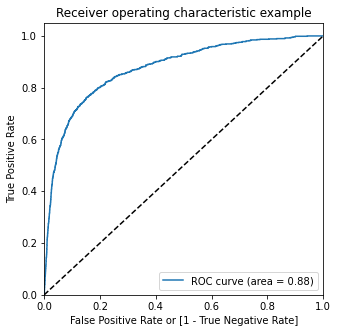

In [282]:
draw_roc(y_test_sampled, y_test_pred_final['Pred_Curn'])

In [283]:
# Evaluating Precision and Recall
precision = precision_score(y_test_sampled, y_test_pred_final['predicted'])
print("Precison", precision.round(4)*100)
print()
recall = recall_score(y_test_sampled, y_test_pred_final['predicted'])
print("Recall", recall.round(4)*100)  
print()
F1_score = (2 * ((precision * recall) / (precision + recall)))
print("F1_Score :" , F1_score.round(2))
print()
AUC = round(metrics.roc_auc_score(y_test_sampled, y_test_pred_final['Pred_Curn']),2)
print("AUC :", AUC)

Precison 26.5

Recall 80.97999999999999

F1_Score : 0.4

AUC : 0.88


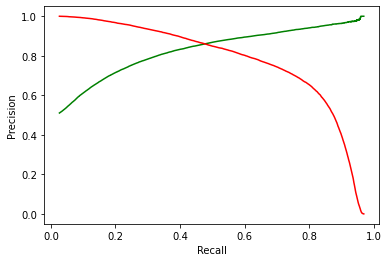

In [284]:
from sklearn.metrics import precision_recall_curve

p, r, thresholds = precision_recall_curve(y_train_pred_final.Actual_Churn, y_train_pred_final.Pred_Curn)

plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.show()

In [285]:
pca_xgb_df = pd.DataFrame(data = { 'Model Name' : 'PCA XGBoost Model', 
                                   'Test Recall' : [recall.round(4)], 
                                   'Test Precision' : [precision.round(4)],
                                   'Test F1 Score' : [F1_score.round(4)],
                                   'AUC' : AUC, 
                                   'Cut off Prob' : [0.37]}, 
                                   index = ['Model III'],
                                    )
pca_xgb_df

,Model Name,Test Recall,Test Precision,Test F1 Score,AUC,Cut off Prob
Model III,PCA XGBoost Model,0.8098,0.265,0.3994,0.88,0.37


In [286]:
final_result = pd.concat([final_result, pca_xgb_df], axis = 0)
final_result

,Model Name,Test Recall,Test Precision,Test F1 Score,AUC,Cut off Prob
Model I,Interpretable Random Forest,0.8702,0.3238,0.4719,0.91,0.20
Model II,PCA LogReg Model,0.8085,0.2833,0.4196,0.87,0.47
Model III,PCA XGBoost Model,0.8098,0.2650,0.3994,0.88,0.37


## Model IV - Random Forest using PCA

In [287]:
df_train_pca.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,X24,X25,X26,X27,X28,X29,X30,X31,X32,X33,X34,X35,X36,X37,X38,X39,X40
0,-0.473718,-4.237067,5.848612,-1.810279,-2.736493,1.654329,0.165962,6.238457,-0.833886,-0.979056,-0.562364,0.552070,-0.726788,-0.192222,-0.362723,-0.166562,1.245507,-0.212306,0.603744,0.811712,0.637319,0.408458,-0.458173,-0.070320,0.262206,0.119890,-0.254701,2.255163,0.964128,0.397323,-0.033726,0.095996,0.625202,-0.265872,0.022050,-0.419629,-0.153045,0.954516,-0.161590,0.820720
1,0.103783,-3.179822,2.802695,-1.169753,-0.964704,0.566457,0.186262,-0.931950,0.301027,2.042309,-0.024083,-0.319537,0.445659,-0.041479,0.276661,-1.009638,3.268034,2.573492,-0.226480,0.105124,-0.274469,0.893816,-0.792589,0.109714,0.083345,-0.490852,-0.426317,0.525129,-0.339171,-0.490231,-0.080285,-0.412252,-0.009511,0.295238,0.163385,0.077529,-0.236323,0.076731,0.003062,0.033271
2,-0.467147,-2.144598,3.439720,-2.525100,3.361493,2.979958,0.387327,-3.353702,0.290654,-1.905888,0.367100,0.626579,-0.759738,-0.266096,-0.664852,0.170912,-0.242652,0.222762,0.196175,0.428455,0.227868,0.372131,0.887137,0.122321,0.620853,0.415982,-0.192411,0.816747,-1.166536,0.669160,0.723263,0.226668,-0.054989,0.244525,-0.017122,0.019567,0.834348,-0.382518,0.194783,-0.183357
3,-0.254765,0.313553,-1.892146,-1.294844,0.292164,-1.073334,-0.035810,-0.067545,-0.798851,-0.460220,0.392581,-0.135921,0.106799,0.166010,-0.815673,-0.152305,0.130915,-0.712099,-0.251500,0.159965,0.299149,-0.170426,-0.779732,0.304417,-1.248034,0.528217,0.309108,0.180171,0.017928,0.093376,0.114347,-0.016844,-0.056187,-0.593846,0.025233,0.101701,0.003345,0.398902,-0.055417,-0.363476
4,2.808465,-1.216913,-3.103688,-1.603490,-1.379082,-1.042454,0.868676,-0.972266,-0.032361,1.794761,0.674104,0.942749,0.490336,1.404556,-0.280022,-0.981677,-0.187093,-0.881302,1.071336,1.220881,1.320476,1.182633,3.790014,1.656163,-1.084367,0.427082,-0.043297,0.559016,0.468404,0.330836,1.056738,-0.688863,-0.206570,-0.250948,0.413333,-0.378084,-1.415894,0.583764,0.561868,-0.269937


In [288]:
df_test_pca.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,X24,X25,X26,X27,X28,X29,X30,X31,X32,X33,X34,X35,X36,X37,X38,X39,X40
0,2.246076,-1.891785,-3.069050,0.196367,-0.695002,-0.267197,0.400621,-0.238909,-0.855572,-0.550157,-0.927074,-0.393744,0.253711,-0.434754,-1.618879,-0.985881,-1.013988,-0.315328,-0.562584,1.161144,0.880131,0.055796,-0.933401,0.448740,-0.586130,1.211392,0.207812,0.414149,-0.153740,0.014558,-0.010530,-0.774600,-0.118161,-0.062527,0.021209,-0.165292,0.153873,-0.238693,0.159133,0.826244
1,-1.002691,0.245002,0.620312,-0.391735,0.208208,0.281933,-0.827722,0.766428,-0.420805,1.206186,-0.342889,-0.315357,0.658079,0.258313,0.237902,-1.058706,0.903910,0.636445,-0.242020,0.190235,-0.556979,0.440521,0.749890,0.094305,-0.300722,0.313827,-0.293161,-0.704885,-0.031194,0.158168,-0.126328,-0.129874,-0.772691,-0.020887,0.104908,0.022820,-0.072987,0.005285,0.105218,-0.266740
2,0.230662,-0.102744,-1.336325,-0.097406,-0.217548,0.192294,-0.796027,-0.646460,-0.441543,1.105609,-0.281089,0.886818,-0.119729,-0.120558,0.467978,0.022078,0.007307,-0.189042,0.564207,0.540390,-0.914113,-0.441447,0.709751,-0.757976,0.097921,-0.047805,-0.108821,-0.058490,-0.051189,0.125062,0.028174,0.815364,0.091320,-0.134632,0.418734,-1.127839,0.105131,-0.480470,-1.082537,0.973641
3,0.296524,-1.635042,0.547127,0.068135,-0.618953,0.758465,1.835416,-1.767806,-0.051515,0.489092,0.152534,-0.184118,-0.277774,-0.178310,-0.250609,0.621237,-0.341452,-0.102258,0.087678,-0.044097,0.084638,0.280020,0.445993,0.177169,-0.457595,-0.447659,-0.067042,-0.014738,-0.275392,-0.520963,0.017406,0.348487,-0.080907,0.206954,-0.586476,0.039116,-0.027424,0.246015,-0.219268,0.765253
4,-1.761007,1.143530,0.148594,-0.389525,-0.010778,0.555688,0.193751,-0.240195,0.074860,-0.555511,0.189107,-0.153152,-0.255153,-0.076306,-0.009748,0.129764,-0.357496,-0.015040,-0.246533,-0.081513,-0.119017,-0.163847,0.370178,-0.330951,-0.046420,0.101274,0.290171,0.082925,0.190207,-0.185871,0.026356,0.157938,-0.167254,0.212670,0.038581,0.073218,0.126485,-0.247216,-0.022980,-0.138356


In [289]:
df_train_pca.shape, y_train_sampled.shape

((38384, 40), (38384,))

In [290]:
df_test_pca.shape, y_test_sampled.shape

((9004, 40), (9004,))

In [291]:
pca_rf = RandomForestClassifier(random_state = 42, n_jobs = -1)

In [292]:
# Reduced tuning parameters to save running time
params = {'n_estimators' : [ 15, 100],
    'max_depth': [ 25],
    'min_samples_split' : [5 ],
    'min_samples_leaf': [2, 3,],
          'max_features' : ["sqrt",],
          'criterion': [ 'entropy']
    
}

### results obtained by tuning 

- params = {'n_estimators' : [5, 8, 12, 15, 100],
    'max_depth': [ 20, 25],
    'min_samples_split' : [5, 10   ],
    'min_samples_leaf': [2, 3,],
          'max_features' : ["sqrt", "log2"],
          'criterion': ['gini', 'entropy']
    
}

- Fitting 4 folds for each of 160 candidates, totalling 640 fits
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   53.8s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  5.0min
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed: 13.3min
[Parallel(n_jobs=-1)]: Done 640 out of 640 | elapsed: 21.9min finished
Wall time: 22min 9s
GridSearchCV(cv=4, estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [20, 25],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_leaf': [2, 3],
                         'min_samples_split': [5, 10],
                         'n_estimators': [5, 8, 12, 15, 100]},
             scoring='recall', verbose=1)

- RandomForestClassifier(criterion='entropy', max_depth=25, max_features='sqrt',
                       min_samples_leaf=2, min_samples_split=5, n_jobs=-1,
                       random_state=42)

In [293]:
grid_search_pca = GridSearchCV(estimator = pca_rf,
                           param_grid = params,
                           cv = 4,
                           n_jobs = -1, 
                           verbose = 1, 
                           scoring = "recall")

In [294]:
%%time
grid_search_pca.fit(df_train_pca, y_train_sampled)

Fitting 4 folds for each of 4 candidates, totalling 16 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 out of  16 | elapsed:  1.1min finished


Wall time: 1min 13s


GridSearchCV(cv=4, estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid={'criterion': ['entropy'], 'max_depth': [25],
                         'max_features': ['sqrt'], 'min_samples_leaf': [2, 3],
                         'min_samples_split': [5], 'n_estimators': [15, 100]},
             scoring='recall', verbose=1)

In [295]:
grid_search_pca.best_score_

0.95862859524802

### Building model on best parameters

In [296]:
rf_best = grid_search_pca.best_estimator_
rf_best

RandomForestClassifier(criterion='entropy', max_depth=25, max_features='sqrt',
                       min_samples_leaf=2, min_samples_split=5, n_jobs=-1,
                       random_state=42)

In [297]:
rf_model_pca = RandomForestClassifier(n_estimators = 100,
                                  criterion='entropy', 
                                  max_depth=25, 
                                  max_features='sqrt',
                                  min_samples_leaf=5, 
                                  min_samples_split=2,
                                  n_jobs=-1,
                                  random_state=42)



In [298]:
%%time
rf_model_pca.fit(df_train_pca, y_train_sampled)

Wall time: 9.68 s


RandomForestClassifier(criterion='entropy', max_depth=25, max_features='sqrt',
                       min_samples_leaf=5, n_jobs=-1, random_state=42)

### Train Data Evaluation

In [299]:
y_train_pred = rf_model_pca.predict_proba(df_train_pca)[:, 1]
y_train_pred[:10]

array([0.93491306, 0.13631413, 0.35029505, 0.07764006, 0.13267172,
       0.40796365, 0.16980406, 0.98075025, 0.21472086, 0.01890005])

In [300]:
#Creating a dataframe with the actual Converted and the Predicted Converted probabilities
y_train_pred_final = pd.DataFrame({ 'Actual_Churn': y_train_sampled, 'Pred_Curn':y_train_pred})
y_train_pred_final.head()

,Actual_Churn,Pred_Curn
0,1,0.934913
1,0,0.136314
2,0,0.350295
3,0,0.077640
4,0,0.132672


In [301]:
#Creating new column 'predicted' with 1 if Churn_Prob > 0.5 else 0
y_train_pred_final['predicted'] = y_train_pred_final.Pred_Curn.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Actual_Churn,Pred_Curn,predicted
0,1,0.934913,1
1,0,0.136314,0
2,0,0.350295,0
3,0,0.077640,0
4,0,0.132672,0


In [302]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Pred_Curn.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Actual_Churn,Pred_Curn,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,1,0.934913,1,1,1,1,1,1,1,1,1,1,1
1,0,0.136314,0,1,1,0,0,0,0,0,0,0,0
2,0,0.350295,0,1,1,1,1,0,0,0,0,0,0
3,0,0.077640,0,1,0,0,0,0,0,0,0,0,0
4,0,0.132672,0,1,1,0,0,0,0,0,0,0,0


In [303]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

In [304]:
num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Actual_Churn, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.503126  1.000000  0.006253
0.1   0.1  0.824250  1.000000  0.648499
0.2   0.2  0.928382  1.000000  0.856763
0.3   0.3  0.963657  1.000000  0.927313
0.4   0.4  0.979679  0.999687  0.959671
0.5   0.5  0.988641  0.996301  0.980982
0.6   0.6  0.988823  0.982388  0.995258
0.7   0.7  0.970873  0.942163  0.999583
0.8   0.8  0.927652  0.855304  1.000000
0.9   0.9  0.821749  0.643497  1.000000


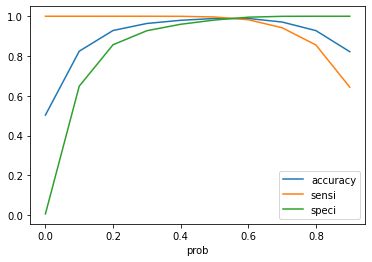

In [305]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

In [306]:
# Creating new column 'predicted' with 1 if Churn_Prob > 0.5 else 0
y_train_pred_final['final_predicted'] = y_train_pred_final.Pred_Curn.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Actual_Churn,Pred_Curn,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,1,0.934913,1,1,1,1,1,1,1,1,1,1,1,1
1,0,0.136314,0,1,1,0,0,0,0,0,0,0,0,0
2,0,0.350295,0,1,1,1,1,0,0,0,0,0,0,0
3,0,0.077640,0,1,0,0,0,0,0,0,0,0,0,0
4,0,0.132672,0,1,1,0,0,0,0,0,0,0,0,0


In [307]:
evaluate_model(y_train_sampled, y_train_pred_final['final_predicted'])

 Data Evaluation

Confusion Matrix of Data
[[18827   365]
 [   71 19121]]

Classification Report of Data
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     19192
           1       0.98      1.00      0.99     19192

    accuracy                           0.99     38384
   macro avg       0.99      0.99      0.99     38384
weighted avg       0.99      0.99      0.99     38384


Precison 0.98

Recall 1.0

F1_Score : 0.99
**************************************************


### Building and Evaluating Test Data

In [308]:
y_test_pred = rf_model_pca.predict_proba(df_test_pca)[:, 1]
y_test_pred[:10]

array([0.03390043, 0.21712229, 0.02577381, 0.11270942, 0.95057649,
       0.14867063, 0.15788401, 0.03373016, 0.02073094, 0.06416658])

In [309]:
#Creating a dataframe with the actual Converted and the Predicted Converted probabilities
y_test_pred_final = pd.DataFrame({ 'Actual_Churn': y_test_sampled, 'Pred_Curn':y_test_pred})
y_test_pred_final.head()

,Actual_Churn,Pred_Curn
52088,0,0.033900
59498,0,0.217122
20003,0,0.025774
74741,0,0.112709
55694,0,0.950576


In [310]:
#Creating new column 'predicted' with 1 if Churn_Prob > 0.5 else 0
y_test_pred_final['predicted'] = y_test_pred_final.Pred_Curn.map(lambda x: 1 if x > 0.26 else 0)

# Let's see the head
y_test_pred_final.head()

,Actual_Churn,Pred_Curn,predicted
52088,0,0.033900,0
59498,0,0.217122,0
20003,0,0.025774,0
74741,0,0.112709,0
55694,0,0.950576,1


In [311]:
evaluate_model(y_test_sampled, y_test_pred_final['predicted'])

 Data Evaluation

Confusion Matrix of Data
[[6578 1648]
 [ 135  643]]

Classification Report of Data
              precision    recall  f1-score   support

           0       0.98      0.80      0.88      8226
           1       0.28      0.83      0.42       778

    accuracy                           0.80      9004
   macro avg       0.63      0.81      0.65      9004
weighted avg       0.92      0.80      0.84      9004


Precison 0.28

Recall 0.83

F1_Score : 0.42
**************************************************


### ROC Curve

In [312]:
fpr, tpr, thresholds = metrics.roc_curve( y_test_sampled, y_test_pred, drop_intermediate = False )

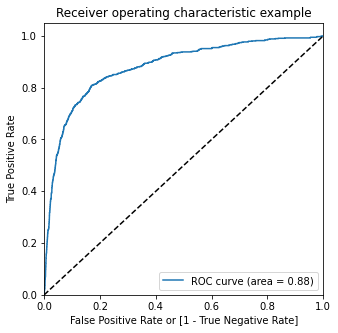

In [313]:
draw_roc(y_test_sampled, y_test_pred_final['Pred_Curn'])

In [314]:
# Evaluating Precision and Recall
precision = precision_score(y_test_sampled, y_test_pred_final['predicted'])
print("Precison", precision.round(4)*100)
print()
recall = recall_score(y_test_sampled, y_test_pred_final['predicted'])
print("Recall", recall.round(4)*100)  
print()
F1_score = (2 * ((precision * recall) / (precision + recall)))
print("F1_Score :" , F1_score.round(2)) 
print()
AUC = round(metrics.roc_auc_score(y_test_sampled, y_test_pred_final['Pred_Curn']),2)
print("AUC :", AUC)

Precison 28.07

Recall 82.65

F1_Score : 0.42

AUC : 0.88


In [315]:
pca_rf_df = pd.DataFrame(data = { 'Model Name' : 'PCA Random Forest Model', 
                                   'Test Recall' : [recall.round(4)], 
                                   'Test Precision' : [precision.round(4)],
                                   'Test F1 Score' : [F1_score.round(4)],
                                   'AUC' : AUC, 
                                   'Cut off Prob' : [0.30]}, 
                                   index = ['Model IV'],
                                    )
pca_rf_df

,Model Name,Test Recall,Test Precision,Test F1 Score,AUC,Cut off Prob
Model IV,PCA Random Forest Model,0.8265,0.2807,0.419,0.88,0.3


In [316]:
final_result = pd.concat([final_result, pca_rf_df], axis = 0)
final_result

,Model Name,Test Recall,Test Precision,Test F1 Score,AUC,Cut off Prob
Model I,Interpretable Random Forest,0.8702,0.3238,0.4719,0.91,0.20
Model II,PCA LogReg Model,0.8085,0.2833,0.4196,0.87,0.47
Model III,PCA XGBoost Model,0.8098,0.2650,0.3994,0.88,0.37
Model IV,PCA Random Forest Model,0.8265,0.2807,0.4190,0.88,0.30


## Business Insights and Recommendations

In [ ]:
dummies

### Model Interpretation and Recommendations

- Interpretable Random forest performs much better than all other models, cut off probability is 0.20 , has 86.89% Recall. But recall comes at the cost of Precision, F1 score is also less, more data is required for better training.
- PCA model have almost similar performance here Random Forest has higher Test and Train difference, Logistic Regression has good results when compared to XGBoost, with higher training XGB may perform better than Logistic regression model. 

# Inferences and Recommendations

- roam_in, and roam_og more churn is seen in years 8, 9 & 10 year customers, better roaming rates should be provided.
- avg_loc_og_t2c customers of 3rd and 6th year are churning more
- avg_loc_og_t2t and avg_loc_og_t2m - higher churn is seen in initial year customers
- special_og offers are good they have considerably reduced churn and must continue
- std and isd rates should be focused, better rates will attract more customers.
- High Churn rate is observed in initial year customers, they must be given good offers to prevent from churning.
- In the initial 3 years churn is high, low churn is seen from 8-11 th years
- People in the initial few years are reluctant to buy higher recharges, these customers should be given better offers to purchase good plans and increase company revenue.
- Older network users are doing higher recharges, they can be lured by better recharge plans.
- 10th year users are using very less data, they should be given better plans to used data.
- People are more interested in 3G usage, better plans will attract more customers.
- When customers reduce data usage it is a symptom of churn those customers should be targeted by better offers to prevent churn.
- When customer reduces calling ie when is minutes of usage decreases it is a symptom of churn, they should be given better plans to prevent churn.
- Other modes  of data collection like chatbot should be utilized for faster query resolution and complaint handling.

In [317]:
now = time.time()
print(now - then)

1424.96435713768


In [318]:
#Thank you :-)